In [88]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm.notebook import tqdm

In [89]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = './yolov5/runs/train/exp/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\DELL/.cache\torch\hub\master.zip
YOLOv5  2022-11-15 Python-3.10.6 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [90]:
import os
image_path = os.path.join('.\data\HardHat_Test_Images\Images', 'hard_hat_workers34.png')

image 1/1: 415x416 8 helmets
Speed: 10.0ms pre-process, 160.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


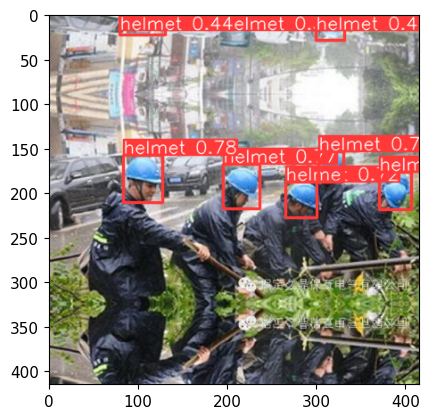

In [91]:
%matplotlib inline

results = model(image_path)
results.print()

img = np.squeeze(results.render())
plt.imshow(img)

In [92]:
bbox_coordinates = results.pred[0]

In [93]:
def get_color_dictionay(bbox_coordinates):

    list_of_confidence_score = []

    for coordinate in bbox_coordinates:

        a = round(float(coordinate[4]),2)
        list_of_confidence_score.append(a)
#         print(round(float(coordinate[4]),2))

    set_of_confidence_score = set(list_of_confidence_score)
#     print(set_of_confidence_score)

    dict_of_confidence_and_color_array = dict.fromkeys(set_of_confidence_score, list(np.random.random(size=3) * 256))
    for i in set_of_confidence_score:
        dict_of_confidence_and_color_array[i] = list(np.random.random(size=3) * 256)
        
    return dict_of_confidence_and_color_array
    

In [94]:
dictttt = get_color_dictionay(bbox_coordinates)
dictttt

{0.78: [241.41102997639922, 240.17170657369658, 165.18063694003658],
 0.77: [158.9413237764106, 64.40484333952259, 167.3535906084119],
 0.46: [148.4059294453446, 174.3228089452358, 235.33063514649888],
 0.75: [23.50075346907596, 31.836266229143973, 36.30972076307947],
 0.72: [168.67610551640888, 187.25823213916325, 53.42117466256653],
 0.44: [40.381847318021386, 46.875820812683855, 205.1965696072607],
 0.39: [126.30291570903529, 215.53774230377755, 17.912100972379363]}

In [95]:
output_dict = {
    '0' : 'helmet',
    '1' : 'head',
    '2' : 'person'
}

In [96]:
def bounding_box_img(img,bbox):
    x_min, y_min, x_max, y_max = bbox 
    
    y_max = y_max - (y_max - y_min) // 2
    bbox_obj = img[y_min:y_max, x_min:x_max]
    return bbox_obj

In [97]:
"""
    Predictions are stored in a list
"""
img_rect_drawn = cv2.imread(image_path)
bounding_box_result = results.pred[0]
print("--------------")
# print(bounding_box_img)

"""
    Looping through the list in order to
    parse through every detection made by 
    the model and draw rectagle accordingly
"""

# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
  
# fontScale
fontScale = 0.5
  
# Line thickness of 2 px
thickness = 2

for coordinates in bounding_box_result:
    print(coordinates[:4])
    x_min, y_min, x_max, y_max = coordinates[:4]
    color = dictttt[round(float(coordinates[4]),2)]
    text_color = [255, 0, 0]
    """
        for confidence score
    """
    text = str(round(float(coordinates[4]),2)) + output_dict[str(int(coordinates[-1]))]
    org = (int(x_min), int(y_min))

    cv2.rectangle(img_rect_drawn, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, 2)
    cv2.putText(img_rect_drawn, text, org, font, fontScale, color, thickness, cv2.LINE_AA)

cv2.imshow("im", img_rect_drawn)
cv2.waitKey()
cv2.destroyAllWindows()

--------------
tensor([302.03003, 154.56958, 330.71201, 188.81964])
tensor([ 83.48692, 158.08374, 127.84201, 211.65474])
tensor([195.28665, 168.49936, 236.41823, 218.31561])
tensor([370.43814, 177.95517, 406.01770, 219.75583])
tensor([265.14813, 188.60893, 300.88483, 228.20062])
tensor([299.31128,   0.00000, 331.33560,  29.34810])
tensor([7.97248e+01, 4.46004e-02, 1.30114e+02, 2.32240e+01])
tensor([194.27631,   0.46912, 237.92381,   9.90539])


In [107]:
# get the input 
cap = cv2.VideoCapture('sample.mp4')

# get the properties
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = cap.get(cv2.CAP_PROP_FPS)

# font
font = cv2.FONT_HERSHEY_SIMPLEX
# org
# fontScale
fontScale = 1
# Line thickness of 2 px
thickness = 2
fourcc = cv2.VideoWriter_fourcc(*"vp80")
# using the videWriter class of openCV

video_writer = cv2.VideoWriter("video_with_different_bbox_colour_acc_confidence_score.webm", fourcc, fps, (width, height))

In [108]:
for frame_index in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    # read the frame
    
    ret, frame = cap.read()
    frame_copy = frame.copy()
    """
        passing the current frame to trained model and squeezing the results into 3-D for RGB
    """
    results = model(frame)
    frame = np.squeeze(results.render())
    
    """
    Predictions are stored in a list
    """
    bounding_box_result = results.pred[0]
#     print(bounding_box_result)
    dictttt = get_color_dictionay(bounding_box_result)
    for coordinates in bounding_box_result:
        print(coordinates)
        x_min, y_min, x_max, y_max = coordinates[:4]
        color = dictttt[round(float(coordinates[4]),2)]
        text_color = [255, 0, 0]
        """
            for confidence score
        """
        text = str(round(float(coordinates[4]),2)) + output_dict[str(int(coordinates[-1]))]
        org = (int(x_min), int(y_min))

        cv2.rectangle(frame_copy, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, 4)
        cv2.putText(frame_copy, text, org, font, fontScale, color, thickness, cv2.LINE_AA)

    dictttt.clear()
#     print(dictttt)
    cv2.imshow("VIDEO PLAYER", frame_copy)
    
    video_writer.write(frame_copy)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

# release video write
video_writer.release()

tensor([9.10956e+02, 9.96130e+01, 1.10653e+03, 2.93042e+02, 6.03408e-01, 0.00000e+00])
tensor([1.01837e+03, 2.06357e+02, 1.28000e+03, 4.58860e+02, 5.88110e-01, 0.00000e+00])
tensor([7.40337e+02, 3.34642e+01, 9.03432e+02, 2.02085e+02, 3.20328e-01, 0.00000e+00])
tensor([7.38512e+02, 2.60932e+01, 9.04770e+02, 2.21541e+02, 8.12889e-01, 0.00000e+00])
tensor([136.40955,  94.28255, 358.46228, 298.60004,   0.74977,   0.00000])
tensor([ 25.17073, 253.85638, 281.57916, 550.58276,   0.72749,   0.00000])
tensor([1.03686e+03, 2.06850e+02, 1.27706e+03, 4.80250e+02, 7.04407e-01, 0.00000e+00])
tensor([407.31555,   0.00000, 589.83948, 228.60153,   0.68475,   0.00000])
tensor([9.04141e+02, 9.48576e+01, 1.12102e+03, 3.14073e+02, 6.82784e-01, 0.00000e+00])
tensor([7.42687e+02, 1.77622e+01, 9.06487e+02, 2.24308e+02, 8.25080e-01, 0.00000e+00])
tensor([134.24243,  83.74107, 351.73129, 307.09177,   0.80780,   0.00000])
tensor([402.97888,   0.00000, 591.96997, 212.93097,   0.79228,   0.00000])
tensor([ 12.7516

tensor([730.59509, 343.06342, 785.12805, 407.33289,   0.87172,   0.00000])
tensor([1.37321e+02, 2.89613e+02, 1.80742e+02, 3.34617e+02, 3.29287e-01, 0.00000e+00])
tensor([732.50970, 345.32965, 785.60419, 406.51312,   0.87839,   0.00000])
tensor([147.63890, 286.41351, 186.24559, 335.67328,   0.44966,   0.00000])
tensor([733.49091, 345.56506, 787.13263, 405.84265,   0.86419,   0.00000])
tensor([148.46674, 290.13089, 190.42459, 337.11160,   0.44176,   0.00000])
tensor([734.04169, 345.15533, 787.71918, 404.36340,   0.85994,   0.00000])
tensor([154.37860, 295.46777, 190.65988, 333.86169,   0.37649,   0.00000])
tensor([735.52234, 345.00604, 788.05579, 402.77490,   0.85416,   0.00000])
tensor([156.34120, 294.46777, 192.63734, 342.86102,   0.48356,   0.00000])
tensor([735.59479, 348.40479, 790.05853, 403.12091,   0.81886,   0.00000])
tensor([1.59548e+02, 2.94722e+02, 1.97497e+02, 3.41523e+02, 3.05397e-01, 0.00000e+00])
tensor([735.24561, 347.10840, 789.45227, 403.29004,   0.85658,   0.00000])
t

tensor([7.89862e+02, 3.60090e+02, 8.31395e+02, 4.13925e+02, 7.90280e-01, 0.00000e+00])
tensor([241.73091, 291.23248, 277.69766, 343.71893,   0.35790,   0.00000])
tensor([7.95094e+02, 3.63381e+02, 8.33720e+02, 4.07372e+02, 7.66629e-01, 0.00000e+00])
tensor([241.39653, 292.04868, 277.77203, 345.21823,   0.39198,   0.00000])
tensor([7.98564e+02, 3.64553e+02, 8.38615e+02, 4.06895e+02, 7.96456e-01, 0.00000e+00])
tensor([241.20027, 292.00653, 277.77808, 345.89301,   0.42244,   0.00000])
tensor([7.19714e+01, 3.29481e+02, 9.37348e+01, 3.68349e+02, 2.54400e-01, 0.00000e+00])
tensor([7.98923e+02, 3.59712e+02, 8.40517e+02, 4.02656e+02, 8.19564e-01, 0.00000e+00])
tensor([ 70.95271, 334.65231,  90.12152, 357.91940,   0.40461,   0.00000])
tensor([240.64226, 292.18582, 277.82465, 345.51425,   0.39600,   0.00000])
tensor([8.01097e+02, 3.57768e+02, 8.42415e+02, 3.97438e+02, 8.05181e-01, 0.00000e+00])
tensor([2.40692e+02, 2.92320e+02, 2.77533e+02, 3.45466e+02, 3.39818e-01, 0.00000e+00])
tensor([6.82324e

tensor([8.17026e+02, 3.48077e+02, 8.55395e+02, 3.91276e+02, 6.98931e-01, 0.00000e+00])
tensor([258.87076, 286.21933, 296.16269, 339.29904,   0.45354,   0.00000])
tensor([8.13842e+02, 3.48408e+02, 8.50198e+02, 3.90183e+02, 7.21303e-01, 0.00000e+00])
tensor([258.60989, 285.27103, 296.83878, 339.10556,   0.51979,   0.00000])
tensor([8.10477e+02, 3.48354e+02, 8.47364e+02, 3.90715e+02, 7.13758e-01, 0.00000e+00])
tensor([259.18475, 286.59998, 297.18652, 339.89648,   0.49691,   0.00000])
tensor([5.72884e+01, 3.19109e+02, 8.29004e+01, 3.58345e+02, 3.56635e-01, 0.00000e+00])
tensor([8.13598e+02, 3.48192e+02, 8.40720e+02, 3.89189e+02, 7.14521e-01, 0.00000e+00])
tensor([261.37155, 296.80188, 296.54373, 334.35791,   0.51348,   0.00000])
tensor([6.06084e+01, 3.19733e+02, 8.10804e+01, 3.51345e+02, 2.79952e-01, 0.00000e+00])
tensor([8.07957e+02, 3.47373e+02, 8.42239e+02, 3.91602e+02, 7.09768e-01, 0.00000e+00])
tensor([259.25891, 293.08801, 301.15192, 340.97754,   0.52455,   0.00000])
tensor([5.61871e

tensor([6.95343e+02, 2.85583e+02, 7.39348e+02, 3.32529e+02, 5.68082e-01, 0.00000e+00])
tensor([2.14266e+02, 3.36691e+02, 2.36301e+02, 3.56484e+02, 3.26587e-01, 0.00000e+00])
tensor([ 9.48660, 12.38197, 54.62176, 52.96122,  0.25575,  0.00000])
tensor([6.95770e+02, 2.85367e+02, 7.39149e+02, 3.31246e+02, 5.75007e-01, 0.00000e+00])
tensor([2.14118e+02, 3.36596e+02, 2.36254e+02, 3.56531e+02, 2.86449e-01, 0.00000e+00])
tensor([ 9.43731, 12.31374, 54.84393, 53.09795,  0.25425,  0.00000])
tensor([6.95908e+02, 2.85496e+02, 7.39680e+02, 3.31123e+02, 5.72433e-01, 0.00000e+00])
tensor([2.14362e+02, 3.37082e+02, 2.36249e+02, 3.56946e+02, 3.02029e-01, 0.00000e+00])
tensor([ 9.53104, 12.12164, 54.77206, 52.67989,  0.25567,  0.00000])
tensor([6.94345e+02, 2.87086e+02, 7.40524e+02, 3.35682e+02, 6.04557e-01, 0.00000e+00])
tensor([2.13897e+02, 3.38472e+02, 2.37635e+02, 3.59384e+02, 3.42377e-01, 0.00000e+00])
tensor([6.93091e+02, 2.87341e+02, 7.39135e+02, 3.36125e+02, 6.49028e-01, 0.00000e+00])
tensor([2.

tensor([7.08087e+02, 2.80385e+02, 7.51941e+02, 3.39682e+02, 5.59224e-01, 0.00000e+00])
tensor([213.65332, 333.99664, 234.48718, 355.49792,   0.39176,   0.00000])
tensor([10.81986, 13.62529, 53.51500, 50.73351,  0.30443,  0.00000])
tensor([1.72271e+02, 3.34537e+02, 1.94750e+02, 3.59444e+02, 2.86645e-01, 0.00000e+00])
tensor([7.08663e+02, 2.79482e+02, 7.52109e+02, 3.38856e+02, 5.70976e-01, 0.00000e+00])
tensor([212.87714, 332.95959, 234.55716, 355.29279,   0.40560,   0.00000])
tensor([10.74796, 13.54478, 53.60451, 51.04408,  0.29150,  0.00000])
tensor([1.71686e+02, 3.34629e+02, 1.94169e+02, 3.59335e+02, 2.75699e-01, 0.00000e+00])
tensor([7.09552e+02, 2.77515e+02, 7.50825e+02, 3.38440e+02, 5.52410e-01, 0.00000e+00])
tensor([212.57584, 332.01730, 234.58575, 353.44540,   0.38655,   0.00000])
tensor([1.70410e+02, 3.31992e+02, 1.93211e+02, 3.56657e+02, 2.84968e-01, 0.00000e+00])
tensor([10.60217, 13.37543, 54.04434, 51.65578,  0.26981,  0.00000])
tensor([7.09219e+02, 2.76871e+02, 7.51131e+02,

tensor([7.83767e+02, 2.44401e+02, 8.21439e+02, 2.97012e+02, 4.02492e-01, 0.00000e+00])
tensor([15.05472,  8.52305, 46.78456, 54.83796,  0.33146,  0.00000])
tensor([7.85785e+02, 2.44091e+02, 8.23388e+02, 3.00420e+02, 4.83791e-01, 0.00000e+00])
tensor([14.64066,  8.06124, 47.05139, 54.80232,  0.36878,  0.00000])
tensor([7.87892e+02, 2.44561e+02, 8.23922e+02, 3.02896e+02, 4.53961e-01, 0.00000e+00])
tensor([14.68521,  7.78023, 46.80809, 54.66958,  0.37743,  0.00000])
tensor([7.88667e+02, 2.43125e+02, 8.24352e+02, 3.01629e+02, 4.79977e-01, 0.00000e+00])
tensor([14.51226,  7.64178, 47.00977, 54.71407,  0.39863,  0.00000])
tensor([14.12276,  7.50937, 46.84514, 54.99686,  0.39874,  0.00000])
tensor([7.88967e+02, 2.41403e+02, 8.25212e+02, 2.99912e+02, 2.91753e-01, 0.00000e+00])
tensor([13.94337,  7.42547, 46.91705, 55.31356,  0.38709,  0.00000])
tensor([7.89781e+02, 2.42005e+02, 8.26318e+02, 3.05339e+02, 2.77864e-01, 0.00000e+00])
tensor([7.77780e+02, 2.15804e+02, 8.19437e+02, 2.59652e+02, 3.98

tensor([5.92018e+02, 0.00000e+00, 8.87746e+02, 2.29640e+02, 5.93353e-01, 0.00000e+00])
tensor([5.96078e+02, 0.00000e+00, 8.91362e+02, 2.50964e+02, 6.66496e-01, 0.00000e+00])
tensor([5.99204e+02, 0.00000e+00, 8.96457e+02, 2.66242e+02, 7.54811e-01, 0.00000e+00])
tensor([5.97739e+02, 0.00000e+00, 8.97628e+02, 2.74706e+02, 7.61814e-01, 0.00000e+00])
tensor([5.96774e+02, 0.00000e+00, 8.96620e+02, 2.72060e+02, 7.61444e-01, 0.00000e+00])
tensor([16.40652,  9.78960, 49.54642, 58.53738,  0.25687,  0.00000])
tensor([5.95163e+02, 0.00000e+00, 8.92158e+02, 2.79259e+02, 7.70958e-01, 0.00000e+00])
tensor([16.57145, 10.32343, 49.67596, 56.86593,  0.26227,  0.00000])
tensor([5.91658e+02, 0.00000e+00, 8.90409e+02, 2.81304e+02, 8.02487e-01, 0.00000e+00])
tensor([16.83966, 10.68930, 49.42103, 56.55290,  0.25375,  0.00000])
tensor([5.83619e+02, 0.00000e+00, 8.86894e+02, 2.79583e+02, 7.27697e-01, 0.00000e+00])
tensor([16.56292, 10.33613, 49.35520, 56.75057,  0.28931,  0.00000])
tensor([5.71644e+02, 0.00000

tensor([410.29211,  28.36021, 743.65649, 360.78979,   0.87049,   0.00000])
tensor([388.82971,  16.45622, 736.01147, 380.45056,   0.86116,   0.00000])
tensor([391.33527,  19.22485, 734.10797, 383.15613,   0.84915,   0.00000])
tensor([387.60709,  17.34613, 741.65100, 396.70239,   0.84878,   0.00000])
tensor([386.96182,  19.73314, 742.31030, 399.38593,   0.84075,   0.00000])
tensor([408.43695,  20.26906, 755.83832, 402.24054,   0.83411,   0.00000])
tensor([408.99719,  19.69174, 752.36987, 408.46722,   0.81501,   0.00000])
tensor([407.57965,  15.61902, 754.60822, 421.27032,   0.80795,   0.00000])
tensor([409.49225,  16.69669, 752.56146, 421.96725,   0.80925,   0.00000])
tensor([410.67810,  15.18462, 751.05115, 423.62445,   0.79638,   0.00000])
tensor([411.10135,  15.82700, 749.83594, 422.13773,   0.79047,   0.00000])
tensor([416.97281,  16.70566, 747.04407, 417.49796,   0.80179,   0.00000])
tensor([421.75879,  15.35010, 742.70996, 418.49371,   0.78979,   0.00000])
tensor([420.77545,  15.07

tensor([548.58655,  32.02316, 762.18555, 258.23889,   0.86469,   0.00000])
tensor([1.17122e+03, 1.45238e+01, 1.27182e+03, 1.17530e+02, 4.26819e-01, 0.00000e+00])
tensor([546.09949,  38.89030, 758.70996, 246.47266,   0.83170,   0.00000])
tensor([542.52545,  38.95582, 772.00604, 246.47247,   0.81467,   0.00000])
tensor([1.16424e+03, 4.82849e-01, 1.24627e+03, 7.63486e+01, 2.57110e-01, 0.00000e+00])
tensor([541.84320,  48.34079, 769.29205, 239.70200,   0.79700,   0.00000])
tensor([5.40289e+02, 6.29451e+01, 7.58173e+02, 2.27021e+02, 7.57015e-01, 0.00000e+00])
tensor([541.83044,  56.57269, 750.82764, 235.07056,   0.75290,   0.00000])
tensor([5.38354e+02, 6.38313e+01, 7.44119e+02, 2.37449e+02, 7.37707e-01, 0.00000e+00])
tensor([ 5.96678, 10.27399, 53.21669, 54.77468,  0.27891,  0.00000])
tensor([530.05878,  66.00401, 728.47430, 230.51503,   0.75475,   0.00000])
tensor([ 7.13144, 10.85068, 52.71112, 53.76855,  0.34714,  0.00000])
tensor([526.68274,  78.84260, 715.42432, 228.33728,   0.73296,  

tensor([157.83589,  61.49281, 337.89661, 266.40942,   0.78223,   0.00000])
tensor([7.00331e+02, 8.03964e+00, 7.97637e+02, 1.37151e+02, 7.52506e-01, 0.00000e+00])
tensor([381.49765,  49.06651, 514.36627, 195.00526,   0.73635,   0.00000])
tensor([9.72133e+02, 0.00000e+00, 1.15869e+03, 2.00265e+02, 7.23911e-01, 0.00000e+00])
tensor([156.79691,  60.18182, 336.23935, 264.75061,   0.80736,   0.00000])
tensor([9.76511e+02, 0.00000e+00, 1.16109e+03, 1.97133e+02, 7.45765e-01, 0.00000e+00])
tensor([379.63852,  47.96187, 513.29871, 195.50923,   0.73867,   0.00000])
tensor([6.97180e+02, 9.17591e+00, 7.98582e+02, 1.36449e+02, 7.36608e-01, 0.00000e+00])
tensor([157.29218,  56.47011, 335.71365, 263.48364,   0.81015,   0.00000])
tensor([9.80161e+02, 0.00000e+00, 1.16934e+03, 1.93621e+02, 7.57636e-01, 0.00000e+00])
tensor([6.97494e+02, 8.48591e+00, 8.02110e+02, 1.36173e+02, 7.35388e-01, 0.00000e+00])
tensor([378.96036,  45.28493, 512.51764, 193.37532,   0.73426,   0.00000])
tensor([157.41347,  54.37901

tensor([329.47684,  18.85120, 477.28354, 182.79620,   0.81888,   0.00000])
tensor([123.38124,  30.96068, 323.28406, 255.32397,   0.75465,   0.00000])
tensor([7.09206e+02, 3.84411e+00, 8.14541e+02, 1.19872e+02, 7.31724e-01, 0.00000e+00])
tensor([1.00291e+03, 0.00000e+00, 1.23877e+03, 1.90788e+02, 7.10036e-01, 0.00000e+00])
tensor([325.95984,  16.84903, 476.92365, 182.23756,   0.82782,   0.00000])
tensor([120.26752,  30.16560, 320.80444, 253.01324,   0.75297,   0.00000])
tensor([7.09740e+02, 3.87196e+00, 8.14118e+02, 1.18951e+02, 7.20356e-01, 0.00000e+00])
tensor([1.00653e+03, 0.00000e+00, 1.24178e+03, 1.94444e+02, 6.84702e-01, 0.00000e+00])
tensor([323.33466,  12.55673, 475.42145, 176.76324,   0.83570,   0.00000])
tensor([109.57006,  23.10983, 318.25375, 260.82974,   0.76877,   0.00000])
tensor([7.09740e+02, 0.00000e+00, 8.13466e+02, 1.30400e+02, 7.43222e-01, 0.00000e+00])
tensor([1.01220e+03, 0.00000e+00, 1.24840e+03, 1.95647e+02, 6.73739e-01, 0.00000e+00])
tensor([322.10593,  10.65954

tensor([6.13676e+02, 4.05101e+02, 6.48990e+02, 4.36912e+02, 6.28102e-01, 0.00000e+00])
tensor([11.20887,  7.79568, 51.73345, 64.54350,  0.54977,  0.00000])
tensor([5.71807e+02, 6.14502e+02, 6.24304e+02, 6.55703e+02, 4.09665e-01, 0.00000e+00])
tensor([5.18709e+02, 3.27950e+02, 5.54328e+02, 3.62520e+02, 3.60876e-01, 0.00000e+00])
tensor([6.09621e+02, 4.01530e+02, 6.48011e+02, 4.33205e+02, 6.34113e-01, 0.00000e+00])
tensor([ 7.13812,  6.79641, 51.42920, 66.44024,  0.61114,  0.00000])
tensor([5.19018e+02, 3.28732e+02, 5.54150e+02, 3.60457e+02, 4.43532e-01, 0.00000e+00])
tensor([5.70890e+02, 6.13944e+02, 6.21491e+02, 6.55438e+02, 4.09401e-01, 0.00000e+00])
tensor([6.09631e+02, 4.01535e+02, 6.48393e+02, 4.33057e+02, 6.42396e-01, 0.00000e+00])
tensor([ 8.83385,  6.39930, 50.67538, 60.77609,  0.56445,  0.00000])
tensor([5.19299e+02, 3.28507e+02, 5.53077e+02, 3.59642e+02, 4.61831e-01, 0.00000e+00])
tensor([5.70824e+02, 6.13465e+02, 6.19612e+02, 6.54956e+02, 4.46731e-01, 0.00000e+00])
tensor([6.

tensor([610.64679, 396.69025, 647.06964, 431.50885,   0.66652,   0.00000])
tensor([5.61395e+02, 4.94933e+02, 6.01409e+02, 5.44160e+02, 4.69995e-01, 0.00000e+00])
tensor([10.73657,  6.50122, 50.63713, 54.56162,  0.32265,  0.00000])
tensor([610.67706, 396.20190, 647.39691, 431.55896,   0.66685,   0.00000])
tensor([5.68064e+02, 4.96324e+02, 6.14009e+02, 5.42611e+02, 5.32590e-01, 0.00000e+00])
tensor([10.94398,  6.20555, 50.23470, 54.07550,  0.33885,  0.00000])
tensor([5.14069e+02, 3.22205e+02, 5.51145e+02, 3.60935e+02, 2.76942e-01, 0.00000e+00])
tensor([610.70197, 396.60745, 647.55438, 431.82339,   0.66685,   0.00000])
tensor([5.76827e+02, 4.87755e+02, 6.21433e+02, 5.43018e+02, 5.72021e-01, 0.00000e+00])
tensor([10.54128,  6.45578, 50.45728, 54.06499,  0.33705,  0.00000])
tensor([5.13035e+02, 3.21812e+02, 5.49745e+02, 3.61671e+02, 2.75006e-01, 0.00000e+00])
tensor([609.76746, 395.70239, 647.73254, 431.83636,   0.69636,   0.00000])
tensor([5.84518e+02, 4.89706e+02, 6.29721e+02, 5.39332e+02

tensor([ 9.47748,  5.38664, 53.65001, 59.63963,  0.29208,  0.00000])
tensor([ 9.95896,  5.23903, 53.02584, 59.24672,  0.28065,  0.00000])
tensor([10.35522,  5.34268, 52.70935, 58.60659,  0.25625,  0.00000])
tensor([10.29914,  5.14293, 52.86296, 58.55351,  0.25495,  0.00000])
tensor([10.35617,  5.56479, 52.53571, 58.18880,  0.26572,  0.00000])
tensor([10.70386,  5.43882, 52.10036, 58.31380,  0.27664,  0.00000])
tensor([10.94540,  5.77364, 51.80561, 57.91836,  0.29055,  0.00000])
tensor([10.65348,  5.96800, 52.08566, 57.96329,  0.30725,  0.00000])
tensor([11.00669,  5.96092, 51.65405, 57.72873,  0.30027,  0.00000])
tensor([10.31653,  5.87403, 52.35969, 58.33946,  0.34178,  0.00000])
tensor([10.24848,  5.84404, 52.63627, 58.42575,  0.34121,  0.00000])
tensor([ 9.62657,  6.06640, 53.22826, 58.58641,  0.33413,  0.00000])
tensor([ 8.99224,  5.74699, 53.71152, 59.31018,  0.33518,  0.00000])
tensor([ 8.48389,  5.29580, 54.42073, 60.23336,  0.32307,  0.00000])
tensor([ 8.30008,  4.97507, 54.448

tensor([352.91553,   3.05094, 454.71802,  97.90792,   0.63479,   0.00000])
tensor([4.69283e+02, 1.47111e+02, 6.50922e+02, 3.34350e+02, 5.36726e-01, 0.00000e+00])
tensor([ 9.79826, 13.52802, 54.99598, 55.08246,  0.28251,  0.00000])
tensor([349.14948,   5.25323, 454.18866, 100.54877,   0.58785,   0.00000])
tensor([4.72565e+02, 1.47564e+02, 6.50169e+02, 3.36820e+02, 5.31685e-01, 0.00000e+00])
tensor([ 9.99548, 13.53877, 54.76716, 54.84949,  0.27033,  0.00000])
tensor([351.46716,   4.92052, 451.91113, 103.08950,   0.57106,   0.00000])
tensor([4.80469e+02, 1.53395e+02, 6.47207e+02, 3.39385e+02, 5.34538e-01, 0.00000e+00])
tensor([ 9.91429, 13.51189, 54.83262, 54.86932,  0.26674,  0.00000])
tensor([479.45667, 174.90860, 648.69250, 344.44748,   0.66446,   0.00000])
tensor([349.15936,   4.31358, 449.66986, 104.37575,   0.58672,   0.00000])
tensor([ 9.69151, 13.49143, 55.02214, 55.04762,  0.28370,  0.00000])
tensor([346.38776,   3.72911, 446.40527, 107.62047,   0.63499,   0.00000])
tensor([4.743

tensor([418.34198,  17.69151, 509.53448, 137.86720,   0.68463,   0.00000])
tensor([12.54977,  4.62882, 50.85458, 58.24950,  0.26045,  0.00000])
tensor([411.77362,  19.10698, 509.95734, 141.07687,   0.70885,   0.00000])
tensor([12.59013,  4.78643, 50.79192, 58.15444,  0.25650,  0.00000])
tensor([412.87146,  19.14699, 506.00970, 139.58475,   0.70229,   0.00000])
tensor([12.64978,  4.83167, 50.83368, 58.05409,  0.26335,  0.00000])
tensor([402.29053,  14.00626, 499.37640, 149.25961,   0.72875,   0.00000])
tensor([12.45473,  4.83125, 50.95796, 58.20142,  0.27554,  0.00000])
tensor([399.38379,  15.80546, 499.44122, 148.71576,   0.74478,   0.00000])
tensor([12.51768,  5.03480, 50.92445, 58.10186,  0.27842,  0.00000])
tensor([397.49060,  17.08506, 498.45660, 148.47623,   0.71382,   0.00000])
tensor([12.53911,  5.01761, 50.82735, 58.11085,  0.27430,  0.00000])
tensor([397.54562,  19.08236, 491.83707, 142.27567,   0.69767,   0.00000])
tensor([12.63464,  4.72684, 50.72579, 58.17894,  0.25249,  0.

tensor([5.41072e+02, 5.12443e+01, 6.47692e+02, 1.71821e+02, 3.63471e-01, 0.00000e+00])
tensor([12.65064,  5.25897, 50.69629, 56.91527,  0.28090,  0.00000])
tensor([5.42460e+02, 5.20820e+01, 6.47484e+02, 1.71122e+02, 3.53037e-01, 0.00000e+00])
tensor([12.56005,  5.32116, 50.85150, 56.91402,  0.28999,  0.00000])
tensor([5.43391e+02, 5.22926e+01, 6.47173e+02, 1.71429e+02, 3.50424e-01, 0.00000e+00])
tensor([12.60991,  5.53924, 50.71818, 56.67297,  0.29271,  0.00000])
tensor([5.43904e+02, 5.24818e+01, 6.47958e+02, 1.70760e+02, 3.66761e-01, 0.00000e+00])
tensor([12.78749,  5.32136, 50.65430, 57.10347,  0.28584,  0.00000])
tensor([5.41486e+02, 5.23333e+01, 6.48033e+02, 1.73053e+02, 3.82254e-01, 0.00000e+00])
tensor([12.70964,  5.11690, 50.76455, 57.32005,  0.28419,  0.00000])
tensor([5.43400e+02, 5.26939e+01, 6.47618e+02, 1.70396e+02, 3.85257e-01, 0.00000e+00])
tensor([12.71265,  4.78200, 50.93466, 57.73934,  0.27482,  0.00000])
tensor([5.43854e+02, 5.31797e+01, 6.46883e+02, 1.71337e+02, 3.81

tensor([4.64837e+02, 1.34586e+00, 5.35442e+02, 9.24671e+01, 4.07267e-01, 0.00000e+00])
tensor([12.54998,  5.14761, 51.09764, 57.94072,  0.27010,  0.00000])
tensor([4.69927e+02, 5.99960e-01, 5.40785e+02, 9.00232e+01, 4.55352e-01, 0.00000e+00])
tensor([10.31005, 13.24213, 54.48323, 53.97875,  0.26697,  0.00000])
tensor([4.72324e+02, 6.89385e+00, 5.46651e+02, 8.36573e+01, 4.74159e-01, 0.00000e+00])
tensor([10.30888, 13.22093, 54.55451, 54.04922,  0.25950,  0.00000])
tensor([4.76939e+02, 6.83382e+00, 5.51975e+02, 8.34631e+01, 4.53908e-01, 0.00000e+00])
tensor([10.24770, 13.28094, 54.64572, 54.14204,  0.26228,  0.00000])
tensor([4.78054e+02, 0.00000e+00, 5.55406e+02, 8.77616e+01, 4.44413e-01, 0.00000e+00])
tensor([12.51271,  5.31541, 51.13763, 57.82987,  0.26394,  0.00000])
tensor([1.11330e+03, 7.76076e+01, 1.23945e+03, 2.07750e+02, 5.67130e-01, 0.00000e+00])
tensor([12.41854,  5.30721, 50.11987, 59.02115,  0.25839,  0.00000])
tensor([1.12715e+03, 7.38162e+01, 1.24082e+03, 2.11252e+02, 6.81

tensor([1.12159e+03, 4.00042e+01, 1.24716e+03, 1.78332e+02, 7.96452e-01, 0.00000e+00])
tensor([1.12033e+03, 3.97977e+01, 1.24841e+03, 1.78179e+02, 8.01775e-01, 0.00000e+00])
tensor([1.14243e+03, 3.94705e+01, 1.25819e+03, 1.77520e+02, 7.39711e-01, 0.00000e+00])
tensor([1.15277e+03, 3.05864e+01, 1.27888e+03, 1.71992e+02, 7.05641e-01, 0.00000e+00])
tensor([1.18963e+03, 3.45151e+01, 1.27561e+03, 1.56381e+02, 7.23597e-01, 0.00000e+00])
tensor([1.18955e+03, 3.44630e+01, 1.27564e+03, 1.56410e+02, 7.23100e-01, 0.00000e+00])
tensor([1.19844e+03, 2.82166e+01, 1.28000e+03, 1.60233e+02, 8.63788e-01, 0.00000e+00])
tensor([1.21494e+03, 2.99650e+01, 1.27975e+03, 1.60103e+02, 7.98701e-01, 0.00000e+00])
tensor([1.21601e+03, 2.25427e+01, 1.28000e+03, 1.62140e+02, 6.09418e-01, 0.00000e+00])
tensor([1.21605e+03, 2.25723e+01, 1.28000e+03, 1.62092e+02, 6.07443e-01, 0.00000e+00])
tensor([1.22505e+03, 2.09122e+01, 1.27300e+03, 1.58756e+02, 5.77631e-01, 0.00000e+00])
tensor([1.22358e+03, 2.07111e+01, 1.27381e+

tensor([7.52505e+02, 1.35139e+02, 7.88112e+02, 1.82604e+02, 7.64595e-01, 0.00000e+00])
tensor([1.12230e+03, 1.05196e+02, 1.16554e+03, 1.52450e+02, 7.30608e-01, 0.00000e+00])
tensor([9.64051e+02, 1.81448e+02, 9.87495e+02, 2.04483e+02, 6.42915e-01, 0.00000e+00])
tensor([1.22627e+03, 1.12768e+02, 1.27637e+03, 1.67248e+02, 6.11602e-01, 0.00000e+00])
tensor([1.04128e+03, 2.25994e+02, 1.06227e+03, 2.46116e+02, 3.60195e-01, 0.00000e+00])
tensor([18.36596, 12.55222, 48.26602, 53.03186,  0.27121,  0.00000])
tensor([1.11986e+03, 1.07580e+02, 1.16300e+03, 1.52302e+02, 7.30079e-01, 0.00000e+00])
tensor([7.48915e+02, 1.36501e+02, 7.83516e+02, 1.83679e+02, 7.26366e-01, 0.00000e+00])
tensor([9.63130e+02, 1.84663e+02, 9.82935e+02, 2.07368e+02, 6.53696e-01, 0.00000e+00])
tensor([1.21909e+03, 1.14056e+02, 1.27170e+03, 1.76515e+02, 6.23873e-01, 0.00000e+00])
tensor([1.03732e+03, 2.24690e+02, 1.05265e+03, 2.45769e+02, 3.78280e-01, 0.00000e+00])
tensor([18.33149, 12.36455, 48.12466, 53.21130,  0.26692,  0.

tensor([6.97795e+02, 1.67891e+02, 7.26374e+02, 2.10732e+02, 6.60295e-01, 0.00000e+00])
tensor([1.11940e+03, 1.38789e+02, 1.16842e+03, 1.96520e+02, 6.42562e-01, 0.00000e+00])
tensor([8.95105e+02, 2.09525e+02, 9.14660e+02, 2.36059e+02, 5.54803e-01, 0.00000e+00])
tensor([3.54568e+02, 0.00000e+00, 4.68531e+02, 6.23039e+01, 3.36262e-01, 0.00000e+00])
tensor([1.02954e+03, 1.35209e+02, 1.08166e+03, 1.84092e+02, 3.30569e-01, 0.00000e+00])
tensor([17.80487, 11.21366, 47.95020, 55.89690,  0.29999,  0.00000])
tensor([6.93431e+02, 1.67950e+02, 7.23378e+02, 2.11435e+02, 7.18297e-01, 0.00000e+00])
tensor([1.11268e+03, 1.43028e+02, 1.15885e+03, 1.93258e+02, 6.67640e-01, 0.00000e+00])
tensor([8.90297e+02, 2.12047e+02, 9.12917e+02, 2.39067e+02, 5.57240e-01, 0.00000e+00])
tensor([3.56080e+02, 0.00000e+00, 4.56810e+02, 6.10021e+01, 4.17485e-01, 0.00000e+00])
tensor([17.79483, 10.97463, 48.18532, 56.17750,  0.30873,  0.00000])
tensor([689.40356, 168.42749, 719.70508, 212.09528,   0.72406,   0.00000])
tens

tensor([11.75891,  7.02789, 49.89565, 57.27290,  0.33678,  0.00000])
tensor([9.44821e+02, 1.49951e+02, 9.90493e+02, 2.04632e+02, 7.62164e-01, 0.00000e+00])
tensor([286.73062,   0.00000, 389.25742,  72.34015,   0.75460,   0.00000])
tensor([614.49951, 184.90169, 644.03381, 227.30995,   0.72404,   0.00000])
tensor([1.21961e+03, 1.84077e+02, 1.26208e+03, 2.29556e+02, 6.41541e-01, 0.00000e+00])
tensor([8.26250e+02, 2.26337e+02, 8.49035e+02, 2.54832e+02, 6.40499e-01, 0.00000e+00])
tensor([1.03227e+03, 1.49716e+02, 1.08438e+03, 2.11574e+02, 4.65165e-01, 0.00000e+00])
tensor([11.97809,  7.40191, 50.02823, 57.02611,  0.35117,  0.00000])
tensor([1.25572e+03, 1.89808e+02, 1.28000e+03, 2.26523e+02, 2.51239e-01, 0.00000e+00])
tensor([9.42751e+02, 1.49003e+02, 9.87460e+02, 2.04064e+02, 8.39301e-01, 0.00000e+00])
tensor([291.63678,   0.42759, 379.06696,  69.26953,   0.66883,   0.00000])
tensor([8.20913e+02, 2.26799e+02, 8.43351e+02, 2.53095e+02, 6.60857e-01, 0.00000e+00])
tensor([614.32007, 185.99728

tensor([9.17469e+02, 1.62878e+02, 9.65932e+02, 2.12677e+02, 7.06095e-01, 0.00000e+00])
tensor([551.95630, 197.17856, 584.13403, 238.89322,   0.64393,   0.00000])
tensor([1.16791e+03, 1.98674e+02, 1.21109e+03, 2.36656e+02, 6.14730e-01, 0.00000e+00])
tensor([246.51082,   4.35853, 334.36340,  84.92819,   0.50191,   0.00000])
tensor([9.85335e+02, 1.73192e+02, 1.02576e+03, 2.21495e+02, 4.66768e-01, 0.00000e+00])
tensor([7.74157e+02, 2.40598e+02, 7.96896e+02, 2.65995e+02, 3.93680e-01, 0.00000e+00])
tensor([ 7.06085,  7.81236, 56.24792, 60.77343,  0.31671,  0.00000])
tensor([1.21201e+03, 2.05853e+02, 1.24439e+03, 2.35472e+02, 3.04463e-01, 0.00000e+00])
tensor([9.14406e+02, 1.63817e+02, 9.61841e+02, 2.13059e+02, 7.29728e-01, 0.00000e+00])
tensor([1.16604e+03, 1.99076e+02, 1.20640e+03, 2.37565e+02, 5.85562e-01, 0.00000e+00])
tensor([5.47381e+02, 2.05195e+02, 5.78382e+02, 2.39373e+02, 5.26276e-01, 0.00000e+00])
tensor([246.77971,   5.36678, 329.25345,  83.66952,   0.38126,   0.00000])
tensor([1.

tensor([219.15793,  14.21815, 418.11649, 269.73474,   0.71167,   0.00000])
tensor([9.84780e+02, 1.77723e+01, 1.11968e+03, 1.75586e+02, 4.77038e-01, 0.00000e+00])
tensor([222.02930,  14.43600, 416.41449, 265.82541,   0.69377,   0.00000])
tensor([9.84818e+02, 1.77323e+01, 1.11934e+03, 1.75956e+02, 4.78252e-01, 0.00000e+00])
tensor([223.02380,  15.36680, 415.80127, 265.09592,   0.68727,   0.00000])
tensor([9.84660e+02, 1.75424e+01, 1.11940e+03, 1.75787e+02, 4.71117e-01, 0.00000e+00])
tensor([222.33698,  14.59907, 416.81152, 265.73889,   0.69123,   0.00000])
tensor([9.84757e+02, 1.75655e+01, 1.11932e+03, 1.75628e+02, 4.78609e-01, 0.00000e+00])
tensor([222.19479,  13.87433, 416.80692, 265.31989,   0.68504,   0.00000])
tensor([9.84693e+02, 1.75715e+01, 1.11933e+03, 1.75550e+02, 4.78224e-01, 0.00000e+00])
tensor([222.05835,  15.40340, 415.68011, 265.54373,   0.67811,   0.00000])
tensor([9.84871e+02, 1.74746e+01, 1.11939e+03, 1.75863e+02, 4.78481e-01, 0.00000e+00])
tensor([220.05038,  15.96970

tensor([215.45801,  10.85600, 411.98053, 269.99500,   0.68745,   0.00000])
tensor([9.86059e+02, 1.89052e+01, 1.11394e+03, 1.71759e+02, 5.04372e-01, 0.00000e+00])
tensor([215.62521,  10.34503, 411.21799, 269.54333,   0.68522,   0.00000])
tensor([9.86029e+02, 1.89215e+01, 1.11393e+03, 1.71729e+02, 5.05415e-01, 0.00000e+00])
tensor([214.63814,  10.06828, 411.90094, 270.91272,   0.68953,   0.00000])
tensor([9.86095e+02, 1.90272e+01, 1.11376e+03, 1.71748e+02, 5.03950e-01, 0.00000e+00])
tensor([213.92116,  10.70959, 411.54907, 272.32877,   0.68731,   0.00000])
tensor([9.85960e+02, 1.72079e+01, 1.11943e+03, 1.75030e+02, 4.85770e-01, 0.00000e+00])
tensor([214.97067,  11.73418, 411.83542, 269.75421,   0.69197,   0.00000])
tensor([9.85938e+02, 1.72115e+01, 1.11941e+03, 1.74943e+02, 4.85523e-01, 0.00000e+00])
tensor([217.61885,  14.34187, 410.56097, 265.82971,   0.67396,   0.00000])
tensor([9.85941e+02, 1.72055e+01, 1.11941e+03, 1.74949e+02, 4.85521e-01, 0.00000e+00])
tensor([219.92548,  13.55518

tensor([212.47620,  19.53085, 399.89612, 276.94974,   0.72264,   0.00000])
tensor([9.85222e+02, 1.99731e+01, 1.11897e+03, 1.76915e+02, 4.99188e-01, 0.00000e+00])
tensor([211.62706,  20.63345, 399.13568, 276.91763,   0.72132,   0.00000])
tensor([9.85210e+02, 1.99734e+01, 1.11897e+03, 1.76919e+02, 4.99299e-01, 0.00000e+00])
tensor([210.79956,  21.45158, 398.00964, 276.98206,   0.74043,   0.00000])
tensor([9.85217e+02, 1.99843e+01, 1.11897e+03, 1.76913e+02, 4.99309e-01, 0.00000e+00])
tensor([209.90332,  21.64204, 398.26288, 276.02615,   0.76096,   0.00000])
tensor([9.85225e+02, 1.99837e+01, 1.11896e+03, 1.76915e+02, 4.99183e-01, 0.00000e+00])
tensor([209.44531,  21.69069, 397.55841, 276.11005,   0.74947,   0.00000])
tensor([9.85239e+02, 2.00009e+01, 1.11895e+03, 1.76899e+02, 4.98849e-01, 0.00000e+00])
tensor([209.06046,  22.10516, 396.57425, 275.78351,   0.73840,   0.00000])
tensor([9.85243e+02, 1.99980e+01, 1.11895e+03, 1.76906e+02, 4.98901e-01, 0.00000e+00])
tensor([209.10519,  20.90070

tensor([ 8.83831,  4.01462, 52.02757, 63.84427,  0.40863,  0.00000])
tensor([ 8.77834,  3.78013, 52.03754, 63.78962,  0.38782,  0.00000])
tensor([ 8.57304,  4.07820, 52.26070, 63.90810,  0.40349,  0.00000])
tensor([ 8.73039,  4.16362, 52.06165, 63.61439,  0.42616,  0.00000])
tensor([ 8.74581,  4.22108, 52.13720, 63.75491,  0.40956,  0.00000])
tensor([ 9.03511,  4.63091, 51.90287, 63.29300,  0.44100,  0.00000])
tensor([ 8.82812,  4.92771, 52.32690, 63.44759,  0.41741,  0.00000])
tensor([ 8.78424,  4.88350, 52.56280, 63.21738,  0.41930,  0.00000])
tensor([ 9.45605,  5.19363, 52.03793, 63.02464,  0.43663,  0.00000])
tensor([ 9.46345,  5.67484, 52.04938, 62.61986,  0.39204,  0.00000])
tensor([ 9.79218,  5.45111, 51.86576, 62.44961,  0.37653,  0.00000])
tensor([ 9.21037,  5.84336, 52.68088, 57.98781,  0.39420,  0.00000])
tensor([ 9.45321,  5.95945, 52.50636, 57.68257,  0.40546,  0.00000])
tensor([10.32893,  6.00065, 51.87932, 57.55830,  0.46213,  0.00000])
tensor([10.98739,  6.08336, 51.205

tensor([225.46024, 267.09097, 302.04886, 352.77255,   0.51501,   0.00000])
tensor([ 8.87316,  6.68571, 52.36266, 56.51861,  0.25472,  0.00000])
tensor([226.48599, 266.06805, 303.88913, 352.17157,   0.57835,   0.00000])
tensor([ 8.76763,  6.96262, 52.99832, 56.24332,  0.29146,  0.00000])
tensor([6.14626e+01, 3.59333e+02, 2.52776e+02, 4.90481e+02, 2.74226e-01, 1.00000e+00])
tensor([226.96152, 263.40393, 305.97202, 353.78302,   0.58265,   0.00000])
tensor([ 8.80753,  6.85776, 52.80506, 56.01604,  0.31470,  0.00000])
tensor([228.10068, 263.67621, 306.54745, 352.93878,   0.61378,   0.00000])
tensor([ 8.77116,  6.87424, 52.62711, 56.18462,  0.34530,  0.00000])
tensor([229.00557, 262.69794, 306.90637, 352.83954,   0.60507,   0.00000])
tensor([ 4.97873,  6.95257, 53.89274, 58.05363,  0.33452,  0.00000])
tensor([229.99039, 263.41980, 306.67123, 352.29175,   0.59207,   0.00000])
tensor([ 4.89557,  7.05581, 54.12351, 58.25072,  0.36240,  0.00000])
tensor([230.40334, 263.56317, 307.54749, 353.4205

tensor([278.36636, 246.99615, 350.88400, 336.34100,   0.44846,   0.00000])
tensor([10.09324,  5.67652, 52.06350, 54.96282,  0.26087,  0.00000])
tensor([278.29538, 246.89835, 353.08261, 336.19620,   0.43486,   0.00000])
tensor([283.47278, 256.16098, 352.55792, 328.67569,   0.43079,   0.00000])
tensor([10.87210,  5.95494, 51.09504, 54.64887,  0.25332,  0.00000])
tensor([281.73187, 252.64722, 354.48993, 328.47107,   0.46247,   0.00000])
tensor([10.20257,  5.81185, 51.28698, 54.72247,  0.27131,  0.00000])
tensor([283.80875, 253.13287, 353.71652, 326.42737,   0.46316,   0.00000])
tensor([287.21841, 255.51813, 353.09952, 322.01685,   0.42508,   0.00000])
tensor([11.54257,  4.86620, 50.93576, 56.78166,  0.25780,  0.00000])
tensor([288.26529, 256.02527, 354.24869, 321.44885,   0.42607,   0.00000])
tensor([11.54713,  5.00754, 51.25708, 56.70076,  0.28184,  0.00000])
tensor([2.90263e+02, 2.54882e+02, 3.54986e+02, 3.18245e+02, 3.28806e-01, 0.00000e+00])
tensor([11.59262,  5.32504, 50.89445, 56.67

tensor([10.67868,  6.55479, 51.22408, 65.28916,  0.25695,  0.00000])
tensor([ 8.39937,  7.68521, 53.44560, 65.92255,  0.26928,  0.00000])
tensor([ 9.98767,  7.13971, 52.35954, 69.39130,  0.41546,  0.00000])
tensor([ 9.51439,  6.63720, 51.12135, 66.47849,  0.53318,  0.00000])
tensor([ 9.04688,  7.08810, 50.74232, 66.76483,  0.46593,  0.00000])
tensor([ 8.51883,  7.91155, 51.93305, 66.57436,  0.37194,  0.00000])
tensor([ 7.49293,  7.70070, 58.26679, 64.98887,  0.25922,  0.00000])
tensor([10.41810,  8.81137, 56.41397, 68.40784,  0.26498,  0.00000])
tensor([12.78650,  7.65825, 54.86065, 62.66605,  0.33934,  0.00000])
tensor([ 8.05891,  2.33320, 54.79079, 67.18767,  0.34412,  0.00000])
tensor([ 8.93104,  9.69861, 57.39001, 55.13305,  0.28315,  0.00000])
tensor([ 9.71434, 10.05403, 57.07198, 55.04762,  0.29054,  0.00000])
tensor([ 9.83212,  8.05129, 53.42155, 58.34917,  0.32970,  0.00000])
tensor([10.17787,  8.31960, 54.16341, 61.41450,  0.34060,  0.00000])
tensor([10.00990, 10.07520, 56.627

tensor([6.53171e+02, 0.00000e+00, 7.62260e+02, 6.85264e+01, 5.10068e-01, 0.00000e+00])
tensor([14.54964,  7.05611, 49.79771, 63.26756,  0.25659,  0.00000])
tensor([6.53472e+02, 0.00000e+00, 7.65983e+02, 6.55528e+01, 5.40238e-01, 0.00000e+00])
tensor([14.74328,  7.15825, 49.56524, 62.58815,  0.28121,  0.00000])
tensor([6.56261e+02, 0.00000e+00, 7.67735e+02, 6.05911e+01, 5.32782e-01, 0.00000e+00])
tensor([1.02847e+03, 3.16565e+00, 1.09195e+03, 7.99588e+01, 2.88214e-01, 0.00000e+00])
tensor([14.71382,  7.12224, 50.21428, 62.75661,  0.25429,  0.00000])
tensor([6.57311e+02, 0.00000e+00, 7.71256e+02, 5.60249e+01, 3.90106e-01, 0.00000e+00])
tensor([6.61501e+02, 4.01684e-01, 7.84134e+02, 5.01613e+01, 3.68020e-01, 0.00000e+00])
tensor([6.72526e+02, 0.00000e+00, 7.81246e+02, 4.51635e+01, 3.76313e-01, 0.00000e+00])
tensor([6.86426e+02, 0.00000e+00, 7.90380e+02, 4.58747e+01, 2.95950e-01, 0.00000e+00])
tensor([1.04641e+03, 6.46725e-01, 1.11234e+03, 6.95415e+01, 2.69968e-01, 0.00000e+00])
tensor([6.

tensor([11.86334,  5.59520, 50.40118, 59.34219,  0.29343,  0.00000])
tensor([11.51619,  5.44160, 50.57008, 59.67867,  0.27558,  0.00000])
tensor([11.30069,  5.42369, 50.71704, 59.73845,  0.26641,  0.00000])
tensor([10.51706,  5.52660, 51.08593, 59.74085,  0.25371,  0.00000])
tensor([10.47338,  5.59211, 51.09492, 59.77380,  0.27015,  0.00000])
tensor([10.63574,  5.71460, 50.93212, 59.54382,  0.27243,  0.00000])
tensor([10.87437,  5.71457, 51.06804, 60.16596,  0.31866,  0.00000])
tensor([10.73797,  5.70085, 51.22534, 60.26738,  0.31157,  0.00000])
tensor([10.93696,  5.73544, 51.09074, 60.14886,  0.32437,  0.00000])
tensor([11.13058,  5.79770, 50.99773, 59.99565,  0.33681,  0.00000])
tensor([11.00963,  5.87765, 51.10906, 60.05818,  0.34843,  0.00000])
tensor([11.10638,  5.91618, 51.11481, 60.05239,  0.35450,  0.00000])
tensor([11.08700,  5.93464, 51.11228, 60.02524,  0.35637,  0.00000])
tensor([11.09037,  5.94495, 51.12340, 60.05138,  0.35048,  0.00000])
tensor([11.08867,  5.79023, 51.192

tensor([13.06780,  7.58961, 48.27034, 57.09316,  0.27629,  0.00000])
tensor([13.03018,  7.23411, 48.20925, 56.34566,  0.26339,  0.00000])
tensor([12.96867,  7.04273, 48.18271, 56.40878,  0.26719,  0.00000])
tensor([12.74575,  7.11083, 48.57252, 57.07481,  0.26984,  0.00000])
tensor([12.58604,  7.12787, 48.15068, 56.65793,  0.30796,  0.00000])
tensor([13.27520,  7.35193, 47.38637, 56.69955,  0.29457,  0.00000])
tensor([13.51252,  8.23107, 46.62730, 55.46163,  0.27576,  0.00000])
tensor([13.44590,  7.48473, 47.07811, 56.06934,  0.28972,  0.00000])
tensor([13.30301,  7.23736, 47.26613, 56.21263,  0.30050,  0.00000])
tensor([13.22640,  7.32765, 47.51357, 56.19440,  0.30242,  0.00000])
tensor([16.97952,  8.77217, 49.20524, 56.59134,  0.35086,  0.00000])
tensor([16.69360,  8.93714, 49.47913, 57.87560,  0.40696,  0.00000])
tensor([18.45204, 12.28868, 49.46398, 51.16019,  0.32588,  0.00000])
tensor([15.16857, 10.30680, 50.51219, 58.41592,  0.30032,  0.00000])
tensor([14.50436, 11.10973, 49.577

tensor([11.40770,  6.21920, 52.03690, 57.87878,  0.42211,  0.00000])
tensor([ 5.92435,  5.50768, 57.01196, 59.87843,  0.40898,  0.00000])
tensor([ 4.53754,  4.50926, 58.38308, 60.88853,  0.42346,  0.00000])
tensor([ 4.21251,  4.10340, 58.55352, 60.76549,  0.39710,  0.00000])
tensor([ 4.60700,  4.43204, 58.60383, 59.92471,  0.36778,  0.00000])
tensor([ 5.69560,  4.51199, 57.87198, 59.37550,  0.32341,  0.00000])
tensor([ 9.26568,  0.00000, 50.79778, 67.09109,  0.28148,  0.00000])
tensor([ 6.47164,  4.37057, 56.53931, 59.65559,  0.27140,  0.00000])
tensor([ 6.94675,  4.17921, 53.44260, 58.47689,  0.29755,  0.00000])
tensor([12.49995,  7.05799, 53.64893, 56.46783,  0.27042,  0.00000])
tensor([ 6.31684,  3.66198, 57.29184, 59.19308,  0.27779,  0.00000])
tensor([ 5.78725,  3.85089, 57.57912, 60.13647,  0.34452,  0.00000])
tensor([ 5.91151,  4.92470, 57.25402, 60.05727,  0.32761,  0.00000])
tensor([ 6.05821,  5.22126, 57.08165, 59.91806,  0.36653,  0.00000])
tensor([ 6.08243,  5.33072, 56.873

tensor([ 9.74025, 13.24965, 52.01264, 52.63403,  0.28389,  0.00000])
tensor([ 9.75456, 13.39474, 51.83427, 53.56237,  0.30559,  0.00000])
tensor([13.42349,  5.90726, 50.26495, 55.69876,  0.31838,  0.00000])
tensor([11.26299, 13.20007, 52.91684, 52.99402,  0.30116,  0.00000])
tensor([11.26786, 13.06389, 52.81079, 52.92074,  0.31503,  0.00000])
tensor([11.24883, 13.08458, 52.43950, 52.34589,  0.30617,  0.00000])
tensor([11.10089, 13.13700, 52.22613, 52.06071,  0.29315,  0.00000])
tensor([10.90530, 13.11508, 51.50948, 52.31390,  0.25274,  0.00000])
tensor([11.12515, 12.38567, 51.53732, 51.27538,  0.28611,  0.00000])
tensor([10.95893, 11.54605, 52.38660, 51.42973,  0.29352,  0.00000])
tensor([10.77032, 10.82133, 53.45682, 51.77135,  0.26984,  0.00000])
tensor([12.28531,  3.19744, 50.11180, 62.17030,  0.35606,  0.00000])
tensor([10.45976, 11.26506, 53.79368, 51.91264,  0.30414,  0.00000])
tensor([11.01339, 11.05183, 54.12296, 51.67683,  0.36304,  0.00000])
tensor([10.88404, 11.06886, 54.060

tensor([ 5.05777,  6.05359, 59.60987, 71.20320,  0.40732,  0.00000])
tensor([ 4.18246,  5.30022, 58.66034, 69.71722,  0.28128,  0.00000])
tensor([ 3.78655,  5.33090, 59.33751, 71.46744,  0.30677,  0.00000])
tensor([ 3.40388,  5.43530, 58.35524, 67.41949,  0.26196,  0.00000])
tensor([ 5.95302,  6.13725, 53.00107, 67.93342,  0.27076,  0.00000])
tensor([232.24979, 262.05182, 268.79257, 291.97302,   0.50779,   0.00000])
tensor([1.24236e+03, 3.66543e+02, 1.27950e+03, 5.02854e+02, 3.55004e-01, 0.00000e+00])
tensor([13.94820,  7.74804, 49.97041, 59.79070,  0.32702,  0.00000])
tensor([1.19359e+03, 0.00000e+00, 1.28000e+03, 7.01960e+01, 3.02922e-01, 0.00000e+00])
tensor([1.18922e+03, 0.00000e+00, 1.28000e+03, 7.19729e+01, 3.22952e-01, 0.00000e+00])
tensor([1.18759e+03, 0.00000e+00, 1.28000e+03, 7.26525e+01, 3.67616e-01, 0.00000e+00])
tensor([1.18542e+03, 0.00000e+00, 1.28000e+03, 7.40829e+01, 3.30945e-01, 0.00000e+00])
tensor([1.18434e+03, 0.00000e+00, 1.28000e+03, 7.70997e+01, 3.34658e-01, 0.0

tensor([11.17975,  5.58345, 51.49158, 56.97485,  0.30245,  0.00000])
tensor([10.95804,  5.51237, 51.84188, 56.51357,  0.32559,  0.00000])
tensor([10.27022,  5.76655, 52.18220, 56.41196,  0.35343,  0.00000])
tensor([10.73616,  6.08817, 51.66904, 55.10809,  0.34379,  0.00000])
tensor([10.26652,  6.46539, 51.88364, 55.24594,  0.34533,  0.00000])
tensor([ 9.42657,  6.89383, 52.62112, 53.70168,  0.26405,  0.00000])
tensor([ 9.52105,  6.71940, 55.19538, 59.13077,  0.25068,  0.00000])
tensor([ 8.93118,  6.25995, 55.34188, 60.93420,  0.29165,  0.00000])
tensor([ 9.01437,  5.98951, 54.91114, 61.33658,  0.28131,  0.00000])
tensor([ 9.03976,  5.65991, 54.39315, 62.33809,  0.25688,  0.00000])
tensor([ 5.11441,  5.55360, 54.31039, 59.32630,  0.26137,  0.00000])
tensor([ 9.52304,  4.55026, 52.06041, 63.20103,  0.31240,  0.00000])
tensor([ 9.70112,  4.59090, 52.09029, 62.66525,  0.30550,  0.00000])
tensor([ 9.79997,  4.61476, 51.92036, 63.41801,  0.32912,  0.00000])
tensor([ 9.65996,  4.85680, 52.154

tensor([10.57036, 13.80555, 52.85834, 52.92428,  0.41859,  0.00000])
tensor([10.45644,  9.00887, 52.79443, 59.18953,  0.48693,  0.00000])
tensor([ 7.37112,  7.60165, 55.94727, 59.73964,  0.58180,  0.00000])
tensor([ 8.54235, 13.35590, 54.24081, 53.23903,  0.45355,  0.00000])
tensor([ 8.39158, 13.06753, 54.31545, 53.24652,  0.47205,  0.00000])
tensor([10.61118,  5.63183, 50.12641, 56.72212,  0.36686,  0.00000])
tensor([7.23431e+02, 2.22065e+00, 8.00646e+02, 2.50897e+01, 3.55367e-01, 0.00000e+00])
tensor([11.02582,  5.91507, 50.43691, 56.87418,  0.38205,  0.00000])
tensor([11.71857,  5.57905, 50.25329, 58.43498,  0.34243,  0.00000])
tensor([10.71472,  6.23004, 50.84747, 59.03426,  0.44446,  0.00000])
tensor([10.44154,  5.88440, 52.01528, 59.00310,  0.33494,  0.00000])
tensor([10.47514,  6.11977, 51.95862, 59.11499,  0.32588,  0.00000])
tensor([11.59355,  5.64231, 50.45229, 58.01799,  0.27741,  0.00000])
tensor([10.70835,  5.19112, 51.01392, 57.57028,  0.28715,  0.00000])
tensor([ 76.8145

tensor([2.35494e+02, 0.00000e+00, 2.97548e+02, 5.65457e+01, 2.81348e-01, 0.00000e+00])
tensor([112.17472,  36.26450, 174.70877, 118.87737,   0.28188,   0.00000])
tensor([ 8.73425,  4.05167, 50.72422, 63.56465,  0.30961,  0.00000])
tensor([ 8.96905, 12.91874, 54.78482, 52.95273,  0.39660,  0.00000])
tensor([1.21350e+03, 3.89399e+02, 1.23524e+03, 4.22322e+02, 2.62703e-01, 0.00000e+00])
tensor([6.36023e+02, 7.32058e+01, 8.06160e+02, 1.96527e+02, 4.61884e-01, 0.00000e+00])
tensor([ 8.52051, 12.73679, 55.84980, 54.20691,  0.46109,  0.00000])
tensor([4.52646e+02, 7.32870e+01, 5.80798e+02, 1.86623e+02, 3.27980e-01, 0.00000e+00])
tensor([6.33817e+02, 7.60499e+01, 8.02432e+02, 2.07751e+02, 5.31418e-01, 0.00000e+00])
tensor([10.77736,  4.30818, 50.94653, 61.57976,  0.50643,  0.00000])
tensor([11.44774,  2.96854, 50.18782, 61.42675,  0.49356,  0.00000])
tensor([4.71941e+02, 9.12613e+01, 5.74098e+02, 1.93003e+02, 4.61456e-01, 0.00000e+00])
tensor([6.33036e+02, 7.86088e+01, 8.05134e+02, 2.04619e+02

tensor([  0.28839, 136.06380,  52.40614, 249.98810,   0.55230,   0.00000])
tensor([14.66925,  8.17705, 50.49350, 59.46597,  0.47347,  0.00000])
tensor([5.13218e+02, 1.02122e+02, 5.97365e+02, 1.87931e+02, 3.68261e-01, 0.00000e+00])
tensor([2.36397e-02, 1.36798e+02, 5.23256e+01, 2.50116e+02, 6.05657e-01, 0.00000e+00])
tensor([14.55145,  8.00840, 50.64471, 59.46762,  0.48058,  0.00000])
tensor([5.12498e+02, 1.00059e+02, 5.98948e+02, 1.88350e+02, 3.69711e-01, 0.00000e+00])
tensor([  0.00000, 137.57776,  52.34063, 249.43832,   0.67731,   0.00000])
tensor([14.50630,  7.95695, 50.78555, 59.52096,  0.48947,  0.00000])
tensor([5.11529e+02, 9.67455e+01, 6.00229e+02, 1.89358e+02, 3.89235e-01, 0.00000e+00])
tensor([  0.00000, 136.99937,  52.36703, 249.97742,   0.68713,   0.00000])
tensor([14.59534,  7.98193, 50.78088, 59.17925,  0.48995,  0.00000])
tensor([5.09005e+02, 9.13410e+01, 6.01653e+02, 1.91108e+02, 3.76120e-01, 0.00000e+00])
tensor([  0.00000, 137.37119,  53.48951, 247.96997,   0.65231,  

tensor([5.24027e+02, 8.79261e+01, 6.26361e+02, 2.01927e+02, 4.54640e-01, 0.00000e+00])
tensor([7.05939e+02, 7.31145e+01, 8.51446e+02, 2.07715e+02, 4.06516e-01, 0.00000e+00])
tensor([5.42660e+02, 1.16600e+02, 6.25215e+02, 1.94372e+02, 4.42481e-01, 0.00000e+00])
tensor([7.06997e+02, 7.51788e+01, 8.50857e+02, 2.08507e+02, 4.39558e-01, 0.00000e+00])
tensor([1.21747e+03, 1.62470e+02, 1.27887e+03, 3.18627e+02, 3.08722e-01, 0.00000e+00])
tensor([1.21460e+03, 1.70545e+02, 1.28000e+03, 3.16338e+02, 3.22538e-01, 0.00000e+00])
tensor([1.20886e+03, 1.73529e+02, 1.27902e+03, 3.33097e+02, 2.69562e-01, 0.00000e+00])
tensor([1.21311e+03, 1.73806e+02, 1.28000e+03, 3.14310e+02, 3.10201e-01, 0.00000e+00])
tensor([1.21604e+03, 1.69887e+02, 1.27870e+03, 3.11175e+02, 3.36765e-01, 0.00000e+00])
tensor([1.21685e+03, 1.66957e+02, 1.27815e+03, 3.09186e+02, 3.24587e-01, 0.00000e+00])
tensor([1.21781e+03, 1.68560e+02, 1.27758e+03, 3.07124e+02, 3.87572e-01, 0.00000e+00])
tensor([1.21758e+03, 1.72637e+02, 1.27747e+

tensor([208.57867,  19.17644, 392.87854, 278.67285,   0.73715,   0.00000])
tensor([9.85473e+02, 2.03454e+01, 1.11801e+03, 1.72982e+02, 4.87063e-01, 0.00000e+00])
tensor([208.96803,  20.56215, 392.68933, 278.48132,   0.73120,   0.00000])
tensor([9.85611e+02, 2.03453e+01, 1.11801e+03, 1.73006e+02, 4.87716e-01, 0.00000e+00])
tensor([208.55637,  20.18123, 392.61887, 278.08948,   0.74585,   0.00000])
tensor([9.85600e+02, 2.03403e+01, 1.11801e+03, 1.73083e+02, 4.88371e-01, 0.00000e+00])
tensor([208.04099,  20.44794, 393.11697, 278.84018,   0.73312,   0.00000])
tensor([9.85639e+02, 2.04188e+01, 1.11797e+03, 1.73016e+02, 4.88656e-01, 0.00000e+00])
tensor([208.14938,  19.67484, 393.09879, 279.08215,   0.72328,   0.00000])
tensor([9.85619e+02, 2.04211e+01, 1.11797e+03, 1.73050e+02, 4.88812e-01, 0.00000e+00])
tensor([208.02658,  18.54791, 393.35184, 278.91550,   0.72572,   0.00000])
tensor([9.85637e+02, 2.04027e+01, 1.11794e+03, 1.72981e+02, 4.87610e-01, 0.00000e+00])
tensor([207.72177,  18.05540

tensor([ 8.93978, 13.61484, 54.77567, 51.76884,  0.38793,  0.00000])
tensor([5.89736e+02, 0.00000e+00, 7.88728e+02, 1.72356e+02, 2.87403e-01, 0.00000e+00])
tensor([ 9.03024, 13.76293, 55.47688, 52.84203,  0.36648,  0.00000])
tensor([5.88731e+02, 0.00000e+00, 7.84537e+02, 1.69878e+02, 3.42406e-01, 0.00000e+00])
tensor([5.90315e+02, 0.00000e+00, 7.80718e+02, 1.69656e+02, 3.89861e-01, 0.00000e+00])
tensor([ 8.91569, 13.87287, 55.63329, 53.17893,  0.38468,  0.00000])
tensor([ 8.88161, 14.00176, 55.78256, 53.15388,  0.39249,  0.00000])
tensor([5.88125e+02, 0.00000e+00, 7.82494e+02, 1.71053e+02, 3.18374e-01, 0.00000e+00])
tensor([ 8.89528, 14.11831, 55.95603, 53.18565,  0.41555,  0.00000])
tensor([ 8.72121, 13.24654, 55.46684, 53.45228,  0.47068,  0.00000])
tensor([5.94617e+02, 9.75357e-01, 7.62625e+02, 1.57025e+02, 2.53445e-01, 0.00000e+00])
tensor([ 8.74134, 13.22997, 55.62601, 52.89178,  0.45516,  0.00000])
tensor([ 8.69117, 13.11121, 55.79353, 53.89750,  0.44600,  0.00000])
tensor([ 8.68

tensor([ 9.34297, 12.57195, 54.18062, 49.56522,  0.37504,  0.00000])
tensor([ 9.57283, 12.63641, 53.94424, 49.40526,  0.37838,  0.00000])
tensor([ 9.57025, 12.71810, 53.70612, 49.36639,  0.37717,  0.00000])
tensor([ 9.69675, 12.69375, 53.63648, 49.70383,  0.36843,  0.00000])
tensor([ 9.73477, 12.77816, 53.53841, 49.78437,  0.37434,  0.00000])
tensor([ 9.83160, 12.68375, 53.51788, 49.64036,  0.36694,  0.00000])
tensor([3.43569e+02, 3.56737e+02, 4.43590e+02, 4.04728e+02, 2.54913e-01, 0.00000e+00])
tensor([ 9.69294, 12.66489, 53.57620, 49.65260,  0.37976,  0.00000])
tensor([ 9.89919, 12.63300, 53.37635, 50.18321,  0.35810,  0.00000])
tensor([ 9.82013, 12.66549, 54.04717, 50.59641,  0.36685,  0.00000])
tensor([ 9.83121, 12.58630, 54.14175, 50.64571,  0.35070,  0.00000])
tensor([ 9.76090, 12.56764, 54.32714, 50.59126,  0.33658,  0.00000])
tensor([ 9.42822, 12.33010, 54.80328, 50.30608,  0.39680,  0.00000])
tensor([ 9.45631, 12.68484, 54.17832, 50.40196,  0.37306,  0.00000])
tensor([ 8.93342

tensor([11.00822,  6.87753, 53.17057, 57.77917,  0.31192,  0.00000])
tensor([10.82867,  6.86089, 53.19925, 57.89288,  0.30360,  0.00000])
tensor([10.81444,  6.84406, 53.16252, 58.06715,  0.31383,  0.00000])
tensor([10.95832,  6.85233, 53.01517, 57.88380,  0.30742,  0.00000])
tensor([11.06374,  7.05453, 52.72563, 57.87988,  0.31772,  0.00000])
tensor([11.13648,  7.31448, 52.94506, 57.71392,  0.31863,  0.00000])
tensor([15.69882,  8.95447, 49.89198, 58.05856,  0.29534,  0.00000])
tensor([11.14431,  7.62138, 52.59336, 57.22618,  0.32582,  0.00000])
tensor([11.47435,  7.22572, 52.32517, 57.09847,  0.35056,  0.00000])
tensor([11.69008,  7.24751, 52.04649, 57.01096,  0.33938,  0.00000])
tensor([11.85066,  7.15594, 51.78099, 56.80795,  0.34216,  0.00000])
tensor([12.13138,  7.59335, 51.69183, 56.23603,  0.29594,  0.00000])
tensor([12.05437,  7.46819, 51.63886, 56.20230,  0.32664,  0.00000])
tensor([11.97779,  7.52614, 51.70958, 56.30963,  0.32963,  0.00000])
tensor([16.55730,  9.18806, 50.391

tensor([9.48856e+02, 0.00000e+00, 1.14341e+03, 1.60834e+02, 3.48163e-01, 0.00000e+00])
tensor([10.09106,  6.97459, 53.26464, 58.14417,  0.31434,  0.00000])
tensor([9.53673e+02, 0.00000e+00, 1.14235e+03, 1.59545e+02, 4.11817e-01, 0.00000e+00])
tensor([10.95284,  7.48402, 52.43628, 57.42480,  0.30223,  0.00000])
tensor([9.58938e+02, 1.01472e+01, 1.15006e+03, 1.56632e+02, 4.45660e-01, 0.00000e+00])
tensor([10.50848,  7.64148, 52.00203, 58.49341,  0.31771,  0.00000])
tensor([14.95798, 10.43724, 51.41326, 58.89212,  0.28275,  0.00000])
tensor([11.55031,  7.97448, 51.24010, 59.47929,  0.26087,  0.00000])
tensor([11.85449,  8.11895, 50.91628, 59.47878,  0.25101,  0.00000])
tensor([10.86933,  7.52735, 52.36952, 60.87298,  0.26115,  0.00000])
tensor([10.32574,  7.59468, 53.32159, 60.66966,  0.25378,  0.00000])
tensor([10.23477,  7.09715, 53.38122, 60.86018,  0.28785,  0.00000])
tensor([ 9.30938,  6.46510, 53.97108, 61.10550,  0.33281,  0.00000])
tensor([ 9.08918,  6.12601, 53.89918, 61.76216,  

tensor([15.99966, 10.48888, 49.62222, 58.75987,  0.35882,  0.00000])
tensor([10.25308, 14.74289, 54.94037, 54.61399,  0.35998,  0.00000])
tensor([10.34892, 15.07594, 54.11320, 54.54826,  0.34612,  0.00000])
tensor([10.42203, 15.13073, 54.10713, 54.40009,  0.33669,  0.00000])
tensor([5.60273e+02, 4.71506e+02, 7.39762e+02, 6.65742e+02, 2.56873e-01, 0.00000e+00])
tensor([5.55956e+02, 4.45356e+02, 7.40521e+02, 6.57439e+02, 3.98985e-01, 0.00000e+00])
tensor([10.39396, 14.86508, 54.54023, 53.43063,  0.33490,  0.00000])
tensor([10.42694, 15.29789, 54.13326, 53.41533,  0.31806,  0.00000])
tensor([10.33448, 15.28334, 54.26183, 53.50230,  0.32229,  0.00000])
tensor([10.73818, 15.54874, 53.49244, 53.06021,  0.29696,  0.00000])
tensor([10.34953, 15.44735, 53.87531, 53.40349,  0.32706,  0.00000])
tensor([5.53303e+02, 3.79151e+02, 7.33252e+02, 5.74946e+02, 2.91510e-01, 0.00000e+00])
tensor([5.47217e+02, 3.56236e+02, 7.50349e+02, 5.95300e+02, 4.55220e-01, 0.00000e+00])
tensor([10.09482, 15.08020, 54.

tensor([5.22811e+02, 1.65350e+01, 7.67330e+02, 2.61727e+02, 3.71289e-01, 0.00000e+00])
tensor([ 9.30985, 13.18609, 54.97988, 53.18290,  0.34473,  0.00000])
tensor([5.26438e+02, 9.34036e+00, 7.56558e+02, 2.45835e+02, 3.96893e-01, 0.00000e+00])
tensor([ 9.28013, 13.37189, 55.15321, 53.80905,  0.35699,  0.00000])
tensor([5.26626e+02, 6.80421e+00, 7.54887e+02, 2.51029e+02, 4.31357e-01, 0.00000e+00])
tensor([ 9.05768, 13.17492, 55.18644, 53.18826,  0.36236,  0.00000])
tensor([5.27252e+02, 6.68981e+00, 7.55912e+02, 2.28732e+02, 3.72384e-01, 0.00000e+00])
tensor([ 8.86887, 10.88541, 54.62103, 54.08232,  0.36700,  0.00000])
tensor([5.26730e+02, 4.55962e+00, 7.54621e+02, 2.29643e+02, 3.94531e-01, 0.00000e+00])
tensor([ 8.74931, 10.78673, 54.88221, 54.31351,  0.35965,  0.00000])
tensor([ 9.22779, 13.18884, 55.50681, 53.33294,  0.34287,  0.00000])
tensor([ 9.30426, 13.16316, 55.36305, 53.21703,  0.35315,  0.00000])
tensor([ 9.30493, 13.19428, 55.43021, 53.25821,  0.35177,  0.00000])
tensor([ 9.23

tensor([ 8.89792, 13.55017, 55.46490, 53.17301,  0.32939,  0.00000])
tensor([ 8.73452,  4.95833, 53.87650, 59.03461,  0.30359,  0.00000])
tensor([ 8.15647,  5.20601, 54.26039, 58.80573,  0.31242,  0.00000])
tensor([ 8.37008,  5.58790, 54.40124, 58.14975,  0.32484,  0.00000])
tensor([ 9.04746, 13.15015, 55.65674, 53.27902,  0.31324,  0.00000])
tensor([ 9.03207, 13.39323, 55.62672, 53.93595,  0.31049,  0.00000])
tensor([ 9.01556, 13.20961, 55.57319, 53.99249,  0.31789,  0.00000])
tensor([ 9.05344, 13.24007, 55.46082, 53.30492,  0.31120,  0.00000])
tensor([ 9.28928,  4.94324, 53.08579, 59.09267,  0.34760,  0.00000])
tensor([ 9.17703, 13.50451, 55.34718, 53.47717,  0.29624,  0.00000])
tensor([10.02075,  4.02721, 52.28356, 60.02339,  0.31459,  0.00000])
tensor([ 9.24136, 13.71232, 55.19267, 53.13624,  0.28954,  0.00000])
tensor([ 9.81217,  4.63286, 52.70089, 59.72015,  0.37642,  0.00000])
tensor([ 9.56593,  4.11680, 52.82322, 60.09064,  0.34781,  0.00000])
tensor([ 9.25468,  4.50170, 53.007

tensor([5.36018e+02, 0.00000e+00, 9.17750e+02, 2.58290e+02, 7.13225e-01, 0.00000e+00])
tensor([ 8.07601,  6.34919, 50.61033, 60.86835,  0.48478,  0.00000])
tensor([3.15490e+02, 7.19671e+00, 4.90545e+02, 1.14519e+02, 3.82114e-01, 0.00000e+00])
tensor([5.36428e+02, 0.00000e+00, 9.19081e+02, 2.58061e+02, 7.22615e-01, 0.00000e+00])
tensor([ 8.05033,  6.17417, 50.19971, 61.38741,  0.47826,  0.00000])
tensor([3.15948e+02, 6.91784e+00, 4.91998e+02, 1.13778e+02, 4.04074e-01, 0.00000e+00])
tensor([5.36396e+02, 0.00000e+00, 9.19891e+02, 2.58387e+02, 7.22077e-01, 0.00000e+00])
tensor([ 7.91985,  6.36178, 50.41629, 61.37738,  0.47103,  0.00000])
tensor([3.12905e+02, 6.89799e+00, 4.92989e+02, 1.11102e+02, 3.40045e-01, 0.00000e+00])
tensor([5.36119e+02, 0.00000e+00, 9.19609e+02, 2.56029e+02, 7.21877e-01, 0.00000e+00])
tensor([ 7.66416,  6.43196, 50.24962, 62.43451,  0.46943,  0.00000])
tensor([3.12355e+02, 6.75011e+00, 4.91561e+02, 1.13162e+02, 3.85972e-01, 0.00000e+00])
tensor([5.34891e+02, 0.00000

tensor([7.20782e+02, 3.95106e+01, 8.03227e+02, 1.43202e+02, 7.97626e-01, 0.00000e+00])
tensor([9.57588e+02, 3.73441e+01, 1.03665e+03, 1.40563e+02, 7.84725e-01, 0.00000e+00])
tensor([406.83167,  80.91454, 485.31476, 162.49052,   0.77252,   0.00000])
tensor([199.95973,  80.52537, 288.80536, 171.63095,   0.49199,   0.00000])
tensor([10.89683, 10.50647, 50.41016, 57.39167,  0.36310,  0.00000])
tensor([7.20289e+02, 3.93520e+01, 8.03248e+02, 1.43656e+02, 7.89202e-01, 0.00000e+00])
tensor([9.57380e+02, 3.80551e+01, 1.03585e+03, 1.39834e+02, 7.70512e-01, 0.00000e+00])
tensor([406.68692,  81.08594, 485.46378, 162.20102,   0.76143,   0.00000])
tensor([198.71855,  77.02176, 292.50735, 172.13553,   0.51889,   0.00000])
tensor([10.87708, 10.27965, 50.58704, 57.51837,  0.36603,  0.00000])
tensor([7.20204e+02, 3.93373e+01, 8.03216e+02, 1.43705e+02, 7.86932e-01, 0.00000e+00])
tensor([410.27158,  83.49615, 486.21915, 161.76727,   0.76391,   0.00000])
tensor([9.56880e+02, 3.75215e+01, 1.03581e+03, 1.405

tensor([719.46283,  48.77398, 796.95465, 140.63889,   0.88950,   0.00000])
tensor([412.45355,  83.83919, 486.96234, 160.97603,   0.76459,   0.00000])
tensor([9.54768e+02, 4.55857e+01, 1.02740e+03, 1.34251e+02, 7.51186e-01, 0.00000e+00])
tensor([201.10104,  69.04081, 295.63974, 179.41675,   0.73528,   0.00000])
tensor([11.06497,  9.24874, 51.78827, 57.88083,  0.43122,  0.00000])
tensor([719.23193,  48.84568, 797.04700, 141.55444,   0.88563,   0.00000])
tensor([412.50226,  83.79993, 487.15564, 161.06363,   0.76420,   0.00000])
tensor([9.54768e+02, 4.61170e+01, 1.02720e+03, 1.34672e+02, 7.47280e-01, 0.00000e+00])
tensor([201.13538,  69.09529, 295.65814, 178.82133,   0.73208,   0.00000])
tensor([11.06812,  9.07203, 51.89873, 57.96586,  0.43285,  0.00000])
tensor([718.98718,  49.15097, 797.33447, 141.87778,   0.88758,   0.00000])
tensor([412.77820,  83.70052, 487.19104, 161.15327,   0.76814,   0.00000])
tensor([200.19029,  69.25037, 294.99106, 180.13058,   0.74799,   0.00000])
tensor([9.546

tensor([13.46737,  9.41185, 50.62769, 57.90506,  0.38469,  0.00000])
tensor([9.39366e+02, 2.76015e+02, 1.02247e+03, 3.68375e+02, 3.10177e-01, 0.00000e+00])
tensor([4.46713e+02, 0.00000e+00, 7.63402e+02, 2.07775e+02, 2.82488e-01, 0.00000e+00])
tensor([11.34941,  2.89005, 49.48887, 64.94672,  0.35830,  0.00000])
tensor([9.41209e+02, 2.75721e+02, 1.02152e+03, 3.62504e+02, 3.15622e-01, 0.00000e+00])
tensor([4.47257e+02, 0.00000e+00, 7.63202e+02, 1.94288e+02, 2.85755e-01, 0.00000e+00])
tensor([11.12444,  2.96124, 49.71460, 65.09241,  0.33438,  0.00000])
tensor([4.45883e+02, 0.00000e+00, 7.64252e+02, 1.95674e+02, 2.97273e-01, 0.00000e+00])
tensor([9.40626e+02, 2.75313e+02, 1.02245e+03, 3.62992e+02, 2.95004e-01, 0.00000e+00])
tensor([11.19170,  2.93854, 49.65507, 65.12526,  0.32284,  0.00000])
tensor([4.46230e+02, 0.00000e+00, 7.64447e+02, 1.94701e+02, 2.89788e-01, 0.00000e+00])
tensor([9.40370e+02, 2.75353e+02, 1.02324e+03, 3.62964e+02, 2.80092e-01, 0.00000e+00])
tensor([9.41865e+02, 2.75438

tensor([11.03268,  4.98359, 52.55066, 56.47572,  0.25647,  0.00000])
tensor([11.02466,  4.99731, 52.55076, 56.46637,  0.25662,  0.00000])
tensor([11.05885,  5.00424, 52.53019, 56.46587,  0.25492,  0.00000])
tensor([11.02678,  4.98691, 52.54607, 56.49809,  0.25506,  0.00000])
tensor([11.02307,  5.01786, 52.55057, 56.47591,  0.25481,  0.00000])
tensor([11.04049,  5.00448, 52.54566, 56.45985,  0.25506,  0.00000])
tensor([11.04539,  5.04269, 52.54255, 56.44168,  0.25501,  0.00000])
tensor([11.05796,  5.00417, 52.57465, 56.37737,  0.25127,  0.00000])
tensor([11.05041,  5.03221, 52.53842, 56.45717,  0.25772,  0.00000])
tensor([11.08344,  4.99032, 52.53195, 56.45535,  0.25322,  0.00000])
tensor([11.04951,  5.00242, 52.52560, 56.48809,  0.25825,  0.00000])
tensor([11.05181,  4.99409, 52.52823, 56.48428,  0.25764,  0.00000])
tensor([11.04673,  4.97898, 52.52803, 56.51376,  0.25611,  0.00000])
tensor([11.04186,  4.99683, 52.52946, 56.49571,  0.25827,  0.00000])
tensor([11.05995,  4.98822, 52.527

tensor([11.01398,  5.22184, 52.98196, 57.77209,  0.30724,  0.00000])
tensor([10.92964,  5.19888, 53.14503, 57.48452,  0.30438,  0.00000])
tensor([11.06546,  5.16442, 53.07063, 57.42269,  0.31125,  0.00000])
tensor([11.29403,  5.19237, 52.80705, 57.37566,  0.33355,  0.00000])
tensor([11.19214,  5.39005, 52.90074, 57.40485,  0.35617,  0.00000])
tensor([11.30094,  5.48120, 52.79631, 57.31914,  0.36796,  0.00000])
tensor([11.18807,  5.49577, 52.98098, 57.32531,  0.36286,  0.00000])
tensor([11.38302,  5.47821, 52.88078, 57.08342,  0.35333,  0.00000])
tensor([11.37589,  5.46626, 52.95012, 57.10599,  0.35127,  0.00000])
tensor([11.33044,  5.60058, 53.07371, 56.79038,  0.34377,  0.00000])
tensor([11.32646,  5.57131, 53.03661, 56.92579,  0.35344,  0.00000])
tensor([11.21825,  5.71674, 53.12230, 56.76279,  0.34608,  0.00000])
tensor([11.20257,  5.70716, 53.12843, 56.76324,  0.34258,  0.00000])
tensor([11.23775,  5.70570, 53.10223, 56.74699,  0.34359,  0.00000])
tensor([11.21481,  5.69947, 53.111

tensor([525.50500,   0.00000, 680.86218, 190.13330,   0.71150,   0.00000])
tensor([525.36432,   0.00000, 680.73114, 190.05817,   0.71087,   0.00000])
tensor([525.08783,   0.00000, 680.33661, 189.63434,   0.70730,   0.00000])
tensor([524.70184,   0.00000, 680.15033, 190.06476,   0.70619,   0.00000])
tensor([523.71429,   0.00000, 679.23419, 190.41379,   0.70462,   0.00000])
tensor([523.60364,   0.00000, 679.17908, 190.38583,   0.70202,   0.00000])
tensor([522.16138,   0.00000, 678.92261, 190.81416,   0.69365,   0.00000])
tensor([521.75232,   0.00000, 678.19238, 190.52350,   0.69085,   0.00000])
tensor([521.70874,   0.00000, 678.16638, 190.45015,   0.69192,   0.00000])
tensor([521.72076,   0.00000, 677.87140, 190.92133,   0.68848,   0.00000])
tensor([521.69135,   0.00000, 677.90326, 190.82117,   0.68746,   0.00000])
tensor([521.64160,   0.00000, 677.32434, 190.78738,   0.68884,   0.00000])
tensor([521.65082,   0.00000, 677.33112, 190.75758,   0.68736,   0.00000])
tensor([521.78699,   0.00

tensor([1.70013e+01, 2.54566e+01, 3.49238e+02, 3.75290e+02, 3.52338e-01, 0.00000e+00])
tensor([2.87281e+01, 0.00000e+00, 3.94446e+02, 3.98722e+02, 3.68925e-01, 0.00000e+00])
tensor([ 8.24758,  4.65326, 52.18908, 62.81432,  0.28627,  0.00000])
tensor([3.08901e+01, 0.00000e+00, 4.06270e+02, 3.84894e+02, 3.77265e-01, 0.00000e+00])
tensor([ 8.00536,  5.07434, 52.67493, 63.48036,  0.29880,  0.00000])
tensor([ 35.82253,   0.00000, 413.23553, 375.92810,   0.50497,   0.00000])
tensor([ 7.99389,  5.41605, 52.61089, 62.93149,  0.28981,  0.00000])
tensor([4.71343e+01, 0.00000e+00, 4.83601e+02, 3.97572e+02, 4.38510e-01, 0.00000e+00])
tensor([ 7.65162,  5.52068, 53.00087, 62.66560,  0.27332,  0.00000])
tensor([5.02678e+01, 0.00000e+00, 5.00138e+02, 4.10933e+02, 4.27976e-01, 0.00000e+00])
tensor([12.95745,  5.77286, 50.82018, 63.88371,  0.26898,  0.00000])
tensor([4.64243e+01, 0.00000e+00, 5.17409e+02, 4.18918e+02, 3.48836e-01, 0.00000e+00])
tensor([12.65249,  6.19131, 50.92602, 62.59100,  0.28895, 

tensor([6.88199e+02, 3.57915e+00, 8.85660e+02, 1.51983e+02, 3.87873e-01, 0.00000e+00])
tensor([6.87844e+02, 1.23780e+00, 8.92219e+02, 1.46935e+02, 3.73540e-01, 0.00000e+00])
tensor([ 7.98296,  0.36909, 52.22756, 96.82961,  0.33339,  0.00000])
tensor([6.77808e+02, 1.91171e+00, 9.00664e+02, 1.39547e+02, 3.71066e-01, 0.00000e+00])
tensor([10.66516,  5.34859, 51.99537, 70.04468,  0.30779,  0.00000])
tensor([7.21274e+02, 2.67533e+00, 9.30923e+02, 1.13164e+02, 2.55749e-01, 0.00000e+00])
tensor([7.25917e+02, 6.28585e+00, 9.36663e+02, 1.00917e+02, 2.57695e-01, 0.00000e+00])
tensor([  4.66678,   0.00000,  58.91013, 121.39708,   0.34035,   0.00000])
tensor([  5.48547,   0.00000,  76.24661, 138.46405,   0.32462,   0.00000])
tensor([6.32978e+02, 0.00000e+00, 9.80987e+02, 1.31802e+02, 2.71153e-01, 0.00000e+00])
tensor([11.04923,  4.29060, 54.81745, 64.75539,  0.31066,  0.00000])
tensor([13.86835, 15.00861, 43.10622, 53.98180,  0.26077,  0.00000])
tensor([5.59839e+02, 3.71326e-01, 6.71718e+02, 4.949

tensor([ 8.93332, 13.77843, 54.22248, 52.23660,  0.38620,  0.00000])
tensor([ 8.93158, 13.77407, 54.22872, 52.23453,  0.38663,  0.00000])
tensor([ 8.93044, 13.77235, 54.23132, 52.23475,  0.38669,  0.00000])
tensor([ 8.93038, 13.76971, 54.23206, 52.23528,  0.38664,  0.00000])
tensor([ 8.92966, 13.77107, 54.23305, 52.23578,  0.38676,  0.00000])
tensor([ 8.92981, 13.77251, 54.22947, 52.23566,  0.38642,  0.00000])
tensor([ 8.93044, 13.77482, 54.22875, 52.23487,  0.38641,  0.00000])
tensor([ 8.93130, 13.77396, 54.22591, 52.23293,  0.38642,  0.00000])
tensor([ 8.93112, 13.77397, 54.22666, 52.23334,  0.38650,  0.00000])
tensor([ 8.93191, 13.77341, 54.22392, 52.23261,  0.38636,  0.00000])
tensor([ 8.93161, 13.77143, 54.22374, 52.23297,  0.38630,  0.00000])
tensor([ 8.93127, 13.77120, 54.22456, 52.23260,  0.38635,  0.00000])
tensor([ 8.92971, 13.76878, 54.22921, 52.23400,  0.38654,  0.00000])
tensor([ 8.92972, 13.76828, 54.22837, 52.23421,  0.38645,  0.00000])
tensor([ 8.92831, 13.76730, 54.232

tensor([7.66203e+02, 2.14191e+00, 1.03451e+03, 3.59784e+02, 6.15423e-01, 0.00000e+00])
tensor([13.89935,  9.66595, 49.58005, 56.60518,  0.34089,  0.00000])
tensor([7.63534e+02, 2.66855e+00, 1.02867e+03, 3.62414e+02, 6.68533e-01, 0.00000e+00])
tensor([13.88927,  9.67473, 49.56576, 56.69586,  0.34134,  0.00000])
tensor([7.63386e+02, 5.86212e+00, 1.02411e+03, 3.59896e+02, 6.52766e-01, 0.00000e+00])
tensor([13.89690,  9.68155, 49.56245, 56.69321,  0.34081,  0.00000])
tensor([7.61049e+02, 7.18523e+00, 1.02334e+03, 3.57999e+02, 6.19423e-01, 0.00000e+00])
tensor([13.88756,  9.67095, 49.55845, 56.70390,  0.34090,  0.00000])
tensor([7.58160e+02, 3.03634e+01, 1.02033e+03, 3.31371e+02, 5.91758e-01, 0.00000e+00])
tensor([13.88555,  9.66921, 49.55846, 56.71104,  0.34101,  0.00000])
tensor([7.56087e+02, 1.44129e+01, 1.01149e+03, 3.42636e+02, 5.96578e-01, 0.00000e+00])
tensor([13.87606,  9.64162, 49.55523, 56.71823,  0.34137,  0.00000])
tensor([7.51895e+02, 1.66035e+01, 1.00795e+03, 3.39475e+02, 5.79

tensor([8.35231e+02, 4.60363e+01, 1.08634e+03, 3.45272e+02, 4.49180e-01, 0.00000e+00])
tensor([14.16394,  9.80769, 49.37536, 56.71981,  0.32118,  0.00000])
tensor([8.34867e+02, 4.75111e+01, 1.08546e+03, 3.47840e+02, 4.19174e-01, 0.00000e+00])
tensor([14.16937,  9.78223, 49.37023, 56.75131,  0.32173,  0.00000])
tensor([8.36360e+02, 4.77616e+01, 1.08422e+03, 3.43824e+02, 4.19245e-01, 0.00000e+00])
tensor([14.17987,  9.78484, 49.38103, 56.76067,  0.32245,  0.00000])
tensor([8.38129e+02, 4.56697e+01, 1.08374e+03, 3.39426e+02, 4.90634e-01, 0.00000e+00])
tensor([14.20184,  9.80318, 49.37603, 56.75510,  0.32189,  0.00000])
tensor([8.42381e+02, 4.49846e+01, 1.08312e+03, 3.23599e+02, 4.61107e-01, 0.00000e+00])
tensor([14.33691,  9.98830, 49.40061, 56.73566,  0.32084,  0.00000])
tensor([8.37928e+02, 4.33532e+01, 1.08565e+03, 3.28694e+02, 4.91551e-01, 0.00000e+00])
tensor([14.35088, 10.04546, 49.40474, 56.66081,  0.31857,  0.00000])
tensor([8.38947e+02, 4.31878e+01, 1.08434e+03, 3.22544e+02, 4.87

tensor([ 9.10959, 14.05683, 54.37516, 52.44308,  0.36074,  0.00000])
tensor([8.95059e+02, 5.46052e+01, 1.17062e+03, 3.22333e+02, 3.06174e-01, 0.00000e+00])
tensor([ 9.11041, 14.05898, 54.37283, 52.44180,  0.36075,  0.00000])
tensor([8.94151e+02, 5.39255e+01, 1.17190e+03, 3.23687e+02, 3.19779e-01, 0.00000e+00])
tensor([ 9.11082, 14.05845, 54.37299, 52.44138,  0.36078,  0.00000])
tensor([8.90098e+02, 5.33416e+01, 1.17519e+03, 3.26999e+02, 3.09417e-01, 0.00000e+00])
tensor([ 9.11080, 14.05849, 54.37307, 52.44136,  0.36080,  0.00000])
tensor([8.92403e+02, 5.25373e+01, 1.17749e+03, 3.22814e+02, 2.99089e-01, 0.00000e+00])
tensor([ 9.11047, 14.05956, 54.37255, 52.44178,  0.36073,  0.00000])
tensor([8.93992e+02, 5.23830e+01, 1.17757e+03, 3.19795e+02, 2.87199e-01, 0.00000e+00])
tensor([ 9.11046, 14.05956, 54.37241, 52.44174,  0.36073,  0.00000])
tensor([8.94362e+02, 5.19880e+01, 1.17828e+03, 3.20156e+02, 2.87348e-01, 0.00000e+00])
tensor([ 8.75428, 13.77869, 54.76945, 52.82156,  0.37556,  0.000

tensor([8.59018e+02, 3.87515e+01, 1.08101e+03, 2.68424e+02, 6.77867e-01, 0.00000e+00])
tensor([14.25705, 10.46957, 49.86981, 57.43513,  0.32585,  0.00000])
tensor([8.58344e+02, 3.80229e+01, 1.08361e+03, 2.74048e+02, 6.13468e-01, 0.00000e+00])
tensor([14.25669, 10.46941, 49.87009, 57.43575,  0.32586,  0.00000])
tensor([8.58444e+02, 3.96168e+01, 1.08420e+03, 2.72328e+02, 6.28934e-01, 0.00000e+00])
tensor([14.25633, 10.46920, 49.87094, 57.43710,  0.32587,  0.00000])
tensor([8.59190e+02, 3.94404e+01, 1.08504e+03, 2.71589e+02, 6.15971e-01, 0.00000e+00])
tensor([14.25582, 10.46787, 49.87085, 57.43533,  0.32587,  0.00000])
tensor([8.59407e+02, 3.83050e+01, 1.08555e+03, 2.72527e+02, 6.10600e-01, 0.00000e+00])
tensor([14.25868, 10.47297, 49.87062, 57.42999,  0.32569,  0.00000])
tensor([8.48257e+02, 3.50598e+01, 1.07811e+03, 2.88104e+02, 6.06173e-01, 0.00000e+00])
tensor([14.25783, 10.46455, 49.87354, 57.42740,  0.32590,  0.00000])
tensor([8.47025e+02, 3.49975e+01, 1.07541e+03, 2.90197e+02, 6.16

tensor([8.58506e+02, 3.10987e+01, 1.13260e+03, 3.00959e+02, 5.66691e-01, 0.00000e+00])
tensor([ 9.23318, 14.18151, 54.31550, 52.43146,  0.32857,  0.00000])
tensor([8.58293e+02, 3.12570e+01, 1.13218e+03, 3.03856e+02, 5.78427e-01, 0.00000e+00])
tensor([ 9.15064, 14.11467, 54.47532, 52.48840,  0.34000,  0.00000])
tensor([8.55849e+02, 3.02308e+01, 1.13317e+03, 3.09923e+02, 5.95953e-01, 0.00000e+00])
tensor([ 9.22790, 14.16177, 54.30293, 52.41341,  0.33410,  0.00000])
tensor([8.56586e+02, 3.00936e+01, 1.13340e+03, 3.06486e+02, 6.11424e-01, 0.00000e+00])
tensor([ 9.15239, 13.98092, 54.57476, 52.70320,  0.34566,  0.00000])
tensor([8.55448e+02, 2.95494e+01, 1.13181e+03, 2.98010e+02, 6.06325e-01, 0.00000e+00])
tensor([ 9.24653, 14.16051, 54.29211, 52.42548,  0.32346,  0.00000])
tensor([8.54551e+02, 2.88129e+01, 1.12952e+03, 3.03190e+02, 6.33156e-01, 0.00000e+00])
tensor([ 9.19944, 14.13348, 54.39007, 52.80817,  0.31873,  0.00000])
tensor([8.49775e+02, 2.07776e+01, 1.12712e+03, 3.17649e+02, 6.62

tensor([528.57440,   0.71379, 686.28119, 196.26645,   0.74818,   0.00000])
tensor([ 9.11441,  6.42890, 50.31379, 61.85223,  0.29175,  0.00000])
tensor([528.14185,   1.14741, 686.02966, 195.41632,   0.75163,   0.00000])
tensor([ 9.11322,  6.41781, 50.33272, 61.88445,  0.28899,  0.00000])
tensor([527.71661,   1.18403, 685.50311, 194.84967,   0.75261,   0.00000])
tensor([ 9.09741,  6.40423, 50.32525, 61.88471,  0.28784,  0.00000])
tensor([526.49396,   1.48100, 684.81940, 194.41774,   0.75163,   0.00000])
tensor([ 9.10102,  6.39056, 50.30937, 61.87714,  0.28773,  0.00000])
tensor([526.50244,   1.54352, 684.67786, 194.54694,   0.75178,   0.00000])
tensor([ 9.08102,  6.39638, 50.31953, 61.85094,  0.28708,  0.00000])
tensor([525.56018,   1.63635, 683.61597, 194.97511,   0.74750,   0.00000])
tensor([ 9.07058,  6.40648, 50.32288, 61.84131,  0.28754,  0.00000])
tensor([525.50739,   1.63167, 683.73663, 194.92159,   0.74821,   0.00000])
tensor([ 9.06443,  6.41521, 50.32841, 61.83893,  0.28766,  0.

tensor([520.86469,   1.79163, 680.76556, 193.98062,   0.74082,   0.00000])
tensor([ 8.88835,  6.41346, 49.73373, 61.38225,  0.34267,  0.00000])
tensor([520.18738,   1.82906, 681.46326, 194.85791,   0.74274,   0.00000])
tensor([ 9.40736,  6.17969, 50.21280, 61.74541,  0.35021,  0.00000])
tensor([520.03229,   1.89525, 681.69305, 194.76715,   0.74482,   0.00000])
tensor([ 9.25815,  6.31937, 50.33294, 61.75188,  0.33887,  0.00000])
tensor([520.41986,   2.02232, 681.50897, 194.52562,   0.74673,   0.00000])
tensor([ 9.29456,  6.23328, 50.42481, 61.90924,  0.32913,  0.00000])
tensor([520.24762,   2.12359, 681.64301, 194.81140,   0.74626,   0.00000])
tensor([ 9.38681,  6.18892, 50.40858, 62.06437,  0.32126,  0.00000])
tensor([520.65063,   1.91840, 681.75049, 195.47723,   0.74806,   0.00000])
tensor([ 9.50179,  6.11454, 50.54098, 62.59328,  0.30533,  0.00000])
tensor([520.81763,   1.85825, 681.72363, 195.50165,   0.74961,   0.00000])
tensor([ 9.53989,  6.12011, 50.49902, 62.50090,  0.30591,  0.

tensor([312.16922,   5.32492, 452.14926, 205.83820,   0.59638,   0.00000])
tensor([ 9.09493,  6.06661, 56.01584, 59.98378,  0.58654,  0.00000])
tensor([311.31546,   5.91286, 451.82645, 208.72978,   0.60218,   0.00000])
tensor([ 9.27642,  6.46326, 55.79728, 59.76326,  0.58084,  0.00000])
tensor([311.34814,   5.90541, 451.80121, 208.55772,   0.60140,   0.00000])
tensor([ 9.10723,  6.06494, 55.99618, 59.97040,  0.58620,  0.00000])
tensor([314.53064,   2.03950, 452.72925, 192.58353,   0.61405,   0.00000])
tensor([ 9.13372,  6.21620, 55.97332, 59.89294,  0.58241,  0.00000])
tensor([313.77768,   1.42010, 452.68082, 194.38501,   0.61174,   0.00000])
tensor([ 9.13540,  6.22616, 55.97907, 59.89053,  0.58257,  0.00000])
tensor([313.85751,   1.60532, 452.54581, 193.90088,   0.61683,   0.00000])
tensor([ 9.18474,  6.24966, 56.02408, 59.86456,  0.58679,  0.00000])
tensor([313.84830,   1.53587, 452.55325, 194.10635,   0.61551,   0.00000])
tensor([ 9.18391,  6.24708, 56.01894, 59.86281,  0.58650,  0.

tensor([309.87231,   2.30111, 451.24835, 196.44611,   0.64864,   0.00000])
tensor([ 8.86438,  5.98332, 56.46920, 60.01797,  0.59604,  0.00000])
tensor([309.98093,   2.46887, 451.21927, 196.17578,   0.64873,   0.00000])
tensor([ 8.86264,  5.98186, 56.46889, 60.01837,  0.59594,  0.00000])
tensor([309.98883,   2.46339, 451.32452, 196.28754,   0.64862,   0.00000])
tensor([ 8.86765,  5.98184, 56.45063, 60.01008,  0.59583,  0.00000])
tensor([310.06934,   2.46308, 451.28064, 196.37891,   0.64899,   0.00000])
tensor([ 8.86384,  5.98066, 56.45596, 60.01764,  0.59618,  0.00000])
tensor([310.15799,   2.36478, 451.28922, 196.58368,   0.64846,   0.00000])
tensor([ 8.86190,  5.97926, 56.44761, 60.01460,  0.59566,  0.00000])
tensor([310.06549,   2.12695, 451.31641, 196.90121,   0.64718,   0.00000])
tensor([ 8.85601,  5.96997, 56.43723, 60.01967,  0.59561,  0.00000])
tensor([309.94388,   1.93549, 451.47800, 197.50626,   0.64359,   0.00000])
tensor([ 8.84891,  5.96420, 56.44080, 60.02364,  0.59536,  0.

tensor([3.84326e+02, 1.28099e+02, 5.38847e+02, 2.73514e+02, 3.79209e-01, 0.00000e+00])
tensor([ 9.79057,  5.35929, 49.80502, 63.16985,  0.26713,  0.00000])
tensor([3.88419e+02, 1.30856e+02, 5.38937e+02, 2.73581e+02, 4.25393e-01, 0.00000e+00])
tensor([10.54536,  6.04944, 49.23868, 62.47410,  0.33569,  0.00000])
tensor([3.97005e+02, 1.35409e+02, 5.42007e+02, 2.65244e+02, 4.75586e-01, 0.00000e+00])
tensor([4.02082e+02, 1.37724e+02, 5.41999e+02, 2.65959e+02, 4.56786e-01, 0.00000e+00])
tensor([1.06870e+03, 0.00000e+00, 1.19049e+03, 4.22930e+01, 3.06554e-01, 0.00000e+00])
tensor([ 9.68703, 11.56589, 52.73741, 54.75584,  0.27217,  0.00000])
tensor([4.07065e+02, 1.40519e+02, 5.45919e+02, 2.67759e+02, 5.00365e-01, 0.00000e+00])
tensor([1.06925e+03, 0.00000e+00, 1.18977e+03, 4.19082e+01, 2.53086e-01, 0.00000e+00])
tensor([4.11310e+02, 1.42005e+02, 5.44814e+02, 2.69062e+02, 4.67679e-01, 0.00000e+00])
tensor([ 8.11525,  6.75988, 49.41915, 57.93152,  0.27587,  0.00000])
tensor([1.06928e+03, 0.00000

tensor([6.40835e+02, 1.04946e+02, 7.96137e+02, 2.61916e+02, 5.23738e-01, 1.00000e+00])
tensor([6.30467e+02, 1.09025e+02, 7.97289e+02, 2.58723e+02, 2.54298e-01, 0.00000e+00])
tensor([6.40822e+02, 1.05772e+02, 7.96618e+02, 2.60258e+02, 5.39757e-01, 1.00000e+00])
tensor([6.38117e+02, 1.09730e+02, 7.97707e+02, 2.67897e+02, 5.53673e-01, 1.00000e+00])
tensor([6.47286e+02, 1.16044e+02, 7.97079e+02, 2.62167e+02, 5.52446e-01, 1.00000e+00])
tensor([6.38892e+02, 1.20564e+02, 7.94996e+02, 2.78649e+02, 5.92523e-01, 1.00000e+00])
tensor([6.41706e+02, 1.22012e+02, 7.91961e+02, 2.75683e+02, 5.10393e-01, 1.00000e+00])
tensor([6.38163e+02, 1.11731e+02, 7.86583e+02, 2.70079e+02, 2.90798e-01, 0.00000e+00])
tensor([6.44253e+02, 1.27629e+02, 7.84665e+02, 2.81491e+02, 5.80350e-01, 1.00000e+00])
tensor([6.40867e+02, 1.31745e+02, 7.82160e+02, 2.82228e+02, 5.48091e-01, 1.00000e+00])
tensor([6.37584e+02, 1.32467e+02, 7.80159e+02, 2.85858e+02, 4.94205e-01, 1.00000e+00])
tensor([15.77945,  9.89628, 48.88701, 59.09

tensor([13.60616,  6.85643, 49.77554, 61.75384,  0.33309,  0.00000])
tensor([13.64207,  7.61134, 51.01651, 61.44485,  0.31414,  0.00000])
tensor([13.86675,  5.90318, 50.14515, 62.55553,  0.26759,  0.00000])
tensor([14.44031,  6.14425, 49.08372, 61.45468,  0.26504,  0.00000])
tensor([14.30209,  6.19131, 49.39124, 61.18497,  0.28772,  0.00000])
tensor([14.38362,  6.55323, 49.33876, 60.51295,  0.28162,  0.00000])
tensor([14.42050,  5.81013, 49.36479, 60.79108,  0.26059,  0.00000])
tensor([6.23467e+02, 9.96078e-01, 7.47714e+02, 1.54901e+02, 2.91143e-01, 0.00000e+00])
tensor([6.38580e+02, 3.67110e+00, 7.45400e+02, 1.47732e+02, 4.08539e-01, 0.00000e+00])
tensor([6.41264e+02, 3.58790e+00, 7.46168e+02, 1.48738e+02, 4.40734e-01, 0.00000e+00])
tensor([6.44027e+02, 4.12782e+00, 7.49592e+02, 1.48720e+02, 3.97895e-01, 0.00000e+00])
tensor([6.35205e+02, 5.81443e+00, 7.55684e+02, 1.51917e+02, 4.36963e-01, 0.00000e+00])
tensor([6.39489e+02, 1.08124e+01, 7.66731e+02, 1.57950e+02, 4.00016e-01, 0.00000e+

tensor([ 9.27000, 13.34389, 53.89807, 51.89491,  0.35585,  0.00000])
tensor([ 9.26938, 13.33223, 53.89873, 51.89363,  0.35557,  0.00000])
tensor([ 9.26916, 13.33348, 53.89644, 51.89269,  0.35583,  0.00000])
tensor([ 9.25486, 13.33131, 53.89253, 51.89167,  0.35475,  0.00000])
tensor([ 9.25546, 13.33401, 53.89240, 51.89279,  0.35463,  0.00000])
tensor([ 9.28395, 13.42077, 53.93647, 51.84004,  0.35221,  0.00000])
tensor([ 9.26566, 13.37627, 53.99721, 51.93214,  0.35724,  0.00000])
tensor([ 9.25549, 13.49008, 54.01300, 51.97994,  0.35257,  0.00000])
tensor([ 9.27810, 13.46407, 53.98591, 51.94367,  0.35532,  0.00000])
tensor([ 9.32372, 13.37659, 53.93671, 51.85237,  0.35371,  0.00000])
tensor([ 9.25246, 13.54138, 54.06808, 51.99312,  0.35395,  0.00000])
tensor([ 9.11282, 13.27065, 54.00142, 52.00214,  0.36785,  0.00000])
tensor([ 9.10838, 13.25601, 54.03403, 52.00703,  0.36742,  0.00000])
tensor([ 9.11915, 13.25567, 54.00510, 52.00175,  0.36839,  0.00000])
tensor([ 9.13442, 13.24708, 53.981

tensor([510.57404,  15.92538, 734.46210, 224.61774,   0.80066,   0.00000])
tensor([ 8.98084, 13.13659, 54.08772, 51.87227,  0.39365,  0.00000])
tensor([510.63065,  16.18275, 734.27899, 223.85677,   0.80111,   0.00000])
tensor([ 8.98470, 13.12682, 54.08795, 51.86546,  0.39243,  0.00000])
tensor([511.47531,  16.44398, 734.58478, 224.70822,   0.80144,   0.00000])
tensor([ 8.90469, 13.03146, 54.08953, 51.83159,  0.40249,  0.00000])
tensor([511.00354,  16.12562, 736.40027, 226.05585,   0.80464,   0.00000])
tensor([ 8.91835, 13.08806, 54.06423, 51.83376,  0.40393,  0.00000])
tensor([511.44952,  16.55390, 737.08270, 226.66510,   0.80490,   0.00000])
tensor([ 8.91902, 13.09560, 54.06683, 51.82681,  0.40378,  0.00000])
tensor([512.43597,  16.08912, 737.37067, 227.24576,   0.80864,   0.00000])
tensor([ 8.92425, 13.24136, 54.05471, 51.92523,  0.37863,  0.00000])
tensor([511.52771,  16.09276, 737.51489, 228.13319,   0.81403,   0.00000])
tensor([ 8.93142, 13.25215, 54.03814, 51.90977,  0.37801,  0.

tensor([501.31589,  19.64140, 728.95807, 259.82401,   0.79762,   0.00000])
tensor([ 8.70977, 13.43951, 54.55535, 52.45342,  0.38898,  0.00000])
tensor([502.77029,  16.73541, 732.28229, 262.37134,   0.81127,   0.00000])
tensor([ 8.68291, 13.39617, 54.62366, 52.51315,  0.38761,  0.00000])
tensor([503.20685,  17.86682, 735.12994, 260.78369,   0.81804,   0.00000])
tensor([ 8.68489, 13.38895, 54.61977, 52.52715,  0.38912,  0.00000])
tensor([508.59155,  17.42172, 739.82629, 265.00192,   0.82922,   0.00000])
tensor([ 8.67249, 13.38388, 54.57758, 52.48801,  0.39175,  0.00000])
tensor([513.13196,  17.40182, 739.32153, 264.26187,   0.82285,   0.00000])
tensor([ 8.71704, 13.39242, 54.50860, 52.42500,  0.38656,  0.00000])
tensor([516.16412,  18.47588, 741.55548, 262.31305,   0.81852,   0.00000])
tensor([ 8.59507, 13.56919, 54.61606, 52.45319,  0.38888,  0.00000])
tensor([518.35040,  19.25002, 747.94281, 263.86639,   0.81741,   0.00000])
tensor([ 8.60091, 13.56125, 54.61507, 52.44055,  0.38990,  0.

tensor([500.29730,  12.43372, 736.68951, 257.01828,   0.82731,   0.00000])
tensor([13.47954,  7.96449, 49.45631, 57.52132,  0.37388,  0.00000])
tensor([500.11942,  11.55425, 737.03357, 261.65274,   0.82727,   0.00000])
tensor([13.51728,  8.15807, 49.41621, 57.33855,  0.37111,  0.00000])
tensor([ 8.68204, 13.71808, 54.51065, 52.31100,  0.38407,  0.00000])
tensor([ 8.68555, 13.71912, 54.50779, 52.30666,  0.38374,  0.00000])
tensor([ 8.68555, 13.71911, 54.50779, 52.30666,  0.38374,  0.00000])
tensor([3.13492e+02, 0.00000e+00, 8.75331e+02, 4.34662e+02, 5.40248e-01, 0.00000e+00])
tensor([12.85887,  7.36448, 50.16381, 58.51218,  0.40335,  0.00000])
tensor([3.14102e+02, 0.00000e+00, 8.76654e+02, 4.29935e+02, 5.29089e-01, 0.00000e+00])
tensor([13.02370,  7.33861, 49.85913, 58.59445,  0.38998,  0.00000])
tensor([3.15359e+02, 0.00000e+00, 8.74796e+02, 4.20600e+02, 5.53727e-01, 0.00000e+00])
tensor([13.08057,  7.30520, 49.79507, 58.66193,  0.38884,  0.00000])
tensor([3.00903e+02, 0.00000e+00, 8.5

tensor([3.41838e+02, 0.00000e+00, 8.59918e+02, 3.57531e+02, 5.18033e-01, 0.00000e+00])
tensor([12.61300,  7.31892, 50.63550, 59.69929,  0.42351,  0.00000])
tensor([3.36549e+02, 0.00000e+00, 8.60971e+02, 3.67766e+02, 4.95792e-01, 0.00000e+00])
tensor([12.67091,  7.48302, 50.50969, 59.59258,  0.41096,  0.00000])
tensor([3.50043e+02, 0.00000e+00, 8.54335e+02, 3.53062e+02, 4.99558e-01, 0.00000e+00])
tensor([12.69759,  7.20507, 49.92581, 59.78327,  0.38584,  0.00000])
tensor([3.60683e+02, 0.00000e+00, 8.47557e+02, 3.41500e+02, 6.14402e-01, 0.00000e+00])
tensor([12.66692,  7.07307, 50.12262, 59.65874,  0.39994,  0.00000])
tensor([3.58374e+02, 0.00000e+00, 8.48007e+02, 3.32326e+02, 6.36968e-01, 0.00000e+00])
tensor([12.67798,  7.01293, 50.12094, 59.67758,  0.39906,  0.00000])
tensor([3.48327e+02, 0.00000e+00, 8.50567e+02, 3.51815e+02, 5.53183e-01, 0.00000e+00])
tensor([12.42677,  6.95786, 50.43649, 59.85742,  0.41081,  0.00000])
tensor([3.20995e+02, 0.00000e+00, 8.73716e+02, 3.87761e+02, 5.48

tensor([3.55823e+02, 0.00000e+00, 8.90994e+02, 4.04370e+02, 7.22422e-01, 0.00000e+00])
tensor([13.61875,  7.98574, 49.23643, 59.23101,  0.33510,  0.00000])
tensor([3.56336e+02, 0.00000e+00, 8.88803e+02, 3.98487e+02, 7.47424e-01, 0.00000e+00])
tensor([13.69344,  8.02656, 49.21185, 59.15656,  0.33295,  0.00000])
tensor([3.50770e+02, 0.00000e+00, 8.91839e+02, 3.94870e+02, 7.45747e-01, 0.00000e+00])
tensor([13.66135,  8.10480, 49.25968, 59.05226,  0.33670,  0.00000])
tensor([3.44655e+02, 0.00000e+00, 8.94181e+02, 3.94908e+02, 7.38354e-01, 0.00000e+00])
tensor([13.61224,  8.12069, 49.34183, 59.03107,  0.34035,  0.00000])
tensor([3.38907e+02, 0.00000e+00, 8.93822e+02, 3.97841e+02, 7.16576e-01, 0.00000e+00])
tensor([13.69353,  8.13337, 49.19773, 59.01364,  0.33295,  0.00000])
tensor([3.34921e+02, 0.00000e+00, 8.87979e+02, 4.00728e+02, 7.16045e-01, 0.00000e+00])
tensor([13.74519,  8.20531, 49.20707, 58.97154,  0.33039,  0.00000])
tensor([3.38035e+02, 0.00000e+00, 8.84835e+02, 3.98971e+02, 7.08

tensor([1.73867e+02, 0.00000e+00, 6.92173e+02, 4.54213e+02, 6.53406e-01, 0.00000e+00])
tensor([11.42907,  5.96635, 51.05734, 60.27979,  0.39301,  0.00000])
tensor([1.70904e+02, 0.00000e+00, 6.97107e+02, 4.59663e+02, 6.54421e-01, 0.00000e+00])
tensor([11.27666,  5.95711, 51.17599, 60.30546,  0.40228,  0.00000])
tensor([1.71116e+02, 0.00000e+00, 6.98402e+02, 4.54878e+02, 6.61360e-01, 0.00000e+00])
tensor([11.33242,  5.98085, 51.11861, 60.28810,  0.40081,  0.00000])
tensor([1.72975e+02, 0.00000e+00, 6.98609e+02, 4.53255e+02, 6.67580e-01, 0.00000e+00])
tensor([11.31128,  5.99264, 51.11605, 60.29780,  0.40281,  0.00000])
tensor([1.75506e+02, 0.00000e+00, 6.99528e+02, 4.50127e+02, 6.64704e-01, 0.00000e+00])
tensor([11.33024,  6.04362, 51.10672, 60.19742,  0.40517,  0.00000])
tensor([1.77564e+02, 0.00000e+00, 7.00420e+02, 4.55260e+02, 6.67616e-01, 0.00000e+00])
tensor([11.41794,  6.10361, 51.07962, 60.17864,  0.40438,  0.00000])
tensor([1.73192e+02, 0.00000e+00, 7.03819e+02, 4.55871e+02, 6.36

tensor([504.96161,  11.62767, 736.43109, 278.22021,   0.83408,   0.00000])
tensor([13.61168,  8.96410, 49.06682, 58.31441,  0.32220,  0.00000])
tensor([505.70703,  12.18877, 736.02502, 276.83514,   0.83956,   0.00000])
tensor([13.60736,  8.96614, 49.07876, 58.31476,  0.32198,  0.00000])
tensor([506.48773,  13.84045, 735.00128, 273.25201,   0.83956,   0.00000])
tensor([13.61833,  8.98251, 49.06773, 58.29684,  0.32172,  0.00000])
tensor([506.80325,  15.48844, 734.50525, 264.31409,   0.84465,   0.00000])
tensor([13.62291,  8.96349, 49.04399, 58.31955,  0.32189,  0.00000])
tensor([506.33887,  15.17306, 734.91553, 264.66641,   0.84529,   0.00000])
tensor([13.62964,  8.95529, 49.02409, 58.33232,  0.32188,  0.00000])
tensor([506.44818,  15.26308, 735.98907, 264.09390,   0.84640,   0.00000])
tensor([13.63328,  8.96225, 49.02132, 58.32914,  0.32155,  0.00000])
tensor([507.60828,  16.15014, 735.53320, 263.95993,   0.84532,   0.00000])
tensor([13.65549,  8.96138, 49.00883, 58.33279,  0.32171,  0.

tensor([506.06995,  19.83331, 739.10779, 263.89423,   0.77561,   0.00000])
tensor([ 8.51958, 13.29563, 54.90826, 52.52161,  0.40241,  0.00000])
tensor([507.07056,  24.21616, 732.52686, 258.45563,   0.75398,   0.00000])
tensor([ 8.51164, 13.29068, 54.94531, 52.55244,  0.40440,  0.00000])
tensor([509.63104,  21.57979, 729.60712, 254.72925,   0.77018,   0.00000])
tensor([ 8.50288, 13.28723, 54.96124, 52.54826,  0.40294,  0.00000])
tensor([506.68597,  21.42941, 729.67889, 256.37823,   0.76240,   0.00000])
tensor([ 8.44355, 13.17001, 55.05388, 52.67473,  0.40359,  0.00000])
tensor([503.40259,  21.43585, 729.51758, 254.63538,   0.77460,   0.00000])
tensor([ 8.41688, 13.09437, 55.14144, 52.74627,  0.40399,  0.00000])
tensor([5.02845e+02, 3.31978e+01, 7.23741e+02, 2.41738e+02, 4.62377e-01, 0.00000e+00])
tensor([ 8.42659, 13.13084, 55.15963, 52.71255,  0.40936,  0.00000])
tensor([510.16510,  24.37736, 722.41852, 230.05411,   0.72927,   0.00000])
tensor([ 8.48295, 13.14913, 54.96698, 52.58805,  

tensor([521.95599,  29.76100, 729.43134, 257.68494,   0.77985,   0.00000])
tensor([10.40909, 13.29959, 53.08037, 51.70974,  0.52480,  0.00000])
tensor([520.03680,  24.13252, 732.56744, 255.49432,   0.81776,   0.00000])
tensor([10.97198, 13.27106, 52.59595, 51.58910,  0.52234,  0.00000])
tensor([517.02930,  25.05665, 734.37134, 255.65851,   0.82244,   0.00000])
tensor([10.66496, 13.40207, 52.58949, 51.69664,  0.42363,  0.00000])
tensor([518.29266,  26.28455, 734.48944, 251.76019,   0.81979,   0.00000])
tensor([10.60809, 13.77686, 53.58575, 52.59440,  0.45765,  0.00000])
tensor([515.91388,  26.01507, 736.98883, 252.03107,   0.81939,   0.00000])
tensor([10.68376, 12.81029, 53.43988, 52.22232,  0.46129,  0.00000])
tensor([517.13483,  26.07553, 735.61383, 254.25491,   0.82073,   0.00000])
tensor([10.29777, 12.18436, 53.89153, 53.01241,  0.49675,  0.00000])
tensor([512.63391,  33.08688, 738.47400, 248.35178,   0.83440,   0.00000])
tensor([10.16189, 12.30461, 53.99009, 53.23991,  0.49938,  0.

tensor([10.99345,  1.73106, 53.35637, 66.55413,  0.43110,  0.00000])
tensor([7.29870e+02, 2.83788e+02, 8.05872e+02, 3.64479e+02, 3.22177e-01, 0.00000e+00])
tensor([2.22474e+02, 1.88965e+02, 4.46117e+02, 3.88391e+02, 2.91471e-01, 0.00000e+00])
tensor([7.35399e+02, 2.95239e+02, 8.05445e+02, 3.63257e+02, 4.60959e-01, 0.00000e+00])
tensor([2.21928e+02, 1.95708e+02, 4.58745e+02, 4.00580e+02, 2.81983e-01, 0.00000e+00])
tensor([7.55961e+02, 2.97614e+02, 8.16863e+02, 3.74345e+02, 6.41740e-01, 0.00000e+00])
tensor([7.80623e+02, 3.08189e+02, 8.35162e+02, 3.69286e+02, 3.41269e-01, 0.00000e+00])
tensor([2.85345e+02, 2.04310e+02, 5.13620e+02, 4.06866e+02, 2.75903e-01, 0.00000e+00])
tensor([3.23568e+02, 2.09522e+02, 5.42758e+02, 4.29565e+02, 3.55023e-01, 0.00000e+00])
tensor([ 7.10007,  6.87467, 54.89407, 67.71733,  0.31795,  0.00000])
tensor([3.88745e+02, 2.14445e+02, 6.05672e+02, 4.35413e+02, 3.26421e-01, 0.00000e+00])
tensor([4.27781e+02, 2.16420e+02, 6.43389e+02, 4.17888e+02, 2.96057e-01, 0.0000

tensor([5.62082e+02, 0.00000e+00, 8.44817e+02, 2.81576e+02, 7.21678e-01, 0.00000e+00])
tensor([ 8.10061,  5.44353, 52.93417, 61.38722,  0.46256,  0.00000])
tensor([5.51728e+02, 2.08099e-01, 8.20666e+02, 2.79587e+02, 7.04968e-01, 0.00000e+00])
tensor([ 8.21015,  4.06352, 52.57886, 61.42245,  0.44417,  0.00000])
tensor([5.34831e+02, 5.23917e+00, 8.07408e+02, 2.69865e+02, 7.26446e-01, 0.00000e+00])
tensor([ 7.96074,  3.97907, 53.13418, 62.25712,  0.38410,  0.00000])
tensor([5.29425e+02, 4.76936e+00, 7.93520e+02, 2.60561e+02, 7.54723e-01, 0.00000e+00])
tensor([ 9.62068,  4.04265, 52.28260, 61.44553,  0.34961,  0.00000])
tensor([5.36945e+02, 6.98279e+00, 7.88109e+02, 2.43649e+02, 7.71705e-01, 0.00000e+00])
tensor([5.45061e+02, 2.90659e+00, 7.89195e+02, 2.40786e+02, 7.68506e-01, 0.00000e+00])
tensor([1.01192e+03, 7.54979e+01, 1.07817e+03, 1.54064e+02, 2.67399e-01, 0.00000e+00])
tensor([5.55115e+02, 3.59412e+00, 7.98304e+02, 2.52302e+02, 7.73837e-01, 0.00000e+00])
tensor([5.61784e+02, 0.00000

tensor([17.09878, 11.69336, 50.77819, 55.92323,  0.27496,  0.00000])
tensor([17.18971, 12.18937, 50.43732, 56.07729,  0.31248,  0.00000])
tensor([17.58050, 12.99768, 50.51437, 56.78288,  0.30893,  0.00000])
tensor([17.27934, 11.88343, 50.36990, 58.38195,  0.31795,  0.00000])
tensor([17.80143, 13.53327, 50.41782, 56.43445,  0.29341,  0.00000])
tensor([17.94802, 12.71675, 50.39711, 54.75345,  0.29292,  0.00000])
tensor([17.80666, 12.39899, 50.51838, 54.80771,  0.29479,  0.00000])
tensor([16.98066, 10.81211, 50.37840, 54.32419,  0.33869,  0.00000])
tensor([16.75267, 10.49170, 50.60197, 55.10335,  0.34654,  0.00000])
tensor([18.14117, 11.88181, 50.49658, 54.04979,  0.27669,  0.00000])
tensor([17.89489, 11.09855, 50.57656, 54.68721,  0.29336,  0.00000])
tensor([17.53456, 10.78072, 50.30880, 54.71301,  0.30635,  0.00000])
tensor([17.97967, 11.25113, 50.14291, 54.77327,  0.28819,  0.00000])
tensor([18.34942, 12.45651, 50.24183, 54.75142,  0.27430,  0.00000])
tensor([18.57452, 12.94388, 50.117

tensor([5.64638e+02, 3.38572e+01, 7.42679e+02, 2.59674e+02, 4.00834e-01, 0.00000e+00])
tensor([5.70840e+02, 2.26640e+01, 7.46608e+02, 2.61567e+02, 4.68790e-01, 0.00000e+00])
tensor([ 9.17371, 10.98218, 52.60902, 47.50815,  0.29294,  0.00000])
tensor([5.68965e+02, 2.07735e+01, 7.47580e+02, 2.63027e+02, 5.32641e-01, 0.00000e+00])
tensor([5.71108e+02, 2.01952e+01, 7.45984e+02, 2.67989e+02, 4.89027e-01, 0.00000e+00])
tensor([5.66138e+02, 3.38863e+01, 7.46520e+02, 2.67959e+02, 4.43018e-01, 0.00000e+00])
tensor([5.72829e+02, 2.17175e+01, 7.45906e+02, 2.70551e+02, 4.57114e-01, 0.00000e+00])
tensor([5.71687e+02, 2.04560e+01, 7.48350e+02, 2.68042e+02, 4.91263e-01, 0.00000e+00])
tensor([5.71469e+02, 1.97527e+01, 7.48767e+02, 2.66833e+02, 4.57322e-01, 0.00000e+00])
tensor([5.67909e+02, 3.13705e+01, 7.45456e+02, 2.59384e+02, 4.75328e-01, 0.00000e+00])
tensor([10.82575,  7.87329, 50.81313, 57.16711,  0.28891,  0.00000])
tensor([ 9.68786,  5.00593, 52.76788, 62.30423,  0.25514,  0.00000])
tensor([11

tensor([0.00000e+00, 4.86765e+00, 3.63102e+02, 3.92861e+02, 3.58175e-01, 0.00000e+00])
tensor([  0.00000,  13.54958, 216.12012, 259.48523,   0.37259,   0.00000])
tensor([11.52711,  4.81041, 48.47880, 66.29605,  0.52170,  0.00000])
tensor([ 59.95545,  22.05113, 177.10669, 135.26207,   0.36011,   0.00000])
tensor([ 12.60205,   7.12638, 184.72870, 142.70169,   0.27041,   0.00000])
tensor([15.34698,  6.03460, 50.01870, 63.87926,  0.25304,  0.00000])
tensor([  0.00000,   7.85498, 175.33096, 220.71347,   0.32998,   0.00000])
tensor([1.10766e+03, 1.54308e+02, 1.27796e+03, 3.33995e+02, 2.74542e-01, 0.00000e+00])
tensor([1.20077e+03, 9.28525e+01, 1.27709e+03, 2.05685e+02, 5.96659e-01, 0.00000e+00])
tensor([6.57991e+02, 4.06972e+02, 8.99561e+02, 6.53790e+02, 2.87009e-01, 0.00000e+00])
tensor([1.95066e+02, 0.00000e+00, 6.13262e+02, 3.43638e+02, 3.80893e-01, 0.00000e+00])
tensor([10.19057,  3.09840, 52.24141, 59.87413,  0.38363,  0.00000])
tensor([3.99623e+02, 0.00000e+00, 7.57263e+02, 2.60848e+02

tensor([8.56315e+02, 0.00000e+00, 9.55720e+02, 3.66855e+01, 3.43585e-01, 0.00000e+00])
tensor([8.56280e+02, 0.00000e+00, 9.55522e+02, 3.90498e+01, 3.48816e-01, 0.00000e+00])
tensor([5.87313e+02, 0.00000e+00, 8.58941e+02, 2.80310e+02, 3.05422e-01, 0.00000e+00])
tensor([8.55641e+02, 0.00000e+00, 9.57473e+02, 3.93966e+01, 3.01907e-01, 0.00000e+00])
tensor([5.96282e+02, 0.00000e+00, 8.60234e+02, 2.80756e+02, 3.09624e-01, 0.00000e+00])
tensor([5.78602e+02, 0.00000e+00, 8.66690e+02, 2.89446e+02, 3.94092e-01, 0.00000e+00])
tensor([5.82565e+02, 0.00000e+00, 8.89309e+02, 2.88892e+02, 4.53496e-01, 0.00000e+00])
tensor([5.34363e+02, 3.52258e+01, 8.40276e+02, 2.91764e+02, 3.37919e-01, 0.00000e+00])
tensor([5.65951e+02, 0.00000e+00, 9.05136e+02, 3.14529e+02, 3.64796e-01, 0.00000e+00])
tensor([5.43993e+02, 6.34756e+01, 7.67023e+02, 3.21965e+02, 3.38124e-01, 0.00000e+00])
tensor([10.17022,  7.47454, 53.84932, 57.70587,  0.29987,  0.00000])
tensor([5.62283e+02, 0.00000e+00, 8.95979e+02, 2.77137e+02, 2

tensor([2.29209e+02, 0.00000e+00, 4.67192e+02, 1.62305e+02, 3.76149e-01, 0.00000e+00])
tensor([2.24065e+02, 0.00000e+00, 4.63882e+02, 1.62980e+02, 4.42530e-01, 0.00000e+00])
tensor([2.02739e+02, 0.00000e+00, 4.41665e+02, 1.70102e+02, 2.61353e-01, 0.00000e+00])
tensor([2.64141e+02, 2.27902e+01, 6.36479e+02, 3.68019e+02, 4.56504e-01, 0.00000e+00])
tensor([10.00065,  3.74438, 51.81931, 68.52339,  0.27414,  0.00000])
tensor([2.08985e+02, 0.00000e+00, 6.32087e+02, 3.97133e+02, 3.16285e-01, 0.00000e+00])
tensor([3.89154e+02, 1.46306e+01, 7.50479e+02, 3.60661e+02, 3.87539e-01, 0.00000e+00])
tensor([4.86961e+02, 3.98281e+01, 8.09258e+02, 3.39351e+02, 6.83867e-01, 0.00000e+00])
tensor([5.53107e+02, 0.00000e+00, 8.97673e+02, 2.88277e+02, 5.87595e-01, 0.00000e+00])
tensor([ 9.23595,  9.29112, 53.51699, 63.11661,  0.30676,  0.00000])
tensor([5.30301e+02, 1.10801e+00, 7.25863e+02, 1.56538e+02, 3.00727e-01, 0.00000e+00])
tensor([4.81306e+02, 1.01939e+01, 6.93167e+02, 1.40609e+02, 3.23732e-01, 0.0000

tensor([6.74573e+02, 1.60389e+02, 7.89796e+02, 2.57228e+02, 4.55579e-01, 0.00000e+00])
tensor([5.96310e+02, 0.00000e+00, 7.89819e+02, 1.86764e+02, 3.56973e-01, 0.00000e+00])
tensor([5.91931e+02, 0.00000e+00, 7.86494e+02, 1.92753e+02, 4.78044e-01, 0.00000e+00])
tensor([6.75001e+02, 1.60779e+02, 7.84726e+02, 2.54480e+02, 4.17556e-01, 0.00000e+00])
tensor([5.90242e+02, 0.00000e+00, 7.81585e+02, 1.90564e+02, 5.55128e-01, 0.00000e+00])
tensor([6.73140e+02, 1.60945e+02, 7.79742e+02, 2.57176e+02, 5.26913e-01, 0.00000e+00])
tensor([6.72452e+02, 1.64961e+02, 7.77300e+02, 2.62160e+02, 5.45302e-01, 0.00000e+00])
tensor([5.94196e+02, 0.00000e+00, 7.78866e+02, 1.90880e+02, 4.73096e-01, 0.00000e+00])
tensor([5.95764e+02, 6.23997e+00, 7.80066e+02, 1.95416e+02, 4.54906e-01, 0.00000e+00])
tensor([6.51844e+02, 1.70983e+02, 7.73959e+02, 2.67610e+02, 2.80453e-01, 0.00000e+00])
tensor([6.00511e+02, 7.85363e+00, 7.76585e+02, 1.98767e+02, 4.10921e-01, 0.00000e+00])
tensor([6.47522e+02, 1.70323e+02, 7.71324e+

tensor([5.53158e+02, 0.00000e+00, 7.66702e+02, 2.27698e+02, 7.62975e-01, 0.00000e+00])
tensor([15.73632,  9.31617, 49.62470, 61.88909,  0.27494,  0.00000])
tensor([5.51414e+02, 0.00000e+00, 7.64825e+02, 2.27181e+02, 7.13299e-01, 0.00000e+00])
tensor([14.87463,  7.60453, 48.91535, 62.03625,  0.31371,  0.00000])
tensor([5.29954e+02, 0.00000e+00, 7.69530e+02, 2.32695e+02, 5.28295e-01, 0.00000e+00])
tensor([5.67450e+02, 0.00000e+00, 7.64873e+02, 2.04457e+02, 5.89728e-01, 0.00000e+00])
tensor([13.88296,  6.54040, 50.26481, 63.60931,  0.30225,  0.00000])
tensor([5.49377e+02, 0.00000e+00, 7.64774e+02, 2.20864e+02, 7.31169e-01, 0.00000e+00])
tensor([11.08649,  4.01702, 49.09028, 65.86230,  0.31224,  0.00000])
tensor([5.48748e+02, 0.00000e+00, 7.65043e+02, 2.21961e+02, 7.30546e-01, 0.00000e+00])
tensor([ 9.44249, 11.98014, 55.13415, 55.42657,  0.33608,  0.00000])
tensor([5.50013e+02, 0.00000e+00, 7.64891e+02, 2.17706e+02, 7.11947e-01, 0.00000e+00])
tensor([ 9.37745, 11.71960, 55.61472, 55.13087

tensor([ 8.17877,  6.83107, 57.04617, 62.53371,  0.47535,  0.00000])
tensor([5.20406e+02, 1.52727e+00, 7.46861e+02, 2.45115e+02, 4.67235e-01, 0.00000e+00])
tensor([5.18739e+02, 6.15730e-01, 7.38135e+02, 2.36147e+02, 5.42910e-01, 0.00000e+00])
tensor([ 8.25855,  6.87203, 56.85991, 62.05225,  0.47514,  0.00000])
tensor([5.17378e+02, 0.00000e+00, 7.36565e+02, 2.33838e+02, 5.97402e-01, 0.00000e+00])
tensor([ 8.13879,  6.72492, 57.04696, 62.14921,  0.48681,  0.00000])
tensor([5.13993e+02, 6.58798e-02, 7.39460e+02, 2.36724e+02, 5.64462e-01, 0.00000e+00])
tensor([ 7.94765,  6.60193, 57.18784, 62.55627,  0.48112,  0.00000])
tensor([5.12540e+02, 2.17827e-01, 7.39904e+02, 2.39706e+02, 5.22413e-01, 0.00000e+00])
tensor([ 7.98634,  6.61947, 57.18582, 62.44726,  0.48369,  0.00000])
tensor([ 8.64601,  6.93773, 56.73788, 61.57935,  0.49768,  0.00000])
tensor([5.09358e+02, 0.00000e+00, 7.42148e+02, 2.43407e+02, 4.88764e-01, 0.00000e+00])
tensor([ 8.52461,  6.85370, 56.79134, 61.70005,  0.49079,  0.000

tensor([446.31693,   0.00000, 619.14148, 197.41339,   0.65971,   0.00000])
tensor([ 8.76576, 11.36076, 55.94680, 55.56649,  0.40341,  0.00000])
tensor([447.32843,   0.00000, 622.10834, 199.11514,   0.63738,   0.00000])
tensor([ 8.79704, 11.40407, 55.85761, 55.58530,  0.40605,  0.00000])
tensor([447.84167,   0.00000, 624.19116, 208.53232,   0.70272,   0.00000])
tensor([ 8.74045, 11.39088, 55.88475, 55.60764,  0.40211,  0.00000])
tensor([449.37372,   0.00000, 624.41156, 207.14688,   0.71495,   0.00000])
tensor([ 8.74783, 11.38671, 55.88198, 55.60295,  0.40557,  0.00000])
tensor([450.90198,   0.00000, 625.84436, 207.67807,   0.71027,   0.00000])
tensor([ 8.74949, 11.38504, 55.88557, 55.59348,  0.40727,  0.00000])
tensor([444.53271,   0.00000, 629.35107, 212.20969,   0.70782,   0.00000])
tensor([ 8.74072, 11.37703, 55.91076, 55.56266,  0.40680,  0.00000])
tensor([4.48587e+02, 0.00000e+00, 6.37778e+02, 2.16896e+02, 6.19255e-01, 0.00000e+00])
tensor([ 8.75264, 11.37976, 55.92514, 55.46693,  

tensor([ 7.96854,  6.16720, 56.61621, 63.01527,  0.48022,  0.00000])
tensor([4.17778e+02, 0.00000e+00, 6.09791e+02, 1.87205e+02, 4.76936e-01, 0.00000e+00])
tensor([ 8.13011,  6.28999, 56.47891, 62.62798,  0.48737,  0.00000])
tensor([4.18125e+02, 0.00000e+00, 6.09353e+02, 1.87338e+02, 4.69753e-01, 0.00000e+00])
tensor([ 8.16871,  6.36728, 56.43092, 62.50147,  0.49049,  0.00000])
tensor([4.17119e+02, 0.00000e+00, 6.09346e+02, 1.87976e+02, 4.71128e-01, 0.00000e+00])
tensor([ 8.18728,  6.32514, 56.46294, 62.44022,  0.49211,  0.00000])
tensor([4.16833e+02, 0.00000e+00, 6.09621e+02, 1.90526e+02, 4.78610e-01, 0.00000e+00])
tensor([ 8.29357,  6.43828, 56.42422, 62.26558,  0.49954,  0.00000])
tensor([4.23543e+02, 0.00000e+00, 6.02147e+02, 1.91967e+02, 4.01662e-01, 0.00000e+00])
tensor([ 8.24139,  6.43235, 56.67139, 62.62048,  0.49790,  0.00000])
tensor([4.15357e+02, 0.00000e+00, 6.08633e+02, 1.94932e+02, 4.61033e-01, 0.00000e+00])
tensor([ 8.12235,  6.24808, 56.82992, 62.94959,  0.49296,  0.000

tensor([406.77423,   0.00000, 610.31464, 221.62128,   0.63718,   0.00000])
tensor([ 7.88622,  5.88882, 56.54826, 62.80110,  0.50000,  0.00000])
tensor([407.58344,   0.00000, 607.10693, 214.32449,   0.63163,   0.00000])
tensor([ 7.88047,  5.97577, 56.49802, 62.72199,  0.49842,  0.00000])
tensor([406.88477,   0.00000, 608.98730, 219.91940,   0.63814,   0.00000])
tensor([ 7.54003,  6.34188, 56.73922, 62.62907,  0.48900,  0.00000])
tensor([406.55270,   0.00000, 611.12030, 228.86507,   0.62433,   0.00000])
tensor([ 7.52031,  6.28708, 56.79269, 62.67935,  0.48872,  0.00000])
tensor([4.07618e+02, 0.00000e+00, 6.11265e+02, 2.29211e+02, 6.05244e-01, 0.00000e+00])
tensor([ 7.52754,  6.35488, 56.89256, 62.69054,  0.49648,  0.00000])
tensor([4.09146e+02, 0.00000e+00, 6.10128e+02, 2.23066e+02, 5.62947e-01, 0.00000e+00])
tensor([ 7.65365,  6.44724, 56.76893, 62.42814,  0.50241,  0.00000])
tensor([4.09467e+02, 0.00000e+00, 6.10006e+02, 2.23712e+02, 5.25341e-01, 0.00000e+00])
tensor([ 7.58853,  6.5120

tensor([4.62636e+02, 8.03986e-02, 6.43978e+02, 1.96975e+02, 6.68110e-01, 0.00000e+00])
tensor([ 7.68458,  6.22529, 56.30923, 62.41776,  0.46073,  0.00000])
tensor([462.27539,   0.00000, 644.35364, 197.78055,   0.66349,   0.00000])
tensor([ 7.64889,  6.23540, 56.32048, 62.41741,  0.45931,  0.00000])
tensor([460.90686,   0.00000, 645.53455, 201.74039,   0.65778,   0.00000])
tensor([ 7.65771,  6.24891, 56.26092, 62.35555,  0.45743,  0.00000])
tensor([462.02936,   0.00000, 642.97821, 232.13666,   0.71486,   0.00000])
tensor([ 8.13531,  6.71567, 56.22969, 61.70621,  0.47737,  0.00000])
tensor([461.98148,   0.00000, 642.98962, 233.91656,   0.71810,   0.00000])
tensor([ 8.15588,  6.69234, 56.25956, 61.71114,  0.48121,  0.00000])
tensor([461.71521,   0.00000, 642.82837, 235.18481,   0.72402,   0.00000])
tensor([ 8.14094,  6.66906, 56.34587, 61.80191,  0.48469,  0.00000])
tensor([461.05670,   0.00000, 643.34259, 235.38498,   0.73967,   0.00000])
tensor([ 8.23428,  6.58100, 55.64840, 62.11108,  

tensor([6.17314e+02, 1.71803e+00, 8.15295e+02, 2.28099e+02, 7.50854e-01, 0.00000e+00])
tensor([ 8.99639, 11.55629, 55.95327, 55.64812,  0.44795,  0.00000])
tensor([6.15045e+02, 0.00000e+00, 8.14134e+02, 2.35883e+02, 7.60480e-01, 0.00000e+00])
tensor([ 8.98716, 11.53787, 55.97601, 55.68698,  0.44903,  0.00000])
tensor([6.24632e+02, 0.00000e+00, 8.09872e+02, 2.34377e+02, 7.59176e-01, 0.00000e+00])
tensor([ 9.02652, 11.55967, 55.90881, 55.60216,  0.45334,  0.00000])
tensor([6.24611e+02, 0.00000e+00, 8.08172e+02, 2.33276e+02, 7.72493e-01, 0.00000e+00])
tensor([ 9.00032, 11.52511, 55.94944, 55.65656,  0.45213,  0.00000])
tensor([6.24682e+02, 0.00000e+00, 8.06141e+02, 2.34022e+02, 7.79356e-01, 0.00000e+00])
tensor([ 9.02941, 11.56081, 55.90228, 55.61153,  0.45446,  0.00000])
tensor([6.23514e+02, 0.00000e+00, 8.04192e+02, 2.37676e+02, 7.81797e-01, 0.00000e+00])
tensor([ 9.00871, 11.59954, 55.83991, 55.63970,  0.46010,  0.00000])
tensor([6.21452e+02, 0.00000e+00, 8.01934e+02, 2.35829e+02, 7.52

tensor([4.81611e+02, 2.82154e+00, 6.68385e+02, 2.29447e+02, 6.48003e-01, 0.00000e+00])
tensor([ 8.62695, 11.43781, 55.73561, 56.20180,  0.44781,  0.00000])
tensor([4.81839e+02, 2.15784e+00, 6.67900e+02, 2.30565e+02, 6.56784e-01, 0.00000e+00])
tensor([ 8.67060, 11.43810, 55.72942, 56.11368,  0.44939,  0.00000])
tensor([4.82393e+02, 1.39671e+00, 6.68447e+02, 2.29293e+02, 6.53241e-01, 0.00000e+00])
tensor([ 8.67661, 11.43686, 55.71256, 56.12424,  0.45032,  0.00000])
tensor([4.83632e+02, 0.00000e+00, 6.70116e+02, 2.27792e+02, 6.45859e-01, 0.00000e+00])
tensor([ 8.62980, 11.36748, 55.80394, 56.21233,  0.44879,  0.00000])
tensor([4.83597e+02, 0.00000e+00, 6.70675e+02, 2.27477e+02, 6.46216e-01, 0.00000e+00])
tensor([ 8.61204, 11.31895, 55.82747, 56.23399,  0.44811,  0.00000])
tensor([4.84094e+02, 0.00000e+00, 6.69589e+02, 2.27087e+02, 6.46787e-01, 0.00000e+00])
tensor([ 8.63947, 11.35479, 55.78603, 56.19291,  0.44928,  0.00000])
tensor([4.84549e+02, 0.00000e+00, 6.70504e+02, 2.26880e+02, 6.51

tensor([5.52664e+02, 7.07558e+00, 7.50255e+02, 2.39411e+02, 6.02584e-01, 0.00000e+00])
tensor([ 8.39239,  6.80091, 56.59956, 62.40919,  0.47646,  0.00000])
tensor([5.46995e+02, 3.43654e+00, 7.44925e+02, 2.40066e+02, 5.93244e-01, 0.00000e+00])
tensor([ 8.53861,  6.90785, 56.55839, 62.22054,  0.48500,  0.00000])
tensor([ 9.03632, 11.76530, 55.73184, 55.48662,  0.49125,  0.00000])
tensor([5.25120e+02, 3.65210e+00, 7.32250e+02, 2.40443e+02, 3.60813e-01, 0.00000e+00])
tensor([5.04292e+02, 0.00000e+00, 7.37373e+02, 2.50643e+02, 5.11334e-01, 0.00000e+00])
tensor([ 9.01662, 11.77552, 55.79655, 55.54192,  0.49589,  0.00000])
tensor([5.04883e+02, 0.00000e+00, 7.24712e+02, 2.39056e+02, 6.81814e-01, 0.00000e+00])
tensor([ 9.02645, 11.71634, 55.79942, 55.37209,  0.48403,  0.00000])
tensor([504.43427,   0.00000, 709.91412, 230.56223,   0.73527,   0.00000])
tensor([ 8.97355, 11.66561, 55.75135, 55.41504,  0.49002,  0.00000])
tensor([484.89838,   0.00000, 692.27496, 224.06746,   0.70693,   0.00000])
t

tensor([ 8.60736, 11.53645, 56.15723, 56.71037,  0.46612,  0.00000])
tensor([6.58508e+02, 0.00000e+00, 8.53282e+02, 2.40446e+02, 3.08802e-01, 0.00000e+00])
tensor([ 8.60801, 11.54835, 56.20605, 56.69434,  0.46797,  0.00000])
tensor([6.56342e+02, 1.64827e+00, 8.40471e+02, 2.41485e+02, 4.58165e-01, 0.00000e+00])
tensor([ 8.66605, 11.62705, 56.17443, 56.53727,  0.46758,  0.00000])
tensor([6.53483e+02, 4.74115e+00, 8.41432e+02, 2.49215e+02, 4.58087e-01, 0.00000e+00])
tensor([ 7.89141,  6.20755, 56.14799, 63.54387,  0.48830,  0.00000])
tensor([6.39353e+02, 0.00000e+00, 8.61389e+02, 2.59642e+02, 2.95151e-01, 0.00000e+00])
tensor([ 7.88871,  6.21785, 56.13279, 63.54028,  0.48997,  0.00000])
tensor([6.28772e+02, 0.00000e+00, 8.71961e+02, 2.64835e+02, 3.13794e-01, 0.00000e+00])
tensor([ 8.80633, 11.75384, 56.17129, 56.99353,  0.48761,  0.00000])
tensor([6.24404e+02, 0.00000e+00, 8.58159e+02, 2.67965e+02, 4.34363e-01, 0.00000e+00])
tensor([6.26537e+02, 7.59296e+00, 8.19145e+02, 2.44945e+02, 6.14

tensor([5.59699e+02, 3.05746e+01, 7.12418e+02, 2.31843e+02, 5.26890e-01, 0.00000e+00])
tensor([ 9.61836, 13.35579, 56.49242, 54.29063,  0.29224,  0.00000])
tensor([5.59598e+02, 3.07587e+01, 7.12276e+02, 2.31592e+02, 5.31942e-01, 0.00000e+00])
tensor([ 9.61473, 13.34931, 56.50245, 54.30168,  0.29265,  0.00000])
tensor([5.59702e+02, 3.07548e+01, 7.12191e+02, 2.31408e+02, 5.36607e-01, 0.00000e+00])
tensor([ 9.61160, 13.34443, 56.50552, 54.30370,  0.29426,  0.00000])
tensor([5.59733e+02, 3.09335e+01, 7.12237e+02, 2.31347e+02, 5.38980e-01, 0.00000e+00])
tensor([ 9.64069, 13.37672, 56.45129, 54.26200,  0.29134,  0.00000])
tensor([5.60075e+02, 3.02266e+01, 7.12193e+02, 2.31501e+02, 5.25513e-01, 0.00000e+00])
tensor([ 9.66196, 13.41421, 56.40800, 54.24802,  0.29062,  0.00000])
tensor([5.60104e+02, 3.07583e+01, 7.12205e+02, 2.31325e+02, 5.35019e-01, 0.00000e+00])
tensor([ 9.65523, 13.40445, 56.41809, 54.24966,  0.28982,  0.00000])
tensor([5.60221e+02, 3.07462e+01, 7.11947e+02, 2.31596e+02, 5.27

tensor([ 8.28758,  4.40985, 54.19180, 59.99734,  0.27151,  0.00000])
tensor([ 8.59768,  4.29522, 53.86465, 59.87213,  0.26692,  0.00000])
tensor([ 8.00050,  4.72658, 54.45255, 59.33820,  0.29060,  0.00000])
tensor([ 8.32034,  4.61580, 54.25948, 59.24049,  0.27995,  0.00000])
tensor([ 7.95653,  4.74695, 54.52142, 59.42828,  0.27579,  0.00000])
tensor([ 8.67492,  4.42386, 54.16960, 59.29105,  0.28737,  0.00000])
tensor([ 8.42457,  4.37614, 54.24496, 59.28918,  0.27051,  0.00000])
tensor([ 8.21809,  4.50408, 54.39317, 59.40493,  0.25955,  0.00000])
tensor([ 7.88653,  4.76658, 54.86063, 58.89068,  0.26174,  0.00000])
tensor([ 7.37280,  4.36576, 55.11660, 61.10365,  0.25727,  0.00000])
tensor([ 7.80397,  4.27935, 54.92162, 60.90195,  0.25773,  0.00000])
tensor([ 7.57593,  4.30206, 54.99811, 60.88852,  0.25045,  0.00000])
tensor([ 7.11637,  4.79036, 55.61430, 60.30484,  0.26267,  0.00000])
tensor([ 7.37297,  4.75994, 55.28374, 60.23923,  0.25682,  0.00000])
tensor([ 7.00521,  4.86372, 55.618

tensor([4.89965e+02, 7.03646e+01, 6.49690e+02, 2.71695e+02, 4.01661e-01, 0.00000e+00])
tensor([ 9.80662,  1.21021, 50.99213, 76.86111,  0.37788,  0.00000])
tensor([4.90740e+02, 7.12569e+01, 6.51828e+02, 2.74414e+02, 4.30334e-01, 0.00000e+00])
tensor([ 9.96230,  1.29576, 50.89030, 76.94899,  0.39643,  0.00000])
tensor([4.88854e+02, 7.13304e+01, 6.53648e+02, 2.77689e+02, 4.30540e-01, 0.00000e+00])
tensor([ 9.94439,  1.27716, 51.09896, 76.82925,  0.40666,  0.00000])
tensor([4.89785e+02, 7.15480e+01, 6.53776e+02, 2.75726e+02, 4.39390e-01, 0.00000e+00])
tensor([ 9.85081,  1.47754, 51.31085, 76.80887,  0.42247,  0.00000])
tensor([10.23199,  1.59978, 51.09311, 77.63670,  0.46666,  0.00000])
tensor([4.90143e+02, 7.34591e+01, 6.54749e+02, 2.68133e+02, 3.68415e-01, 0.00000e+00])
tensor([10.30625,  2.04045, 51.07751, 77.12439,  0.47069,  0.00000])
tensor([4.88883e+02, 7.38570e+01, 6.54339e+02, 2.66742e+02, 3.30624e-01, 0.00000e+00])
tensor([10.49766,  2.65147, 50.73609, 76.00788,  0.49014,  0.000

tensor([17.58044, 10.96350, 49.08572, 55.32988,  0.29936,  0.00000])
tensor([17.53925, 11.12987, 49.14046, 55.20506,  0.29967,  0.00000])
tensor([16.89594, 10.95498, 49.70332, 57.28058,  0.29064,  0.00000])
tensor([13.21060,  9.31744, 48.56262, 56.53952,  0.30129,  0.00000])
tensor([17.15209, 11.02940, 49.52827, 57.66711,  0.29238,  0.00000])
tensor([17.25995, 10.64999, 48.76888, 58.51312,  0.26673,  0.00000])
tensor([17.35768, 10.56717, 48.44389, 58.42589,  0.25916,  0.00000])
tensor([17.45464, 10.28228, 49.03211, 58.02333,  0.26642,  0.00000])
tensor([17.50183, 10.39772, 48.94292, 57.90788,  0.25155,  0.00000])
tensor([17.53212, 10.23473, 49.05605, 57.97890,  0.25276,  0.00000])
tensor([17.58067, 10.53528, 48.45934, 58.42348,  0.25046,  0.00000])
tensor([10.29135, 13.78423, 53.49628, 53.54842,  0.25472,  0.00000])
tensor([10.19520, 13.71493, 53.58055, 53.65109,  0.26034,  0.00000])
tensor([10.06052, 13.50991, 54.03615, 53.76468,  0.27294,  0.00000])
tensor([10.26499, 13.57278, 53.440

tensor([16.77936, 12.89671, 50.51482, 56.31480,  0.29571,  0.00000])
tensor([16.98414, 13.35434, 50.31899, 56.06792,  0.26926,  0.00000])
tensor([16.91634, 13.16316, 50.27157, 56.24220,  0.26915,  0.00000])
tensor([16.94103, 13.09264, 50.22764, 56.31900,  0.26833,  0.00000])
tensor([16.94197, 13.08562, 50.38395, 56.50977,  0.27011,  0.00000])
tensor([16.72219, 12.74863, 50.30317, 56.85806,  0.27952,  0.00000])
tensor([16.46559, 12.18266, 50.23372, 57.42902,  0.29288,  0.00000])
tensor([16.41625, 12.37757, 50.36298, 57.55639,  0.29124,  0.00000])
tensor([16.10220, 11.66909, 50.12396, 57.98357,  0.30438,  0.00000])
tensor([16.18059, 11.74752, 50.08240, 57.68351,  0.30237,  0.00000])
tensor([10.23531, 14.24300, 53.09045, 54.03111,  0.30276,  0.00000])
tensor([10.21280, 14.24873, 53.16484, 54.07588,  0.29838,  0.00000])
tensor([16.27811, 11.89274, 50.11096, 57.39982,  0.29730,  0.00000])
tensor([16.11817, 11.79879, 50.05361, 57.87590,  0.32135,  0.00000])
tensor([16.17760, 11.53950, 50.143

tensor([5.12313e+02, 2.17678e+01, 6.93227e+02, 2.18039e+02, 6.36746e-01, 0.00000e+00])
tensor([10.75203, 11.78124, 54.46756, 53.27979,  0.47863,  0.00000])
tensor([5.11343e+02, 2.10911e+01, 6.94084e+02, 2.20417e+02, 6.35690e-01, 0.00000e+00])
tensor([10.59817, 11.88394, 54.56793, 53.66657,  0.49039,  0.00000])
tensor([5.10845e+02, 1.97128e+01, 6.95637e+02, 2.22899e+02, 6.51585e-01, 0.00000e+00])
tensor([10.57342, 11.92731, 54.65476, 53.52448,  0.49339,  0.00000])
tensor([5.11842e+02, 1.80217e+01, 6.93190e+02, 2.17147e+02, 6.44298e-01, 0.00000e+00])
tensor([10.57133, 11.68608, 55.19070, 52.99745,  0.47830,  0.00000])
tensor([5.12139e+02, 1.80539e+01, 6.90883e+02, 2.12687e+02, 6.40536e-01, 0.00000e+00])
tensor([10.70064, 11.69472, 55.22475, 52.60671,  0.46882,  0.00000])
tensor([5.10849e+02, 2.01025e+01, 6.92047e+02, 2.19949e+02, 6.65552e-01, 0.00000e+00])
tensor([10.70763, 11.41403, 55.07552, 52.43816,  0.46981,  0.00000])
tensor([5.08695e+02, 1.91585e+01, 6.92276e+02, 2.24382e+02, 6.54

tensor([5.26594e+02, 0.00000e+00, 7.25119e+02, 2.46733e+02, 6.64337e-01, 0.00000e+00])
tensor([13.85234,  6.55191, 50.89260, 57.79457,  0.41502,  0.00000])
tensor([5.26982e+02, 0.00000e+00, 7.29957e+02, 2.49796e+02, 6.58074e-01, 0.00000e+00])
tensor([11.52887,  4.31464, 48.39285, 63.80450,  0.43241,  0.00000])
tensor([5.25219e+02, 0.00000e+00, 7.33071e+02, 2.52971e+02, 6.57440e-01, 0.00000e+00])
tensor([11.50169,  4.30860, 48.38782, 64.01797,  0.43654,  0.00000])
tensor([5.27845e+02, 0.00000e+00, 7.35153e+02, 2.55582e+02, 6.67308e-01, 0.00000e+00])
tensor([10.62124, 12.22558, 54.68961, 53.03011,  0.43708,  0.00000])
tensor([5.28298e+02, 0.00000e+00, 7.43658e+02, 2.57574e+02, 6.60104e-01, 0.00000e+00])
tensor([14.32760,  7.35671, 50.41293, 57.09814,  0.40972,  0.00000])
tensor([5.31028e+02, 0.00000e+00, 7.44522e+02, 2.61778e+02, 6.26004e-01, 0.00000e+00])
tensor([10.81882, 12.55293, 54.28772, 52.89891,  0.42875,  0.00000])
tensor([5.32902e+02, 0.00000e+00, 7.46026e+02, 2.62873e+02, 5.92

tensor([362.60782,   0.00000, 569.43738, 214.66023,   0.74074,   0.00000])
tensor([10.37860, 13.51567, 53.89960, 53.20721,  0.41756,  0.00000])
tensor([362.41974,   0.00000, 566.13818, 213.72913,   0.70039,   0.00000])
tensor([10.41737, 13.74266, 53.68653, 53.28482,  0.41143,  0.00000])
tensor([362.09149,   0.00000, 567.85443, 216.75153,   0.64707,   0.00000])
tensor([14.26183,  8.39448, 50.90595, 55.63433,  0.43075,  0.00000])
tensor([362.05402,   0.00000, 571.71307, 219.38994,   0.60875,   0.00000])
tensor([10.37388, 13.29523, 54.10712, 53.13638,  0.43401,  0.00000])
tensor([3.63271e+02, 0.00000e+00, 5.76915e+02, 2.18686e+02, 4.75975e-01, 0.00000e+00])
tensor([10.41649, 13.38386, 54.01462, 53.14697,  0.43647,  0.00000])
tensor([3.69606e+02, 0.00000e+00, 5.71734e+02, 2.11407e+02, 4.77149e-01, 0.00000e+00])
tensor([10.40507, 13.37695, 54.07024, 53.14873,  0.43772,  0.00000])
tensor([375.00330,   0.00000, 581.94946, 212.71741,   0.63290,   0.00000])
tensor([14.30424,  8.57717, 51.00870,

tensor([4.63639e+02, 7.21487e+00, 6.50110e+02, 2.02819e+02, 4.45642e-01, 0.00000e+00])
tensor([14.39957,  8.77439, 50.44363, 60.00166,  0.39769,  0.00000])
tensor([13.83756,  7.96764, 50.47731, 59.47397,  0.43180,  0.00000])
tensor([4.50733e+02, 3.52456e+00, 6.24535e+02, 1.85303e+02, 3.91607e-01, 0.00000e+00])
tensor([13.86761,  7.97630, 50.39642, 59.50811,  0.43093,  0.00000])
tensor([4.44724e+02, 4.75219e+00, 6.19794e+02, 1.85799e+02, 3.84565e-01, 0.00000e+00])
tensor([4.41195e+02, 0.00000e+00, 6.27945e+02, 1.81573e+02, 2.78066e-01, 1.00000e+00])
tensor([13.89195,  7.97504, 50.35099, 59.56522,  0.43107,  0.00000])
tensor([4.36558e+02, 5.29656e+00, 6.18975e+02, 1.89095e+02, 3.87949e-01, 0.00000e+00])
tensor([4.35038e+02, 2.31041e-01, 6.27200e+02, 1.84314e+02, 3.42007e-01, 1.00000e+00])
tensor([14.04134,  8.05318, 50.32860, 58.59990,  0.44441,  0.00000])
tensor([4.27352e+02, 5.71604e+00, 6.20597e+02, 1.88150e+02, 3.88385e-01, 0.00000e+00])
tensor([4.32016e+02, 0.00000e+00, 6.25451e+02,

tensor([442.81064, 137.94456, 500.16403, 200.37206,   0.76532,   0.00000])
tensor([565.64282, 235.74005, 660.73474, 364.66913,   0.75603,   0.00000])
tensor([6.78915e+02, 2.86190e+02, 8.03420e+02, 4.15320e+02, 5.08963e-01, 0.00000e+00])
tensor([438.48505, 135.37186, 499.39221, 199.84763,   0.75605,   0.00000])
tensor([565.72357, 234.06265, 662.70062, 364.60263,   0.74669,   0.00000])
tensor([6.77980e+02, 2.82396e+02, 8.04433e+02, 4.15787e+02, 4.98775e-01, 0.00000e+00])
tensor([564.71954, 241.03748, 668.61334, 354.17969,   0.72416,   0.00000])
tensor([432.32755, 132.16339, 495.06143, 197.08542,   0.71450,   0.00000])
tensor([6.77779e+02, 2.82059e+02, 8.07185e+02, 4.15199e+02, 4.83009e-01, 0.00000e+00])
tensor([425.03391, 131.35014, 486.23459, 199.51201,   0.76736,   0.00000])
tensor([568.73138, 230.63887, 664.53900, 352.24225,   0.74725,   0.00000])
tensor([6.70779e+02, 2.81351e+02, 8.06647e+02, 4.11142e+02, 4.88943e-01, 0.00000e+00])
tensor([567.21814, 223.96655, 669.06714, 348.20532, 

tensor([260.07846, 179.98236, 329.29440, 257.93896,   0.65939,   0.00000])
tensor([5.14344e+02, 2.33893e+02, 6.40752e+02, 3.67341e+02, 6.00149e-01, 0.00000e+00])
tensor([507.95679, 227.26842, 642.49927, 381.14221,   0.67864,   0.00000])
tensor([260.01859, 181.02179, 329.20871, 261.07001,   0.55819,   0.00000])
tensor([250.33273, 151.53174, 350.70071, 239.90100,   0.42256,   0.00000])
tensor([502.09366, 238.42099, 635.42542, 388.19223,   0.71648,   0.00000])
tensor([262.20377, 183.10956, 327.89554, 260.99884,   0.62813,   0.00000])
tensor([251.78827, 152.67972, 347.78821, 239.38483,   0.41346,   0.00000])
tensor([501.46750, 254.53232, 624.99866, 392.47318,   0.69980,   0.00000])
tensor([259.43420, 182.95969, 336.52576, 261.63947,   0.66240,   0.00000])
tensor([6.48035e+02, 2.96613e+02, 7.88719e+02, 4.30747e+02, 4.89703e-01, 0.00000e+00])
tensor([262.87241, 186.20789, 338.66409, 262.64111,   0.75800,   0.00000])
tensor([489.50021, 269.78497, 615.40228, 408.12854,   0.72829,   0.00000])
t

tensor([316.91699, 113.61032, 389.45203, 191.98801,   0.67501,   0.00000])
tensor([5.79253e+02, 3.27591e+02, 7.25786e+02, 4.72851e+02, 6.21838e-01, 0.00000e+00])
tensor([307.98239, 113.62729, 383.92447, 195.66055,   0.68180,   0.00000])
tensor([  2.92097,   4.34145,  60.45013, 105.56247,   0.46672,   0.00000])
tensor([10.81203,  3.45510, 51.06654, 68.55400,  0.43786,  0.00000])
tensor([16.25363,  8.46112, 48.30167, 61.76149,  0.25463,  0.00000])
tensor([17.35676, 10.74845, 49.37354, 57.50878,  0.33023,  0.00000])
tensor([278.58304,   4.26904, 418.77567, 124.18323,   0.66335,   0.00000])
tensor([15.84374, 10.26536, 50.04901, 58.24601,  0.35154,  0.00000])
tensor([3.27303e+02, 6.24066e+00, 4.71201e+02, 1.25528e+02, 4.65698e-01, 0.00000e+00])
tensor([16.43638,  9.54531, 49.39192, 59.45861,  0.30107,  0.00000])
tensor([374.93149,   4.25326, 508.86081, 144.41748,   0.55410,   0.00000])
tensor([17.75607, 11.95169, 49.04468, 57.32800,  0.26721,  0.00000])
tensor([400.04456,   0.64910, 558.577

tensor([8.30826e+02, 2.03018e+01, 9.88695e+02, 2.29050e+02, 6.95303e-01, 0.00000e+00])
tensor([17.09014, 11.66813, 50.96958, 55.06647,  0.29538,  0.00000])
tensor([8.30557e+02, 1.99522e+01, 9.87953e+02, 2.29583e+02, 6.64704e-01, 0.00000e+00])
tensor([8.30144e+02, 2.07753e+01, 9.88841e+02, 2.28639e+02, 6.63090e-01, 0.00000e+00])
tensor([8.36563e+02, 2.91004e+01, 9.97757e+02, 2.29264e+02, 6.98717e-01, 0.00000e+00])
tensor([17.28372, 12.37038, 50.85621, 59.18140,  0.27045,  0.00000])
tensor([8.37267e+02, 4.24592e+01, 9.99419e+02, 2.25731e+02, 6.40356e-01, 0.00000e+00])
tensor([11.80978, 11.53259, 53.56297, 56.58103,  0.25045,  0.00000])
tensor([8.47386e+02, 5.01518e+01, 1.00595e+03, 2.30873e+02, 6.46711e-01, 0.00000e+00])
tensor([8.59352e+02, 5.27440e+01, 1.01770e+03, 2.47388e+02, 7.11102e-01, 0.00000e+00])
tensor([8.78401e+02, 6.26936e+01, 1.03179e+03, 2.64626e+02, 6.56906e-01, 0.00000e+00])
tensor([17.91643, 14.42192, 53.03423, 55.37615,  0.39689,  0.00000])
tensor([8.78973e+02, 6.68220

tensor([8.06806e+02, 2.10730e+01, 9.66279e+02, 1.86369e+02, 7.04608e-01, 0.00000e+00])
tensor([11.56203, 12.91782, 51.47550, 51.13151,  0.33337,  0.00000])
tensor([7.96021e+02, 2.30774e+01, 9.48362e+02, 1.82702e+02, 6.97380e-01, 0.00000e+00])
tensor([11.63478, 13.40642, 51.16289, 51.45998,  0.32587,  0.00000])
tensor([7.75272e+02, 2.51065e+01, 9.35005e+02, 1.83177e+02, 7.47871e-01, 0.00000e+00])
tensor([14.54169, 10.33059, 51.99333, 58.92903,  0.35980,  0.00000])
tensor([7.48073e+02, 3.06468e+01, 9.08038e+02, 2.02624e+02, 7.74818e-01, 0.00000e+00])
tensor([17.94845, 12.60218, 48.56426, 54.68251,  0.28086,  0.00000])
tensor([7.35182e+02, 4.82345e+01, 8.93643e+02, 2.21067e+02, 7.83334e-01, 0.00000e+00])
tensor([10.92979, 13.40570, 51.55048, 54.27173,  0.31124,  0.00000])
tensor([7.29140e+02, 5.36300e+01, 8.80241e+02, 2.21677e+02, 6.85507e-01, 0.00000e+00])
tensor([7.08935e+02, 7.33975e+01, 8.67561e+02, 2.57290e+02, 7.81507e-01, 0.00000e+00])
tensor([6.96073e+02, 1.03091e+02, 8.50944e+02,

tensor([415.80838,   0.00000, 549.23340, 134.40881,   0.71553,   0.00000])
tensor([1.21828e+03, 7.15293e+00, 1.27469e+03, 9.94988e+01, 5.00265e-01, 0.00000e+00])
tensor([387.54083,   0.00000, 517.22260, 139.23251,   0.81451,   0.00000])
tensor([1.16420e+03, 3.65470e+00, 1.25557e+03, 9.07635e+01, 7.65497e-01, 0.00000e+00])
tensor([373.24869,   0.00000, 506.38828, 134.94507,   0.77008,   0.00000])
tensor([1.14230e+03, 4.94797e-01, 1.22429e+03, 7.25268e+01, 4.53904e-01, 0.00000e+00])
tensor([357.48761,   0.00000, 487.58978, 121.53419,   0.73202,   0.00000])
tensor([1.11729e+03, 6.07090e-02, 1.20708e+03, 5.46304e+01, 3.78038e-01, 0.00000e+00])
tensor([320.13303,   0.00000, 466.27316, 102.82568,   0.67394,   0.00000])
tensor([9.09136e+02, 1.19179e+01, 1.09136e+03, 1.49030e+02, 2.68292e-01, 0.00000e+00])
tensor([8.77639e+02, 1.05917e+01, 1.02995e+03, 1.41684e+02, 3.99844e-01, 0.00000e+00])
tensor([10.00972, 12.04588, 50.64983, 58.81402,  0.32140,  0.00000])
tensor([8.41652e+02, 0.00000e+00, 

tensor([5.83933e+02, 6.88536e+01, 7.37228e+02, 2.30573e+02, 7.23653e-01, 0.00000e+00])
tensor([9.04548e+02, 6.98115e+01, 9.81964e+02, 1.59864e+02, 6.96744e-01, 0.00000e+00])
tensor([574.81763,  75.20290, 725.37305, 236.21979,   0.74442,   0.00000])
tensor([8.86756e+02, 6.03643e+01, 9.65759e+02, 1.53733e+02, 6.92761e-01, 0.00000e+00])
tensor([8.77176e+02, 5.90160e+01, 9.55070e+02, 1.47620e+02, 7.55774e-01, 0.00000e+00])
tensor([5.71187e+02, 7.40693e+01, 7.14969e+02, 2.36326e+02, 6.93820e-01, 0.00000e+00])
tensor([8.71094e+02, 6.01712e+01, 9.46454e+02, 1.50559e+02, 6.95055e-01, 0.00000e+00])
tensor([5.71344e+02, 7.19474e+01, 7.11527e+02, 2.32267e+02, 6.90316e-01, 0.00000e+00])
tensor([8.50954e+02, 5.25740e+01, 9.26686e+02, 1.39975e+02, 8.12390e-01, 0.00000e+00])
tensor([553.90576,  72.13190, 706.85657, 235.78668,   0.77515,   0.00000])
tensor([8.38676e+02, 4.89440e+01, 9.20097e+02, 1.36754e+02, 7.94291e-01, 0.00000e+00])
tensor([549.80786,  70.88925, 702.72778, 230.21289,   0.77886,   0.

tensor([514.40564, 122.19586, 646.20703, 268.06424,   0.69072,   0.00000])
tensor([7.99185e+02, 1.50557e+02, 8.69557e+02, 2.37364e+02, 6.14063e-01, 0.00000e+00])
tensor([ 5.63187,  7.87727, 54.40936, 63.95130,  0.34305,  0.00000])
tensor([499.56320, 102.81828, 636.09851, 258.83252,   0.75699,   0.00000])
tensor([8.01058e+02, 1.45537e+02, 8.69936e+02, 2.25747e+02, 7.55082e-01, 0.00000e+00])
tensor([ 7.05732,  7.73779, 54.95644, 62.92039,  0.32518,  0.00000])
tensor([491.43280, 104.88412, 618.14423, 245.87354,   0.75973,   0.00000])
tensor([7.99395e+02, 1.45260e+02, 8.70844e+02, 2.25546e+02, 7.15927e-01, 0.00000e+00])
tensor([ 7.78725,  7.91736, 54.52888, 62.10284,  0.31708,  0.00000])
tensor([486.39603, 101.76620, 607.31982, 233.64285,   0.71275,   0.00000])
tensor([8.00744e+02, 1.40915e+02, 8.69927e+02, 2.22760e+02, 6.62467e-01, 0.00000e+00])
tensor([ 6.41640,  9.42349, 54.72762, 62.65773,  0.37649,  0.00000])
tensor([479.82175,  91.95534, 603.68933, 238.91449,   0.69607,   0.00000])
t

tensor([455.81189,  98.15199, 614.47595, 269.50513,   0.69482,   0.00000])
tensor([9.71854e+02, 2.29138e+02, 1.05113e+03, 3.16653e+02, 5.30990e-01, 0.00000e+00])
tensor([457.93091, 111.29865, 607.09375, 276.95721,   0.67026,   0.00000])
tensor([9.68080e+02, 2.30282e+02, 1.04315e+03, 3.09434e+02, 4.29896e-01, 0.00000e+00])
tensor([466.04575, 114.22836, 610.08240, 276.20670,   0.65395,   0.00000])
tensor([4.66981e+02, 1.18137e+02, 6.13338e+02, 2.84058e+02, 4.34618e-01, 0.00000e+00])
tensor([464.92276, 129.60352, 546.02429, 220.63715,   0.84064,   0.00000])
tensor([7.45997e+02, 1.23854e+02, 8.17318e+02, 2.30788e+02, 6.59768e-01, 0.00000e+00])
tensor([10.27259, 12.57513, 50.87550, 51.04746,  0.34195,  0.00000])
tensor([455.71274, 127.50449, 544.79333, 222.52335,   0.82113,   0.00000])
tensor([7.47752e+02, 1.20901e+02, 8.17409e+02, 2.28449e+02, 5.99589e-01, 0.00000e+00])
tensor([10.39760, 12.65862, 51.05481, 51.12494,  0.35998,  0.00000])
tensor([7.53164e+02, 1.15557e+02, 8.21114e+02, 2.283

tensor([3.28481e+02, 2.68898e+00, 4.49565e+02, 8.50007e+01, 3.97074e-01, 0.00000e+00])
tensor([321.74982,   3.46786, 455.62720,  86.27200,   0.50576,   0.00000])
tensor([3.17371e+02, 2.82801e+00, 4.62791e+02, 9.08127e+01, 4.39649e-01, 0.00000e+00])
tensor([3.14788e+02, 3.82417e+00, 4.67229e+02, 9.58675e+01, 3.98782e-01, 0.00000e+00])
tensor([3.15315e+02, 1.92188e+00, 4.71286e+02, 9.82762e+01, 4.00402e-01, 0.00000e+00])
tensor([3.17915e+02, 1.09661e+00, 4.73041e+02, 9.88921e+01, 2.97501e-01, 0.00000e+00])
tensor([3.14250e+02, 7.84688e+00, 5.12016e+02, 1.05928e+02, 3.07637e-01, 0.00000e+00])
tensor([2.71532e+02, 8.97581e+00, 3.36368e+02, 9.15587e+01, 2.76249e-01, 0.00000e+00])
tensor([3.20849e+02, 5.52529e+00, 5.06668e+02, 1.06489e+02, 4.30296e-01, 0.00000e+00])
tensor([3.16383e+02, 4.54925e+00, 5.17789e+02, 1.07200e+02, 4.13230e-01, 0.00000e+00])
tensor([3.21341e+02, 4.66312e+00, 5.14366e+02, 1.06533e+02, 4.57586e-01, 0.00000e+00])
tensor([2.73019e+02, 2.33289e+01, 3.40657e+02, 9.64906e

tensor([10.08282, 11.91602, 47.24586, 59.88412,  0.26859,  0.00000])
tensor([10.09872, 11.97232, 47.28128, 59.87047,  0.27076,  0.00000])
tensor([10.11626, 11.99567, 47.25660, 59.86925,  0.27069,  0.00000])
tensor([10.00828, 11.84331, 47.32970, 59.87059,  0.26721,  0.00000])
tensor([10.00034, 11.82604, 47.35001, 59.88646,  0.26814,  0.00000])
tensor([ 9.99598, 11.81052, 47.35190, 59.89215,  0.26793,  0.00000])
tensor([ 9.99660, 11.80912, 47.34892, 59.89058,  0.26777,  0.00000])
tensor([ 9.57064,  4.25746, 53.72096, 68.43561,  0.27441,  0.00000])
tensor([ 9.25035,  4.42146, 54.00431, 68.93542,  0.28386,  0.00000])
tensor([ 9.03463,  4.68092, 54.27563, 69.24961,  0.27670,  0.00000])
tensor([ 9.09545,  5.29374, 54.47764, 69.11890,  0.30587,  0.00000])
tensor([ 9.39948,  6.03675, 54.36315, 69.13979,  0.36557,  0.00000])
tensor([ 9.73802,  5.98687, 54.55680, 69.08945,  0.39521,  0.00000])
tensor([ 9.75198,  5.56928, 53.94814, 68.17400,  0.38182,  0.00000])
tensor([ 9.80301,  5.44218, 53.689

tensor([17.37805,  9.57624, 48.08598, 57.85561,  0.27335,  0.00000])
tensor([17.36953,  9.26390, 48.02340, 58.18585,  0.26892,  0.00000])
tensor([17.49643,  9.23171, 48.03247, 58.34350,  0.26859,  0.00000])
tensor([17.49009,  9.36368, 48.18187, 58.42056,  0.27304,  0.00000])
tensor([17.60218,  9.97719, 48.27121, 57.53645,  0.28155,  0.00000])
tensor([17.66440, 10.23611, 48.43881, 57.07713,  0.28551,  0.00000])
tensor([17.68804, 10.18373, 48.50461, 56.91837,  0.28590,  0.00000])
tensor([17.24902,  9.88414, 48.55479, 57.07994,  0.30632,  0.00000])
tensor([17.03039,  9.53545, 48.43646, 57.34000,  0.30832,  0.00000])
tensor([17.28118, 10.26411, 48.48924, 56.73914,  0.30607,  0.00000])
tensor([17.21617, 10.46470, 48.48555, 56.42336,  0.30310,  0.00000])
tensor([17.03214, 10.38240, 48.69098, 56.73866,  0.32126,  0.00000])
tensor([17.14992, 10.97807, 48.87262, 56.04831,  0.32621,  0.00000])
tensor([17.27703, 11.21482, 49.02149, 55.58913,  0.32944,  0.00000])
tensor([17.52871, 11.77450, 49.108

tensor([5.31286e+02, 7.98597e+00, 7.55219e+02, 1.23931e+02, 5.22752e-01, 0.00000e+00])
tensor([ 7.36654, 10.08361, 53.74007, 52.73735,  0.30344,  0.00000])
tensor([5.30561e+02, 8.49322e+00, 7.53237e+02, 1.18387e+02, 5.12319e-01, 0.00000e+00])
tensor([ 7.35555, 10.06807, 53.74100, 52.69279,  0.30347,  0.00000])
tensor([5.23698e+02, 0.00000e+00, 7.54585e+02, 1.85497e+02, 4.20661e-01, 0.00000e+00])
tensor([ 7.34447,  9.88055, 53.77548, 52.90695,  0.30844,  0.00000])
tensor([5.06721e+02, 0.00000e+00, 7.59960e+02, 2.07986e+02, 4.27255e-01, 0.00000e+00])
tensor([ 7.42597,  9.91774, 54.06446, 52.88466,  0.31615,  0.00000])
tensor([4.98225e+02, 0.00000e+00, 7.70973e+02, 2.30812e+02, 4.73696e-01, 0.00000e+00])
tensor([ 7.37174,  9.65753, 54.14733, 53.03728,  0.31222,  0.00000])
tensor([5.12486e+02, 0.00000e+00, 7.68905e+02, 1.78458e+02, 5.05915e-01, 0.00000e+00])
tensor([ 7.32079,  9.67667, 54.11131, 53.01875,  0.30884,  0.00000])
tensor([5.21831e+02, 0.00000e+00, 7.59693e+02, 2.13307e+02, 5.78

tensor([5.20442e+02, 2.29924e+02, 8.16076e+02, 4.74677e+02, 6.96886e-01, 0.00000e+00])
tensor([5.08761e+02, 2.23234e+02, 8.24217e+02, 4.93024e+02, 6.30243e-01, 0.00000e+00])
tensor([5.00648e+02, 2.09596e+02, 8.30895e+02, 5.20096e+02, 4.61783e-01, 0.00000e+00])
tensor([5.00031e+02, 2.18113e+02, 8.23072e+02, 5.03942e+02, 5.22704e-01, 0.00000e+00])
tensor([4.93150e+02, 2.06947e+02, 8.31652e+02, 5.15701e+02, 4.96702e-01, 0.00000e+00])
tensor([4.89267e+02, 2.08785e+02, 8.23297e+02, 5.12396e+02, 5.31187e-01, 0.00000e+00])
tensor([4.79179e+02, 2.03420e+02, 8.26123e+02, 5.25631e+02, 5.04285e-01, 0.00000e+00])
tensor([4.80333e+02, 2.05938e+02, 8.17304e+02, 5.21099e+02, 5.45436e-01, 0.00000e+00])
tensor([4.82497e+02, 2.05628e+02, 8.09247e+02, 5.14724e+02, 5.04284e-01, 0.00000e+00])
tensor([4.94616e+02, 2.40778e+02, 8.12714e+02, 5.02168e+02, 5.08081e-01, 0.00000e+00])
tensor([4.86931e+02, 2.37794e+02, 8.17617e+02, 5.07838e+02, 5.25166e-01, 0.00000e+00])
tensor([4.90665e+02, 2.36879e+02, 8.15730e+

tensor([5.27577e+02, 8.12819e+01, 8.39575e+02, 3.73792e+02, 7.47449e-01, 0.00000e+00])
tensor([5.31923e+02, 8.45309e+01, 8.33128e+02, 3.69429e+02, 7.75080e-01, 0.00000e+00])
tensor([5.31461e+02, 8.44598e+01, 8.31288e+02, 3.71808e+02, 7.71301e-01, 0.00000e+00])
tensor([5.31154e+02, 8.39662e+01, 8.31193e+02, 3.70499e+02, 7.73608e-01, 0.00000e+00])
tensor([5.32327e+02, 8.42744e+01, 8.30960e+02, 3.69834e+02, 7.84543e-01, 0.00000e+00])
tensor([5.30011e+02, 8.27040e+01, 8.33063e+02, 3.73943e+02, 7.90080e-01, 0.00000e+00])
tensor([5.28945e+02, 8.26669e+01, 8.32786e+02, 3.75452e+02, 8.04437e-01, 0.00000e+00])
tensor([5.29492e+02, 8.28048e+01, 8.32883e+02, 3.76458e+02, 8.10276e-01, 0.00000e+00])
tensor([5.28340e+02, 8.17259e+01, 8.33974e+02, 3.75121e+02, 8.01821e-01, 0.00000e+00])
tensor([5.30037e+02, 8.20348e+01, 8.31916e+02, 3.66896e+02, 8.07544e-01, 0.00000e+00])
tensor([5.31344e+02, 8.48700e+01, 8.31491e+02, 3.60682e+02, 8.18318e-01, 0.00000e+00])
tensor([5.32113e+02, 8.53567e+01, 8.31138e+

tensor([6.77577e+02, 0.00000e+00, 9.02266e+02, 1.74943e+02, 4.43348e-01, 0.00000e+00])
tensor([6.77447e+02, 0.00000e+00, 9.02664e+02, 1.75763e+02, 4.46034e-01, 0.00000e+00])
tensor([6.77121e+02, 0.00000e+00, 9.02154e+02, 1.74995e+02, 4.43379e-01, 0.00000e+00])
tensor([6.77085e+02, 0.00000e+00, 9.02268e+02, 1.75062e+02, 4.41653e-01, 0.00000e+00])
tensor([6.76117e+02, 0.00000e+00, 9.03072e+02, 1.75997e+02, 4.45075e-01, 0.00000e+00])
tensor([6.75931e+02, 0.00000e+00, 9.03723e+02, 1.76594e+02, 4.46159e-01, 0.00000e+00])
tensor([6.76354e+02, 0.00000e+00, 9.03505e+02, 1.75827e+02, 4.47655e-01, 0.00000e+00])
tensor([172.35780,   0.00000, 548.87860, 288.16864,   0.69874,   0.00000])
tensor([181.94009,   0.00000, 537.84766, 278.18872,   0.62562,   0.00000])
tensor([178.56735,   0.00000, 542.98499, 282.91025,   0.65791,   0.00000])
tensor([167.26141,   0.00000, 549.77411, 292.20856,   0.75470,   0.00000])
tensor([17.17733,  9.41726, 50.24063, 56.55865,  0.28208,  0.00000])
tensor([177.17494,   0

tensor([3.75302e+02, 1.02271e+01, 6.96206e+02, 2.85118e+02, 5.13411e-01, 0.00000e+00])
tensor([3.77173e+02, 1.29843e+01, 6.93978e+02, 2.90028e+02, 6.11002e-01, 0.00000e+00])
tensor([14.39589,  8.82477, 51.45745, 61.35289,  0.29739,  0.00000])
tensor([3.75805e+02, 1.76888e+01, 6.96169e+02, 2.91708e+02, 5.75373e-01, 0.00000e+00])
tensor([14.44282,  8.73499, 51.40733, 60.95351,  0.29373,  0.00000])
tensor([3.72123e+02, 1.56103e+01, 6.97851e+02, 2.91642e+02, 5.44380e-01, 0.00000e+00])
tensor([14.44611,  9.01054, 51.73989, 60.78825,  0.28608,  0.00000])
tensor([3.71190e+02, 1.60698e+01, 6.98308e+02, 2.94178e+02, 5.25291e-01, 0.00000e+00])
tensor([14.44370,  9.34603, 51.74144, 60.65348,  0.28703,  0.00000])
tensor([3.67897e+02, 3.05937e+00, 7.01455e+02, 3.23962e+02, 4.51582e-01, 0.00000e+00])
tensor([3.64721e+02, 4.14453e+00, 7.01472e+02, 3.26415e+02, 4.85710e-01, 0.00000e+00])
tensor([3.71053e+02, 2.28878e+01, 6.94032e+02, 2.93104e+02, 4.34444e-01, 0.00000e+00])
tensor([14.99681,  9.66354, 

tensor([5.35222e+02, 8.15329e+01, 8.70529e+02, 3.98651e+02, 5.12759e-01, 0.00000e+00])
tensor([16.22943, 10.09989, 50.20825, 58.23509,  0.40608,  0.00000])
tensor([5.40577e+02, 8.19604e+01, 8.61300e+02, 3.80942e+02, 5.67511e-01, 0.00000e+00])
tensor([16.19903, 10.06681, 50.15850, 58.36317,  0.40348,  0.00000])
tensor([5.40202e+02, 8.14735e+01, 8.66536e+02, 3.85614e+02, 5.26434e-01, 0.00000e+00])
tensor([16.21807, 10.07030, 50.10080, 58.33891,  0.40160,  0.00000])
tensor([5.38434e+02, 8.24425e+01, 8.62958e+02, 3.89993e+02, 5.18137e-01, 0.00000e+00])
tensor([16.16657,  9.97216, 50.24603, 58.43941,  0.41613,  0.00000])
tensor([5.46241e+02, 9.07370e+01, 8.46177e+02, 3.75474e+02, 5.74377e-01, 0.00000e+00])
tensor([16.26021,  9.88208, 50.11967, 58.80078,  0.40412,  0.00000])
tensor([5.56133e+02, 9.09142e+01, 8.64787e+02, 3.91204e+02, 6.04360e-01, 0.00000e+00])
tensor([16.35833, 10.12527, 50.08961, 58.65201,  0.39666,  0.00000])
tensor([5.52383e+02, 9.45312e+01, 8.65757e+02, 4.03309e+02, 5.77

tensor([3.72347e+02, 0.00000e+00, 6.27332e+02, 1.22047e+02, 5.75255e-01, 0.00000e+00])
tensor([3.73198e+02, 1.00908e+00, 6.35666e+02, 1.21260e+02, 5.41416e-01, 0.00000e+00])
tensor([3.90486e+02, 2.53906e-01, 6.18863e+02, 1.34308e+02, 5.14275e-01, 0.00000e+00])
tensor([3.88387e+02, 9.64325e-01, 6.45084e+02, 1.29507e+02, 5.73165e-01, 0.00000e+00])
tensor([4.03325e+02, 0.00000e+00, 6.44862e+02, 1.30762e+02, 5.50915e-01, 0.00000e+00])
tensor([4.02183e+02, 4.67870e+00, 6.52544e+02, 1.19679e+02, 5.27421e-01, 0.00000e+00])
tensor([4.15519e+02, 1.42344e+00, 6.37519e+02, 1.15697e+02, 4.58836e-01, 0.00000e+00])
tensor([9.05754e+02, 3.65872e+02, 9.80763e+02, 4.59404e+02, 8.21156e-01, 0.00000e+00])
tensor([649.67334, 346.20642, 733.60315, 443.62598,   0.77445,   0.00000])
tensor([16.88528, 13.31715, 50.50197, 57.62625,  0.28454,  0.00000])
tensor([9.04260e+02, 3.63445e+02, 9.81036e+02, 4.60468e+02, 8.22653e-01, 0.00000e+00])
tensor([647.47144, 346.34021, 732.71558, 444.87360,   0.74981,   0.00000]

tensor([7.80241e+02, 2.23646e+02, 8.98077e+02, 3.46129e+02, 7.99513e-01, 0.00000e+00])
tensor([517.67712, 194.65616, 620.53967, 318.38882,   0.73669,   0.00000])
tensor([16.92617, 13.80736, 50.65866, 56.57666,  0.28636,  0.00000])
tensor([7.76889e+02, 2.14512e+02, 8.99108e+02, 3.48557e+02, 7.53916e-01, 0.00000e+00])
tensor([514.68762, 188.38446, 613.08325, 313.44757,   0.73638,   0.00000])
tensor([16.95096, 13.87048, 50.63619, 56.41329,  0.28025,  0.00000])
tensor([7.82815e+02, 2.16830e+02, 8.85158e+02, 3.38733e+02, 7.84544e-01, 0.00000e+00])
tensor([508.64441, 187.46620, 612.32642, 307.90076,   0.73875,   0.00000])
tensor([16.92682, 13.89877, 50.60349, 56.40869,  0.27733,  0.00000])
tensor([7.81280e+02, 2.02943e+02, 8.85018e+02, 3.39077e+02, 8.03488e-01, 0.00000e+00])
tensor([502.89038, 174.83511, 587.78259, 304.96085,   0.77084,   0.00000])
tensor([16.92167, 13.83984, 50.44273, 56.50816,  0.26944,  0.00000])
tensor([493.19696, 171.96738, 575.55829, 303.30453,   0.77736,   0.00000])
t

tensor([6.39898e+02, 0.00000e+00, 7.85166e+02, 2.20604e+02, 6.75241e-01, 0.00000e+00])
tensor([12.96198, 12.47299, 52.35703, 48.91722,  0.36074,  0.00000])
tensor([6.25100e+02, 0.00000e+00, 7.68968e+02, 2.18269e+02, 5.95502e-01, 0.00000e+00])
tensor([12.59554, 12.71793, 51.93828, 48.80430,  0.37940,  0.00000])
tensor([6.13079e+02, 1.40610e+01, 7.57720e+02, 2.13671e+02, 6.30048e-01, 0.00000e+00])
tensor([1.09965e+03, 0.00000e+00, 1.24398e+03, 8.07131e+01, 5.38744e-01, 0.00000e+00])
tensor([5.89562e+02, 9.00767e+00, 7.47169e+02, 2.25479e+02, 7.45706e-01, 0.00000e+00])
tensor([10.63621, 12.43084, 51.05190, 48.73400,  0.39073,  0.00000])
tensor([5.65726e+02, 4.63097e+00, 7.42247e+02, 2.25428e+02, 5.75350e-01, 0.00000e+00])
tensor([10.88258, 12.08616, 54.36237, 49.57838,  0.35401,  0.00000])
tensor([5.69790e+02, 4.47148e+00, 6.99915e+02, 2.06741e+02, 6.00109e-01, 0.00000e+00])
tensor([11.05293, 11.84672, 54.35348, 48.82905,  0.39372,  0.00000])
tensor([547.99683,   6.97727, 686.11633, 210.3

tensor([480.94318,   5.36277, 638.49042, 208.36246,   0.67229,   0.00000])
tensor([482.55429,   5.11625, 640.14142, 207.53430,   0.67652,   0.00000])
tensor([483.36539,   5.35898, 641.08325, 207.05820,   0.67051,   0.00000])
tensor([484.85339,   5.14749, 642.40063, 204.80051,   0.65510,   0.00000])
tensor([486.30182,   5.57963, 642.86163, 205.11148,   0.65308,   0.00000])
tensor([500.49472,   5.64314, 635.07306, 204.48274,   0.65356,   0.00000])
tensor([502.05255,   5.46598, 634.95575, 204.64316,   0.64783,   0.00000])
tensor([505.19891,   5.08466, 634.76654, 203.20941,   0.66192,   0.00000])
tensor([506.40930,   4.35140, 635.66357, 202.06183,   0.67213,   0.00000])
tensor([507.87030,   3.22166, 636.01605, 201.52403,   0.65702,   0.00000])
tensor([4.96888e+02, 3.27516e+00, 6.45465e+02, 2.11160e+02, 6.22495e-01, 0.00000e+00])
tensor([4.96025e+02, 1.27189e+01, 6.41268e+02, 2.05085e+02, 6.12680e-01, 0.00000e+00])
tensor([4.97133e+02, 1.25364e+01, 6.42045e+02, 2.05301e+02, 6.18957e-01, 0.0

tensor([323.02878,   0.00000, 483.86227, 233.39731,   0.70268,   0.00000])
tensor([ 8.80966, 12.78586, 55.56525, 53.82939,  0.49025,  0.00000])
tensor([323.12714,   0.00000, 483.85034, 233.53363,   0.70216,   0.00000])
tensor([ 8.81311, 12.78914, 55.56303, 53.82162,  0.49044,  0.00000])
tensor([323.19724,   0.00000, 483.78421, 232.99252,   0.70377,   0.00000])
tensor([ 8.79283, 12.74073, 55.53994, 53.82167,  0.49047,  0.00000])
tensor([323.00449,   0.00000, 483.79453, 232.95679,   0.70179,   0.00000])
tensor([ 8.79039, 12.74483, 55.54231, 53.81586,  0.48986,  0.00000])
tensor([323.13528,   0.00000, 483.70163, 232.47485,   0.69932,   0.00000])
tensor([ 8.78756, 12.74006, 55.54007, 53.81728,  0.48995,  0.00000])
tensor([323.00391,   0.00000, 483.70087, 233.33084,   0.69855,   0.00000])
tensor([ 8.78482, 12.74284, 55.54321, 53.82111,  0.48993,  0.00000])
tensor([322.82794,   0.00000, 483.63239, 233.51071,   0.69425,   0.00000])
tensor([ 8.77382, 12.73866, 55.56388, 53.85452,  0.48912,  0.

tensor([324.89999,   2.16406, 484.41489, 221.93219,   0.72276,   0.00000])
tensor([ 7.96764,  5.90280, 56.73598, 61.59666,  0.55107,  0.00000])
tensor([325.57086,   2.63148, 484.48120, 220.33334,   0.72092,   0.00000])
tensor([ 7.97525,  5.91723, 56.71484, 61.58279,  0.54863,  0.00000])
tensor([325.98373,   2.85632, 484.73685, 219.60489,   0.72327,   0.00000])
tensor([ 7.98788,  5.92008, 56.70563, 61.58275,  0.54940,  0.00000])
tensor([326.14014,   2.63699, 485.14966, 222.92282,   0.72495,   0.00000])
tensor([ 7.97891,  5.91584, 56.70273, 61.57864,  0.54825,  0.00000])
tensor([326.33801,   2.69359, 485.13678, 222.20360,   0.72679,   0.00000])
tensor([ 7.74345,  5.80932, 56.54910, 61.50684,  0.54425,  0.00000])
tensor([326.78452,   2.93185, 485.06833, 222.21750,   0.72534,   0.00000])
tensor([ 7.86887,  5.82249, 56.51387, 61.49241,  0.53909,  0.00000])
tensor([327.14166,   2.54961, 485.62402, 222.13339,   0.73050,   0.00000])
tensor([ 7.85960,  5.89590, 56.27954, 61.36047,  0.53772,  0.

tensor([7.11699e+02, 6.45941e+01, 8.64844e+02, 2.58839e+02, 5.36658e-01, 0.00000e+00])
tensor([13.17012,  8.59389, 49.55603, 57.76135,  0.36991,  0.00000])
tensor([7.12561e+02, 6.77797e+01, 8.63635e+02, 2.60381e+02, 5.72843e-01, 0.00000e+00])
tensor([ 9.03572, 13.70624, 54.65528, 52.75846,  0.37373,  0.00000])
tensor([7.12644e+02, 6.89212e+01, 8.62946e+02, 2.60902e+02, 5.63730e-01, 0.00000e+00])
tensor([13.18141,  8.60255, 49.54852, 57.74422,  0.36923,  0.00000])
tensor([7.12397e+02, 6.94472e+01, 8.62455e+02, 2.61358e+02, 5.83515e-01, 0.00000e+00])
tensor([ 9.05672, 13.76123, 54.57819, 52.64258,  0.38512,  0.00000])
tensor([7.12066e+02, 7.03194e+01, 8.62967e+02, 2.63398e+02, 5.41930e-01, 0.00000e+00])
tensor([ 9.09257, 13.61177, 54.72552, 52.71295,  0.38146,  0.00000])
tensor([7.12473e+02, 7.09430e+01, 8.62671e+02, 2.61643e+02, 5.42579e-01, 0.00000e+00])
tensor([ 9.06635, 13.77634, 54.56411, 52.63811,  0.37515,  0.00000])
tensor([7.12286e+02, 7.03284e+01, 8.62005e+02, 2.60911e+02, 5.29

tensor([7.28913e+02, 6.40181e+01, 8.90096e+02, 2.66941e+02, 6.21156e-01, 0.00000e+00])
tensor([14.01065,  9.47382, 49.42390, 56.40825,  0.34089,  0.00000])
tensor([7.28972e+02, 6.40788e+01, 8.90934e+02, 2.67771e+02, 6.32225e-01, 0.00000e+00])
tensor([14.05527,  9.50903, 49.39844, 56.36348,  0.33834,  0.00000])
tensor([7.27951e+02, 6.28723e+01, 8.92754e+02, 2.68667e+02, 6.13090e-01, 0.00000e+00])
tensor([14.04636,  9.49967, 49.40131, 56.37749,  0.33881,  0.00000])
tensor([7.28701e+02, 6.71837e+01, 8.95995e+02, 2.62242e+02, 6.22208e-01, 0.00000e+00])
tensor([14.04387,  9.49753, 49.40177, 56.37846,  0.33897,  0.00000])
tensor([7.27702e+02, 5.84182e+01, 8.93965e+02, 2.69314e+02, 6.00833e-01, 0.00000e+00])
tensor([14.04455,  9.49528, 49.40047, 56.38258,  0.33894,  0.00000])
tensor([7.28808e+02, 5.71431e+01, 8.92143e+02, 2.68349e+02, 5.88691e-01, 0.00000e+00])
tensor([14.01125,  9.43774, 49.40247, 56.30109,  0.34245,  0.00000])
tensor([7.29352e+02, 5.71656e+01, 8.89353e+02, 2.67562e+02, 6.21

tensor([7.34193e+02, 2.84004e+01, 9.26406e+02, 2.22376e+02, 5.57155e-01, 0.00000e+00])
tensor([ 9.30280, 13.77962, 54.85307, 52.44348,  0.34366,  0.00000])
tensor([7.33925e+02, 2.83163e+01, 9.26256e+02, 2.22780e+02, 5.61180e-01, 0.00000e+00])
tensor([ 9.29963, 13.77701, 54.85423, 52.44482,  0.34340,  0.00000])
tensor([7.33880e+02, 2.80118e+01, 9.26325e+02, 2.23132e+02, 5.67341e-01, 0.00000e+00])
tensor([ 9.29942, 13.77741, 54.85339, 52.44534,  0.34321,  0.00000])
tensor([7.33892e+02, 2.81663e+01, 9.27134e+02, 2.21827e+02, 5.62006e-01, 0.00000e+00])
tensor([ 9.29865, 13.77711, 54.85448, 52.44636,  0.34343,  0.00000])
tensor([7.34337e+02, 2.92801e+01, 9.26946e+02, 2.18886e+02, 5.81153e-01, 0.00000e+00])
tensor([ 9.29905, 13.77739, 54.85498, 52.44568,  0.34348,  0.00000])
tensor([7.35003e+02, 2.84171e+01, 9.27350e+02, 2.20374e+02, 5.60126e-01, 0.00000e+00])
tensor([ 9.29927, 13.77773, 54.85593, 52.44490,  0.34358,  0.00000])
tensor([7.36163e+02, 2.71053e+01, 9.28227e+02, 2.22193e+02, 5.33

tensor([7.29964e+02, 3.55291e+01, 9.20458e+02, 2.65513e+02, 4.52851e-01, 0.00000e+00])
tensor([14.16838,  9.67932, 49.62376, 56.81577,  0.32281,  0.00000])
tensor([7.29456e+02, 3.41743e+01, 9.20809e+02, 2.66428e+02, 4.42030e-01, 0.00000e+00])
tensor([14.27291,  9.85909, 49.57206, 56.92554,  0.31587,  0.00000])
tensor([7.29202e+02, 3.30260e+01, 9.21189e+02, 2.61470e+02, 4.62471e-01, 0.00000e+00])
tensor([14.15646,  9.62970, 49.63092, 56.83731,  0.32412,  0.00000])
tensor([7.29488e+02, 3.00449e+01, 9.21918e+02, 2.65479e+02, 5.21584e-01, 0.00000e+00])
tensor([13.20685,  8.75079, 49.78688, 57.52019,  0.36376,  0.00000])
tensor([7.29218e+02, 2.52786e+01, 9.23263e+02, 2.70824e+02, 5.63889e-01, 0.00000e+00])
tensor([13.22133,  8.75647, 49.78710, 57.50096,  0.36320,  0.00000])
tensor([7.29124e+02, 2.47900e+01, 9.22430e+02, 2.65519e+02, 5.00886e-01, 0.00000e+00])
tensor([13.21264,  8.74948, 49.79056, 57.51633,  0.36356,  0.00000])
tensor([7.27349e+02, 1.92609e+01, 9.21427e+02, 2.70141e+02, 5.06

tensor([7.15616e+02, 0.00000e+00, 8.79530e+02, 2.38237e+02, 7.28397e-01, 0.00000e+00])
tensor([13.68903,  9.54277, 49.83737, 56.61192,  0.34061,  0.00000])
tensor([7.15638e+02, 0.00000e+00, 8.79572e+02, 2.38190e+02, 7.29003e-01, 0.00000e+00])
tensor([13.68787,  9.54190, 49.83746, 56.61267,  0.34063,  0.00000])
tensor([7.15598e+02, 0.00000e+00, 8.79479e+02, 2.39010e+02, 7.27109e-01, 0.00000e+00])
tensor([13.68746,  9.54164, 49.83762, 56.61267,  0.34063,  0.00000])
tensor([7.15569e+02, 0.00000e+00, 8.79468e+02, 2.38535e+02, 7.27969e-01, 0.00000e+00])
tensor([13.68782,  9.54197, 49.83750, 56.61221,  0.34060,  0.00000])
tensor([7.15719e+02, 0.00000e+00, 8.78905e+02, 2.38174e+02, 7.24556e-01, 0.00000e+00])
tensor([13.68770,  9.54191, 49.83773, 56.61223,  0.34060,  0.00000])
tensor([7.15744e+02, 0.00000e+00, 8.79198e+02, 2.37386e+02, 7.21787e-01, 0.00000e+00])
tensor([13.68754,  9.54193, 49.83771, 56.61214,  0.34059,  0.00000])
tensor([7.15993e+02, 0.00000e+00, 8.78555e+02, 2.36724e+02, 7.20

tensor([ 8.48033, 13.02184, 56.11961, 53.92065,  0.47426,  0.00000])
tensor([3.56303e+02, 5.71085e+01, 5.16667e+02, 2.33183e+02, 4.12631e-01, 0.00000e+00])
tensor([3.59832e+02, 5.45142e+01, 5.15446e+02, 2.26835e+02, 2.76163e-01, 1.00000e+00])
tensor([ 8.50292, 13.04378, 56.07468, 53.84722,  0.47433,  0.00000])
tensor([3.56281e+02, 5.68521e+01, 5.16520e+02, 2.34675e+02, 4.04799e-01, 0.00000e+00])
tensor([3.59964e+02, 5.40236e+01, 5.15308e+02, 2.27283e+02, 2.77249e-01, 1.00000e+00])
tensor([ 8.47371, 12.99936, 56.14817, 53.87153,  0.47160,  0.00000])
tensor([3.54539e+02, 5.12823e+01, 5.19389e+02, 2.37387e+02, 4.49853e-01, 0.00000e+00])
tensor([ 9.11726, 10.93795, 55.25865, 54.81038,  0.48666,  0.00000])
tensor([3.54976e+02, 5.19692e+01, 5.18634e+02, 2.33614e+02, 4.32651e-01, 0.00000e+00])
tensor([3.59460e+02, 5.51652e+01, 5.15152e+02, 2.25533e+02, 2.76579e-01, 1.00000e+00])
tensor([ 9.12664, 10.95510, 55.21352, 54.78829,  0.48692,  0.00000])
tensor([3.54687e+02, 5.18635e+01, 5.18652e+02,

tensor([362.50146,   7.23106, 511.07965, 236.14178,   0.65419,   0.00000])
tensor([ 7.86475,  5.82084, 56.98660, 62.27156,  0.55314,  0.00000])
tensor([362.56351,   5.10929, 511.23312, 236.72339,   0.62752,   0.00000])
tensor([ 7.86226,  5.85421, 56.99733, 62.22608,  0.55333,  0.00000])
tensor([362.31290,   2.71390, 511.06351, 239.30981,   0.64193,   0.00000])
tensor([ 7.88850,  5.90435, 57.00300, 61.95445,  0.55721,  0.00000])
tensor([361.42746,   3.07639, 510.40512, 235.01474,   0.64988,   0.00000])
tensor([ 7.95998,  5.88301, 56.73646, 61.87473,  0.55062,  0.00000])
tensor([361.13177,   3.79486, 509.89270, 234.71603,   0.63535,   0.00000])
tensor([ 7.98105,  5.94018, 56.76351, 61.85033,  0.55348,  0.00000])
tensor([360.73480,   5.70335, 508.13580, 232.73428,   0.65090,   0.00000])
tensor([ 7.96214,  5.94309, 56.79972, 61.91576,  0.55329,  0.00000])
tensor([360.90781,   3.50426, 507.06497, 232.68408,   0.65667,   0.00000])
tensor([ 7.91018,  5.85031, 56.87745, 62.05540,  0.54789,  0.

tensor([365.01318,   5.23027, 525.25903, 263.33667,   0.61642,   0.00000])
tensor([ 8.38869,  6.66346, 56.13798, 61.29756,  0.57634,  0.00000])
tensor([365.30475,  11.71146, 521.15887, 254.67770,   0.60956,   0.00000])
tensor([ 8.38432,  6.66730, 56.16206, 61.31039,  0.57708,  0.00000])
tensor([365.27402,  11.57752, 521.53101, 254.90564,   0.60659,   0.00000])
tensor([ 8.39494,  6.68247, 56.16818, 61.30640,  0.57777,  0.00000])
tensor([365.18054,  11.82281, 522.19165, 255.42700,   0.60352,   0.00000])
tensor([ 8.40570,  6.68772, 56.16627, 61.30166,  0.57762,  0.00000])
tensor([365.52823,  11.48094, 522.21667, 254.82654,   0.61066,   0.00000])
tensor([ 8.40634,  6.69466, 56.16951, 61.30289,  0.57818,  0.00000])
tensor([365.56854,  11.84547, 523.05237, 254.41211,   0.60094,   0.00000])
tensor([ 8.39313,  6.68306, 56.21169, 61.32591,  0.57872,  0.00000])
tensor([365.77054,  12.24411, 523.42566, 254.62717,   0.60021,   0.00000])
tensor([ 8.47305,  6.69956, 56.24067, 61.27418,  0.57738,  0.

tensor([376.37231,   1.75475, 514.99280, 229.97127,   0.61112,   0.00000])
tensor([ 8.08837,  6.42913, 57.11089, 61.99729,  0.59833,  0.00000])
tensor([7.46839e+02, 1.65106e+01, 8.99895e+02, 2.25043e+02, 5.34053e-01, 0.00000e+00])
tensor([375.37811,   3.13335, 515.47211, 229.87811,   0.60153,   0.00000])
tensor([ 8.10035,  6.31834, 56.36471, 61.76543,  0.56365,  0.00000])
tensor([7.48098e+02, 1.52806e+01, 9.01023e+02, 2.30642e+02, 5.22332e-01, 0.00000e+00])
tensor([376.77170,   7.34162, 512.89075, 222.91202,   0.58167,   0.00000])
tensor([ 8.17693,  6.22054, 56.08164, 61.59840,  0.55594,  0.00000])
tensor([7.45015e+02, 1.24531e+01, 9.03492e+02, 2.27763e+02, 5.02200e-01, 0.00000e+00])
tensor([7.45224e+02, 1.65822e+01, 8.91217e+02, 2.30358e+02, 4.48347e-01, 1.00000e+00])
tensor([375.71271,   5.39415, 512.34283, 226.42058,   0.59605,   0.00000])
tensor([ 8.16410,  6.65067, 56.26804, 61.68774,  0.57172,  0.00000])
tensor([7.47392e+02, 1.58311e+01, 9.01701e+02, 2.31916e+02, 5.34626e-01, 0.0

tensor([7.01846e+02, 1.44888e+01, 8.75348e+02, 2.44588e+02, 6.77609e-01, 0.00000e+00])
tensor([13.71185,  9.33501, 49.72354, 57.68284,  0.33745,  0.00000])
tensor([6.96744e+02, 2.00859e+01, 8.74826e+02, 2.34794e+02, 6.75951e-01, 0.00000e+00])
tensor([13.64177,  9.22175, 49.76321, 57.78249,  0.34095,  0.00000])
tensor([6.93411e+02, 2.08238e+01, 8.73145e+02, 2.35381e+02, 6.21863e-01, 0.00000e+00])
tensor([13.61052,  9.05779, 49.75547, 57.88911,  0.33931,  0.00000])
tensor([6.89489e+02, 2.25193e+01, 8.70148e+02, 2.37038e+02, 5.94911e-01, 0.00000e+00])
tensor([13.59200,  8.96866, 49.71117, 57.96678,  0.33825,  0.00000])
tensor([6.86654e+02, 2.12281e+01, 8.67528e+02, 2.42726e+02, 5.34376e-01, 0.00000e+00])
tensor([13.58590,  8.88588, 49.65541, 58.04491,  0.33690,  0.00000])
tensor([6.85137e+02, 1.93296e+01, 8.64163e+02, 2.47594e+02, 4.77054e-01, 0.00000e+00])
tensor([13.62358,  8.87401, 49.61702, 58.04471,  0.33600,  0.00000])
tensor([6.67627e+02, 2.53090e+01, 8.68900e+02, 2.63748e+02, 4.84

tensor([6.90964e+02, 3.21708e+01, 8.76821e+02, 2.54085e+02, 6.18902e-01, 0.00000e+00])
tensor([14.18048,  9.79122, 49.31557, 56.95892,  0.30415,  0.00000])
tensor([6.91496e+02, 3.39344e+01, 8.75923e+02, 2.51354e+02, 6.04490e-01, 0.00000e+00])
tensor([14.17328,  9.78616, 49.31743, 56.96664,  0.30400,  0.00000])
tensor([6.90951e+02, 3.31621e+01, 8.74049e+02, 2.54324e+02, 5.74455e-01, 0.00000e+00])
tensor([14.20391,  9.87495, 49.28180, 56.92727,  0.30268,  0.00000])
tensor([6.90652e+02, 3.36230e+01, 8.72534e+02, 2.54903e+02, 6.04969e-01, 0.00000e+00])
tensor([14.21432,  9.89272, 49.28514, 56.90430,  0.30208,  0.00000])
tensor([6.89795e+02, 3.44777e+01, 8.70254e+02, 2.54204e+02, 5.90158e-01, 0.00000e+00])
tensor([14.20815,  9.88142, 49.29804, 56.91780,  0.30279,  0.00000])
tensor([6.93727e+02, 2.54717e+01, 8.65758e+02, 2.47357e+02, 5.82087e-01, 0.00000e+00])
tensor([ 9.06299, 13.76352, 54.80209, 52.24330,  0.30953,  0.00000])
tensor([6.82716e+02, 3.25936e+01, 8.67220e+02, 2.55495e+02, 5.56

tensor([6.77945e+02, 3.07756e+01, 8.41082e+02, 2.49231e+02, 4.72971e-01, 0.00000e+00])
tensor([13.68573,  9.11215, 49.43651, 57.95210,  0.32882,  0.00000])
tensor([6.80281e+02, 3.11764e+01, 8.45131e+02, 2.49261e+02, 4.70334e-01, 0.00000e+00])
tensor([13.69872,  9.16651, 49.45594, 57.90125,  0.32783,  0.00000])
tensor([6.85010e+02, 2.14109e+01, 8.50630e+02, 2.33617e+02, 4.89224e-01, 0.00000e+00])
tensor([13.70888,  9.20271, 49.46682, 57.85896,  0.32760,  0.00000])
tensor([6.86039e+02, 2.04339e+01, 8.53969e+02, 2.36610e+02, 4.60458e-01, 0.00000e+00])
tensor([13.69576,  9.20213, 49.47445, 57.85607,  0.32796,  0.00000])
tensor([6.96507e+02, 1.97667e+01, 8.56839e+02, 2.39832e+02, 5.12158e-01, 0.00000e+00])
tensor([13.69184,  9.19761, 49.47795, 57.85464,  0.32799,  0.00000])
tensor([6.89006e+02, 2.09934e+01, 8.60521e+02, 2.32481e+02, 4.60057e-01, 0.00000e+00])
tensor([13.71399,  9.22200, 49.46495, 57.83261,  0.32676,  0.00000])
tensor([6.98409e+02, 1.99128e+01, 8.61629e+02, 2.38011e+02, 5.05

tensor([7.59943e+02, 1.91187e+01, 9.30627e+02, 2.38823e+02, 7.04451e-01, 0.00000e+00])
tensor([14.61703, 10.05954, 49.19876, 57.65473,  0.27935,  0.00000])
tensor([7.60188e+02, 1.95935e+01, 9.32787e+02, 2.35678e+02, 6.68843e-01, 0.00000e+00])
tensor([14.62030, 10.06236, 49.19518, 57.64956,  0.27912,  0.00000])
tensor([7.60928e+02, 1.91601e+01, 9.33066e+02, 2.38173e+02, 6.97898e-01, 0.00000e+00])
tensor([14.61781, 10.06549, 49.20468, 57.64702,  0.27950,  0.00000])
tensor([7.61321e+02, 1.78616e+01, 9.34354e+02, 2.40019e+02, 6.75560e-01, 0.00000e+00])
tensor([14.61672, 10.05849, 49.20232, 57.64301,  0.27965,  0.00000])
tensor([7.62208e+02, 1.78584e+01, 9.33203e+02, 2.41019e+02, 6.90084e-01, 0.00000e+00])
tensor([14.61570, 10.06613, 49.20318, 57.64098,  0.27948,  0.00000])
tensor([7.61377e+02, 1.80154e+01, 9.32998e+02, 2.40042e+02, 6.65746e-01, 0.00000e+00])
tensor([14.61240, 10.05647, 49.20113, 57.64162,  0.27972,  0.00000])
tensor([7.60820e+02, 1.77633e+01, 9.31902e+02, 2.37853e+02, 6.59

tensor([7.28911e+02, 1.28908e+01, 8.80390e+02, 2.38518e+02, 7.36296e-01, 0.00000e+00])
tensor([10.63144, 12.15756, 49.90631, 57.60376,  0.30796,  0.00000])
tensor([7.28543e+02, 1.41110e+01, 8.81701e+02, 2.37547e+02, 7.13781e-01, 0.00000e+00])
tensor([10.62948, 12.15990, 49.91005, 57.60584,  0.30804,  0.00000])
tensor([7.28462e+02, 1.31811e+01, 8.83684e+02, 2.38373e+02, 7.08065e-01, 0.00000e+00])
tensor([10.63161, 12.15833, 49.90489, 57.60382,  0.30799,  0.00000])
tensor([7.28821e+02, 1.22476e+01, 8.85420e+02, 2.39974e+02, 7.04650e-01, 0.00000e+00])
tensor([10.63187, 12.15936, 49.90441, 57.60358,  0.30794,  0.00000])
tensor([7.29302e+02, 1.29779e+01, 8.87355e+02, 2.39894e+02, 6.91543e-01, 0.00000e+00])
tensor([10.63161, 12.16010, 49.90453, 57.60355,  0.30793,  0.00000])
tensor([7.30562e+02, 1.23591e+01, 8.89596e+02, 2.40645e+02, 6.82119e-01, 0.00000e+00])
tensor([10.63104, 12.15837, 49.90651, 57.60500,  0.30800,  0.00000])
tensor([7.31710e+02, 1.18177e+01, 8.89995e+02, 2.41110e+02, 6.94

tensor([ 9.31480, 12.97066, 54.70114, 53.70740,  0.35934,  0.00000])
tensor([3.72211e+02, 6.40078e+00, 5.27341e+02, 1.20245e+02, 3.07060e-01, 0.00000e+00])
tensor([11.86056,  4.95216, 50.67959, 58.93479,  0.31571,  0.00000])
tensor([3.71063e+02, 6.08368e+00, 5.25641e+02, 1.17204e+02, 3.09062e-01, 0.00000e+00])
tensor([3.72347e+02, 4.18048e+00, 5.23246e+02, 1.34409e+02, 4.74042e-01, 0.00000e+00])
tensor([11.98888,  5.05384, 50.41454, 59.28242,  0.38723,  0.00000])
tensor([3.74249e+02, 3.74451e+00, 5.24147e+02, 1.36147e+02, 4.84340e-01, 0.00000e+00])
tensor([ 9.70033, 12.72551, 55.36436, 54.37543,  0.40736,  0.00000])
tensor([3.74603e+02, 4.51873e+00, 5.23877e+02, 1.32840e+02, 4.78697e-01, 0.00000e+00])
tensor([ 9.67397, 12.63951, 55.09718, 54.49261,  0.37610,  0.00000])
tensor([3.74208e+02, 3.28678e+00, 5.23987e+02, 1.37933e+02, 5.23056e-01, 0.00000e+00])
tensor([ 9.62479, 12.19982, 54.75268, 54.20612,  0.43480,  0.00000])
tensor([3.75363e+02, 4.40990e+00, 5.25072e+02, 1.45670e+02, 5.01

tensor([3.73448e+02, 1.37880e+00, 5.24473e+02, 1.40193e+02, 4.72974e-01, 0.00000e+00])
tensor([14.05549,  7.48429, 48.62894, 61.51274,  0.25645,  0.00000])
tensor([3.73343e+02, 1.18490e+00, 5.24667e+02, 1.41116e+02, 4.79035e-01, 0.00000e+00])
tensor([14.04827,  7.48444, 48.63905, 61.49919,  0.25649,  0.00000])
tensor([3.73361e+02, 1.11883e+00, 5.24535e+02, 1.41181e+02, 4.88434e-01, 0.00000e+00])
tensor([14.05164,  7.48129, 48.63618, 61.51137,  0.25606,  0.00000])
tensor([3.73334e+02, 1.08891e+00, 5.25058e+02, 1.41486e+02, 4.95139e-01, 0.00000e+00])
tensor([14.09328,  7.51854, 48.59673, 61.48308,  0.25398,  0.00000])
tensor([3.73660e+02, 1.19015e+00, 5.24952e+02, 1.40086e+02, 5.00396e-01, 0.00000e+00])
tensor([14.09559,  7.52818, 48.58793, 61.48989,  0.25364,  0.00000])
tensor([3.73526e+02, 1.32453e+00, 5.24798e+02, 1.39933e+02, 5.03829e-01, 0.00000e+00])
tensor([14.08516,  7.51768, 48.60048, 61.48314,  0.25480,  0.00000])
tensor([3.73744e+02, 1.35400e+00, 5.24879e+02, 1.39182e+02, 4.96

tensor([3.83232e+02, 5.97418e+00, 5.18619e+02, 1.46427e+02, 4.73944e-01, 0.00000e+00])
tensor([12.51656,  5.64875, 49.99677, 59.89658,  0.38211,  0.00000])
tensor([3.73399e+02, 6.16190e+00, 5.20897e+02, 1.38721e+02, 4.51883e-01, 0.00000e+00])
tensor([12.43074,  5.53392, 49.66184, 60.27835,  0.39103,  0.00000])
tensor([3.72878e+02, 5.65757e+00, 5.21547e+02, 1.41327e+02, 3.93693e-01, 0.00000e+00])
tensor([11.67081,  5.53300, 50.75134, 59.11053,  0.37581,  0.00000])
tensor([3.82979e+02, 6.64265e+00, 5.17843e+02, 1.39989e+02, 3.98603e-01, 0.00000e+00])
tensor([11.90757,  5.92023, 50.55725, 58.30040,  0.34778,  0.00000])
tensor([12.04598,  5.36772, 50.63474, 58.61440,  0.37212,  0.00000])
tensor([3.81454e+02, 7.79546e+00, 5.16646e+02, 1.41645e+02, 2.99241e-01, 0.00000e+00])
tensor([11.58903,  5.21967, 51.06418, 58.78131,  0.37738,  0.00000])
tensor([11.13907,  4.35660, 51.68291, 60.10149,  0.38013,  0.00000])
tensor([10.30208,  4.38854, 52.17517, 59.12334,  0.34633,  0.00000])
tensor([ 9.25

tensor([435.38248,   5.10323, 596.66663, 243.42389,   0.60956,   0.00000])
tensor([ 9.12166, 11.64311, 57.67657, 51.72469,  0.29231,  0.00000])
tensor([438.32330,   2.51802, 604.95001, 248.75360,   0.65845,   0.00000])
tensor([ 9.17595, 11.74425, 57.60913, 51.65570,  0.29787,  0.00000])
tensor([442.63129,   2.89853, 610.02765, 243.60510,   0.64433,   0.00000])
tensor([ 9.18685, 11.73997, 57.53051, 51.71460,  0.29121,  0.00000])
tensor([449.58179,   3.70005, 615.42017, 241.38272,   0.69563,   0.00000])
tensor([ 9.23952, 11.84177, 57.42510, 51.64984,  0.29336,  0.00000])
tensor([459.24011,   5.23367, 618.22510, 239.07248,   0.72615,   0.00000])
tensor([ 9.22102, 11.81464, 57.41254, 51.66064,  0.32191,  0.00000])
tensor([469.55145,   5.80519, 622.98602, 221.73155,   0.72349,   0.00000])
tensor([ 9.23591, 11.77910, 57.43077, 51.66328,  0.33118,  0.00000])
tensor([474.42014,   0.92612, 638.26428, 239.27332,   0.67635,   0.00000])
tensor([ 9.13815, 11.27086, 57.49022, 51.87450,  0.33141,  0.

tensor([4.90227e+02, 0.00000e+00, 6.52631e+02, 2.54258e+02, 6.41759e-01, 0.00000e+00])
tensor([ 9.40663, 11.92695, 57.10287, 51.49429,  0.27165,  0.00000])
tensor([4.91540e+02, 0.00000e+00, 6.52938e+02, 2.53465e+02, 6.41705e-01, 0.00000e+00])
tensor([ 9.38717, 11.90119, 57.12100, 51.51617,  0.27201,  0.00000])
tensor([4.94382e+02, 8.23244e+00, 6.47248e+02, 2.44611e+02, 6.43349e-01, 0.00000e+00])
tensor([ 9.37017, 11.85963, 57.17363, 51.51472,  0.27192,  0.00000])
tensor([4.95520e+02, 8.97463e+00, 6.47462e+02, 2.42257e+02, 6.35832e-01, 0.00000e+00])
tensor([ 9.35897, 11.83262, 57.20047, 51.52781,  0.27229,  0.00000])
tensor([496.22372,   8.88252, 648.66400, 241.06024,   0.64954,   0.00000])
tensor([ 9.37078, 11.84490, 57.17075, 51.50497,  0.27170,  0.00000])
tensor([496.74963,   9.17871, 650.24292, 241.38736,   0.65028,   0.00000])
tensor([ 9.42849, 11.85686, 57.06723, 51.43317,  0.27190,  0.00000])
tensor([497.86816,   8.55210, 651.30432, 239.04849,   0.65210,   0.00000])
tensor([ 9.42

tensor([ 8.40885, 12.84850, 55.98891, 54.10704,  0.43850,  0.00000])
tensor([ 8.41258, 12.85415, 55.98410, 54.10262,  0.43828,  0.00000])
tensor([ 8.41156, 12.85124, 55.98640, 54.10870,  0.43813,  0.00000])
tensor([ 8.41203, 12.85206, 55.98631, 54.10913,  0.43824,  0.00000])
tensor([ 8.41296, 12.85099, 55.98476, 54.10629,  0.43821,  0.00000])
tensor([ 8.41296, 12.85099, 55.98476, 54.10629,  0.43821,  0.00000])
tensor([ 8.41296, 12.85099, 55.98476, 54.10629,  0.43821,  0.00000])
tensor([ 8.41296, 12.85099, 55.98476, 54.10631,  0.43821,  0.00000])
tensor([11.46218,  4.73162, 50.92533, 59.65143,  0.44649,  0.00000])
tensor([11.46338,  4.73206, 50.92391, 59.65022,  0.44645,  0.00000])
tensor([11.46338,  4.73206, 50.92391, 59.65022,  0.44645,  0.00000])
tensor([11.46306,  4.73241, 50.92400, 59.64946,  0.44642,  0.00000])
tensor([11.46250,  4.73199, 50.92453, 59.65016,  0.44643,  0.00000])
tensor([11.46250,  4.73199, 50.92453, 59.65016,  0.44643,  0.00000])
tensor([11.46250,  4.73199, 50.924